# **Decoding the Blueprint of a Blockbuster: Analyzing Plot Structures for Box Office Success**

## **Team Adarable**  


The is the main Jupyter Notebook `results.ipynb` file with first results of the project and our data story.

# **Introduction**

What makes a movie both unforgettable and successful? Is it the incredible acting, the clever marketing, or the relatable themes that stick with us? While all of these play a part, history has shown that the real magic lies in the story—the way it draws us in, connects with us, and keeps us hooked. From the magical world of Harry Potter to the mind-bending twists of Inception, blockbuster movies all have something special in their plots that audiences can’t get enough of. But can we measure that? Is there a way to figure out what makes a story truly successful?

In this project, we dig into what makes movies thrive, focusing especially on their plot structures. By analyzing movie summaries, box office revenues, genres, and inflation-adjusted profits, we look at how storytelling ties into commercial success. Using tools like natural language processing and machine learning, we’ll find patterns in movie narratives while also looking at other key factors like how movies are produced and when they’re released.

# Table of Contents

- [**1. Imports**](#**1-imports**)

- [**2. First Explorations**](#**2-first-explorations**)
    - [2.1. Checking samples](#**21-checking-samples**)
    - [2.2. Rename the columns](#**22-rename-the-columns**)
    - [2.3. Missing box office revenues in CMU corpus dataset](#**23-missing-box-office-revenues-in-cmu-corpus-dataset**)

- [**3. Preprocessing**](#**3-preprocessing**)  
      - [3.1.  Cleaning of movies dataframe](#**31--cleaning-of-movies-dataframe**)   
      - [3.2. Loading and handling of Kaggle IMDb 5000 Movie Dataset](#**33-loading-and-handling-of-kaggle-imdb-5000-movie-dataset**)  
      - [3.3. Using Kaggle IMDb 5000 Movie Dataset to fill in missing box office revenues](#**34-using-kaggle-imdb-5000-movie-dataset-to-fill-in-missing-box-office-revenues**)  
      - [3.4. Keeping only movies with an available box office revenue and plot summary](#**36-keeping-only-movies-with-an-available-box-office-revenue-and-plot-summary**)  
      - [3.5 Additional features with web scraping for the movies](#**35-additional-features-with-web-scraping-for-the-movies**)  
  

- [**4. Exploratory Data Analysis**](#**4-First-Visualisations-after-preprocessing**)
  - [4.1 Movie global release years](#**41-movie-global-release-years**)
  - [4.2 Total box office revenues per year](#**42-total-box-office-revenues-per-year**)
  - [4.3 Which countries are producing movies ?](#**43-which-countries-are-producing-movies-?**)
  - [4.4 Which countries are producing movies ?](#**44-which-countries-are-producing-movies-?**)

- [**5. Analyses of how genres are related to box offices revenues and commercial success**](#**5.-Analyses-of-how-genres-are-related-to-box-offices-revenues-and-commercial-success**)  
  - [5.1 Genres Distribution](#**51-genres-distribution**)
  - [5.2 Which genres generated the highest revenues ?](#**52-which-genres-generated-the-highest-revenues**)
  - [5.3 Inflation over the years](#**53-inflation-over-the-years**)
  - [5.4 Commercial success](#**54-commercial-success**)

- [**6. Extracting a Plot Structure for the plot summaries**](#**6-extracting-a-plot-structure-for-the-plot-summaries**)
  - [6.1 Clustering](#**61-clustering**)
    - [Vectorization of the summaries](#vectorization-of-the-summaries)
    - [Clustering using KMeans](#clustering-using-kmeans)
    - [Interpretation of Cluster Themes](#interpretation-of-cluster-themes)
  - [6.2 Large Language Model (LLM) Classification](#**62-large-language-model-(llm)-classification**)
    - [6.3.1 Summarization](#631-summarization)
    - [6.3.2 Zero-shot Classification](#632-zero-shot-classification)
    - [6.3.3 Try classification with different categories](#633-try-classification-with-different-categories)  
  - [6.3 Classification and movie revenues and profit based on plot structures](#**63-classification-revenue**)
- [**7. Characters**](#**8-character**)  
- [**8. Linear Regression to predict if a movie will be profitable**](#**9-movie-profitable**)  
  - [8.1 Fitting linear regressions](#**51-genres-distribution**)
  - [8.2 Budget : an important factor to predict the profit](#**82-budget-profit**)


# **1. Imports**


Main packages are imported here, other useful packages are imported directly in .py files, in sources.

In [2]:
import sys  
import seaborn as sns  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.colors as mcolors  
import ast      
import os  
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity  
import src.regression as reg
import statsmodels.api as sm
import sklearn.metrics as metrics
import warnings  
warnings.filterwarnings('ignore')
os.chdir(os.getcwd())
# Importing all the functions from the preprocessing.py files, 
# the latter are referenced in sources (src) folder 
from src.preprocessing import * 
from src.utils import * 

Let's first explore the data ! 

# **2. First Explorations**


### **2.1. Checking samples**

Let's import some files given in the corpus, two datasets (movies, characters) are in the format .tsv and the three other ones (name_clusters, summaries, tv_tropes). The data from CMU Movie Corpus is not pushed on the repository as the dataset is too big. Locally, the MovieSummaries folder is runned and placed in the main folder "data".  

In [224]:
# Change the path accordingly to the location of the data
movies = pd.read_csv('data/MovieSummaries/movie.metadata.tsv', sep='\t', header=None)
characters = pd.read_csv('data/MovieSummaries/character.metadata.tsv', sep = '\t', header = None)

# Importing txt files
name_clusters = pd.read_csv('data/MovieSummaries/name.clusters.txt', sep = '\t', header = None)
summaries = pd.read_csv('data/MovieSummaries/plot_summaries.txt', sep = '\t', header = None)
tv_tropes = pd.read_csv('data/MovieSummaries/tvtropes.clusters.txt', sep = '\t', header = None)  

First check of the data, in dataset movies, to see the initial structure and main informations of datasets

In [225]:
movies.sample(2)

0           1                           2           3  \
1703    4644031   /m/0cf63r  Nick Fury: Agent of Shield  1998-05-26   
30555  35874130  /m/0h260xy             Won't Back Down  2012-09-28   

               4     5                                   6  \
1703         NaN  90.0  {"/m/02h40lc": "English Language"}   
30555  5249881.0   NaN  {"/m/02h40lc": "English Language"}   

                                               7  \
1703   {"/m/09c7w0": "United States of America"}   
30555  {"/m/09c7w0": "United States of America"}   

                                                       8  
1703   {"/m/02kdv5l": "Action", "/m/0btmb": "Superher...  
30555                            {"/m/07s9rl0": "Drama"}

Similarly, for the other datasets :

In [226]:
characters.sample(2)

0          1           2             3           4  5   6    7   \
123220  6673398  /m/0ggv_y        1945        Babbit  1906-08-12  M NaN  NaN   
250074   206879  /m/01dc8g  1984-06-01  David Marcus  1959-09-03  M NaN  NaN   

                     8     9           10          11         12  
123220      Tedd Pierce  38.0  /m/0hyq1s3  /m/0hyq1s6  /m/056fjf  
250074  Merritt Butrick  24.0  /m/0csc85z   /m/077kc8  /m/04zy21

Also for name clusters :

In [227]:
name_clusters.sample(2)

0           1
2107  Dwight Stifler   /m/0jtf68
417        Son Goten  /m/0bgf7n6

Also for summaries :

In [228]:
summaries.head(2)

0                                                  1
0  23890098  Shlykov, a hard-working taxi driver and Lyosha...
1  31186339  The nation of Panem consists of a wealthy Capi...

And for tv tropes :

In [229]:
tv_tropes.sample(2)

0  \
105  consummate_professional   
343           loveable_rogue   

                                                     1  
105  {"char": "The Professor", "movie": "The Bourne...  
343  {"char": "Eames", "movie": "Inception", "id": ...

Let's rename the column to be consistent with the data given.

### **2.2. Rename the columns** 

Let's rename the columns according to what is in the README of the initial dataset.

In [230]:
movies.columns = ['wikipedia_movie_id', 'freebase_movie_id', 'movie_name', 'movie_release_date', 'movie_box_office_revenue', 'movie_runtime', 'movie_languages', 'movie_countries', 'movie_genres']
name_clusters.columns = ['name', 'freebase_movie_id']        
summaries.columns = ['wikipedia_movie_id', 'plot_summary']
characters.columns = ['wikipedia_movie_id', 'freebase_movie_id', 'movie_release_date', 'character_name', 'actor_birth', 'actor_gender', 'actor_height', 'actor_ethnicity', 'actor_name', 'actor_age', 'freebase_character_map', 'freebase_character_id', 'freebase_actor_id']
tv_tropes.columns = ['trope', 'details']

Check unique entries for movie countries

In [231]:
movies['movie_countries'].unique()  

array(['{"/m/09c7w0": "United States of America"}',
       '{"/m/05b4w": "Norway"}', '{"/m/07ssc": "United Kingdom"}', ...,
       '{"/m/0f8l9c": "France", "/m/06mzp": "Switzerland", "/m/0h3y": "Algeria", "/m/0345h": "Germany"}',
       '{"/m/014tss": "Kingdom of Great Britain", "/m/03_3d": "Japan", "/m/02jx1": "England", "/m/07ssc": "United Kingdom", "/m/0345h": "Germany"}',
       '{"/m/06mzp": "Switzerland", "/m/03rjj": "Italy", "/m/082fr": "West Germany", "/m/03f2w": "German Democratic Republic"}'],
      dtype=object)

### **2.3. Missing box office revenues in CMU corpus dataset**

Let's check for potential missing value in the movies dataset 

In [232]:
print((movies.isna().sum() / movies.shape[0]) * 100)

# in movie_language, movie_genre and movie_countries, we check the percentage of empty lists
print("Percentage of empty languages: ", (movies['movie_languages'].apply(len) == 0).sum() / movies.shape[0] * 100)
print("Percentage of empty genres: ", (movies['movie_genres'].apply(len) == 0).sum() / movies.shape[0] * 100)
print("Percentage of empty countries: ", (movies['movie_countries'].apply(len) == 0).sum() / movies.shape[0] * 100)

wikipedia_movie_id           0.000000
freebase_movie_id            0.000000
movie_name                   0.000000
movie_release_date           8.443743
movie_box_office_revenue    89.722416
movie_runtime               25.018045
movie_languages              0.000000
movie_countries              0.000000
movie_genres                 0.000000
dtype: float64
Percentage of empty languages:  0.0
Percentage of empty genres:  0.0
Percentage of empty countries:  0.0


About 90% of movie box office revenue is missing, we need this data for our analysis, so we need to find other sources of data to complete this. 

How many movies are in the initial dataset, and how many of them do have their revenue available for analyses ?

In [233]:
print(f"Number of movies available: {movies.shape[0]}")
print(f"Number of movies with available box office: {movies['movie_box_office_revenue'].notna().sum()}")

Number of movies available: 81741
Number of movies with available box office: 8401


Noticing here that there are almost 90% of movies that do not have revenue in the CMU movie dataset, this is an issue for our project, as we want to investigate how different plot structures and narrative formulas affect a movie’s box office success. An other dataset will be used to get this information.  Further methods during preprocessing will be used, such as merging with full IMDb dataset and web scraping on IMDb, to complete these missing values.

The new dataset will be composed of much less movies, but still, it is sufficient to conduct a concrete analysis of influence of plot summaries on rentability of movies.    

Some other exploratory data visualisations may be found in the EDA folder of the present repository. Let's now preprocess the data.

# **3. Preprocessing**


The code and main functions for preprocessing part can be found in the `preprocessing.py` file in the repository. We go through and explain the methods used here. Some of the function in `preprocessing.py` are explained in this part. A CSV resulting from the run of this .py files is saved locally and pushed on the repository, renamed `modified_merged_movies.csv`<br>  

### **3.1.  Cleaning of movies dataframe**

We notice that for the languages, genres and countries features we have dictionaries with freebase ids. We uniformize the dataframe into lists. This function can also be found in preprocessing.py file


In [234]:
movies['movie_countries'] = movies['movie_countries'].apply(extract_dict_to_list)
movies['movie_genres'] = movies['movie_genres'].apply(extract_dict_to_list)
movies['movie_languages'] = movies['movie_languages'].apply(extract_dict_to_list)

Let's check some samples.

In [235]:
movies.sample(2)

wikipedia_movie_id freebase_movie_id                movie_name  \
10681            14073945        /m/03csr4w  Pete, the Pedal Polisher   
42343            15668683        /m/03np358    Blake of Scotland Yard   

      movie_release_date  movie_box_office_revenue  movie_runtime  \
10681         1915-01-30                       NaN            NaN   
42343         1927-08-15                       NaN            NaN   

                       movie_languages             movie_countries  \
10681  [Silent film, English Language]  [United States of America]   
42343  [Silent film, English Language]  [United States of America]   

                                            movie_genres  
10681  [Short Film, Silent film, Indie, Black-and-whi...  
42343             [Silent film, Action, Black-and-white]

Now, countries, genres and languages are in the form of lists and it will be much more useful and easy to use for further analyses.  

We also convert the dates of the 'movie_release_date' feature into a unique format. Noticing some of the dates only contain the year, we decide to keep only the year for every movie since the month and day won't be relevant for our analysis. The feature is then converted to an integer type.

For the tv_tropes dataframe, we notice that for the character, movie, freebase_movie_id and actor we have dictionaries which we uniformize into lists.

In [236]:
tv_tropes['details'] = tv_tropes['details'].apply(eval)
tv_tropes = tv_tropes.join(pd.json_normalize(tv_tropes['details'])).drop(columns=['details'])

In [237]:
tv_tropes.sample(2)

trope           char        movie          id           actor
329  junkie_prophet  Cassie Holmes         Push  /m/040kc5w  Dakota Fanning
285  grumpy_old_man  Walt Kowalski  Gran Torino  /m/059t435  Clint Eastwood

We rename the columns according to the descriptions in the README.

In [238]:
tv_tropes.columns = ['trope', 'character_name', 'movie_name', 'freebase_movie_id', 'actor_name']

We convert the dates into a unique format: datetime format. We also observe some of the dates only contain the year. We decide to keep only the year since the month and day won't be relevant for our analysis.

In [239]:
movies['movie_release_date'] = movies['movie_release_date'].apply(extract_release_year).astype(pd.Int64Dtype())

### **3.2. Loading and handling of Kaggle IMDb 5000 Movie Dataset**


We download the dataset using the Kagglehub library and save it to the local repository (the methods used are in preprocessing.py file)

In [240]:
imdb_movies = pd.read_csv('data/raw/imdb_5000_movies.csv')  

Let's check some sample of this CSV :

In [241]:
imdb_movies['movie_title'].sample(2)

4236            Always Woodstock 
1422    The Man in the Iron Mask 
Name: movie_title, dtype: object

In [242]:
imdb_movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

The relevant features of this dataset for our analysis are: movie_title, title_year and gross (revenue). We put the movie_title feature in the appropriate format to allow merging with the movies dataframe, we convert the title_year feature to integer type and convert to gross feature to numeric type.


In [243]:
imdb_movies['movie_title'] = imdb_movies['movie_title'].str.strip().str.replace(u'\xa0', '') 

# Convert title_year to integer type, handling missing values as pd.NA
imdb_movies['title_year'] = imdb_movies['title_year'].fillna(0).astype(int).replace({0: pd.NA})
imdb_movies = imdb_movies[['movie_title', 'title_year', 'gross']]

# Convert 'gross' to numeric
imdb_movies['gross'] = pd.to_numeric(imdb_movies['gross'], errors='coerce')
imdb_movies = imdb_movies.dropna(subset=['gross'])

Now both dataframes have appropriate data types for merging.

### **3.3. Using Kaggle IMDb 5000 Movie Dataset to fill in missing box office revenues**

Since the Kaggle IMDB 5000 Movie Dataset doesn't contain the wikipedia_movie_id, we merge the dataframes on the movie_name as well as the release_year. However, after inspection of the movies dataframe, we observe that that are duplicates on this subset that will cause issues with the merging. We observe exacly 27 cases of duplicates on this subset, all of them having at least one of the duplicates with a missing value in the movie_box_office_revenue column. <br> <br>
However we notice some cases where the movies dataframe has duplicates on the subset and where there is an instance of this duplicate in the imdb_movies dataframe as well.  <br><br>
We observe that there are 27 instances where two movies are associated with the same box office revenue value after merging datasets. In these cases, at least one of the movies has a missing value for box office revenue. The problem is that this duplication makes it ambiguous and unreliable to fill in the missing box office revenue value using data from the IMDB dataset. Since the merged data links a single box office revenue figure to two different movies, we can't be sure which movie the revenue value truly belongs to. As a result, using that value could potentially be incorrect.


We identify the duplicates on the ['movie_name', 'movie_release_date'] subset in the movies dataframe and check if they are also in the imdb_movies dataframe. We identify the pairs that have a missing value in the movie_box_office_revenue_column.

In [244]:
# Group by on the ['movie_name', 'release_year'] subset in movies and count occurrences
duplicate_combinations = movies.groupby(['movie_name', 'movie_release_date']).size()
duplicates = duplicate_combinations[duplicate_combinations > 1].index

# Get the actual duplicates
duplicate_rows_in_movies = movies[movies[['movie_name', 'movie_release_date']].apply(tuple, axis=1).isin(duplicates)]

# Check if these duplicates are also in imdb_movies
matching_duplicates = duplicate_rows_in_movies[
    duplicate_rows_in_movies[['movie_name', 'movie_release_date']].apply(tuple, axis=1).isin(
        imdb_movies[['movie_title', 'title_year']].apply(tuple, axis=1)
    )
]

count_pairs_having_nan = 0
count_pairs_not_having_nan = 0
count_corresponding_imdb_movies = 0

# Find the cases that will lead to potential issues during merge
if not matching_duplicates.empty:
    for i, row in matching_duplicates.iterrows():
        sample_combination = row[['movie_name', 'movie_release_date']]

        sample_movies = movies[
            (movies['movie_name'] == sample_combination['movie_name']) &
            (movies['movie_release_date'] == sample_combination['movie_release_date'])
        ]

        if sample_movies['movie_box_office_revenue'].notnull().sum() == len(sample_movies):
            sample_imdb_movies = imdb_movies[
                (imdb_movies['movie_title'] == sample_combination['movie_name']) &
                (imdb_movies['title_year'] == sample_combination['movie_release_date'])
            ]
            count_pairs_not_having_nan += 1
        elif sample_movies['movie_box_office_revenue'].notnull().sum() != len(sample_movies):
            sample_imdb_movies = imdb_movies[
                (imdb_movies['movie_title'] == sample_combination['movie_name']) &
                (imdb_movies['title_year'] == sample_combination['movie_release_date'])
            ]
            count_pairs_having_nan += 1
            count_corresponding_imdb_movies += sample_imdb_movies.shape[0]
else:
    print("No duplicates found in movies that also match imdb_movies.")

In [245]:
print(f"Number of duplicates on subset: {len(matching_duplicates)}")
print(f"Duplicates with at least 1 missing value for box office revenue: {count_pairs_having_nan}")
print(f"Duplicates with no missing values for box office revenue: {count_pairs_not_having_nan}")
print(f"Count of corresponding imdb movies: {count_corresponding_imdb_movies}, meaning exactly 1 per duplicate")

Number of duplicates on subset: 27
Duplicates with at least 1 missing value for box office revenue: 27
Duplicates with no missing values for box office revenue: 0
Count of corresponding imdb movies: 27, meaning exactly 1 per duplicate


After inspection we decide to remove the movies part of these duplicate cases that do not have an available box office revenue. This is because the revenue available in imdb_movies dataframe has at most a 50% chance of being the revenue associated with the same movie based on the information given. Removing a total of 15 movies from the movies dataframe.

In [246]:
# Remove appropriate movies from movies
movies_to_remove = matching_duplicates[matching_duplicates['movie_box_office_revenue'].isna()]
movies = movies[~movies['wikipedia_movie_id'].isin(movies_to_remove['wikipedia_movie_id'])]

# Print the number of movies removed
print(f"Number of movies removed: {len(movies_to_remove)}")

Number of movies removed: 15


We now complete missing values of box office in the movies dataframe using the kaggle 5000 Movie Dataset for unambiguous cases.

In [247]:
# Convert 'movie_box_office_revenue' to numeric, handling missing values
movies['movie_box_office_revenue'] = pd.to_numeric(movies['movie_box_office_revenue'], errors='coerce')

# Merge on both 'movie_name' and 'movie_release_date' to differentiate versions
merged_movies = pd.merge(
    movies, imdb_movies,
    left_on=['movie_name', 'movie_release_date'],
    right_on=['movie_title', 'title_year'],
    how='left'
)

# Update 'movie_box_office_revenue' where it's NaN with 'gross' from IMDB
merged_movies['movie_box_office_revenue'] = merged_movies['movie_box_office_revenue'].fillna(merged_movies['gross'])
merged_movies.drop(columns=['movie_title', 'gross'], inplace=True)
merged_movies = merged_movies.dropna(subset=['movie_box_office_revenue'])

We identify all of the cases and decide to remove all movies from those duplicate cases that have a missing value for box office, we end up removing a total of 15 movies from the movies dataframe.

After having removed these movies, we fill in box office revenue values missing using the ones available on the IMDB dataset. We end up adding a total of 538 values, for a total of 8939 movies with a box office revenue available.

In [248]:
print(f"Number of movies with available box office revenue: {movies['movie_box_office_revenue'].notna().sum()}")
print(f"Number of movies available after merge with IMDB: {merged_movies.shape[0]}")
print(f"Count of values filled: {merged_movies.shape[0]-movies['movie_box_office_revenue'].notna().sum()}")

Number of movies with available box office revenue: 8401
Number of movies available after merge with IMDB: 8939
Count of values filled: 538


### **3.4 Keeping only movies with an available box office revenue and plot summary**

We have a total of 8401 films with box office revenue. In order to do our analysis, we also need the plot summaries of every one of those movies. We filter the dataframe obtained previously to have only movies with an available plot summary remaining.

In [249]:
common_index = merged_movies['wikipedia_movie_id'].isin(summaries['wikipedia_movie_id'])
filtered_movies_summaries_BO = merged_movies[common_index]
# We remove duplicates
filtered_movies_summaries_BO = filtered_movies_summaries_BO.drop_duplicates(subset='wikipedia_movie_id', keep='first')

In [250]:
filtered_movies_summaries_BO.shape[0]

7964

We are left with 7964 movies to which we add the plot summaries in the dataframe.

In [251]:
filtered_movies_summaries_BO = filtered_movies_summaries_BO.merge(
    summaries[['wikipedia_movie_id', 'plot_summary']],
    on='wikipedia_movie_id',
    how='left'
)

We save all the data in a CSV called `movies_summary_BO.csv`.

In [252]:
filtered_movies_summaries_BO.to_csv('data/processed/movies_summary_BO.csv', index=False)

After classification processes, we load a CSV containing initial informations about movies and IMDb dataset and plot summaries (See Part 6 for the methodology and summaries.py file)

In [253]:
classified = pd.read_csv('data/processed/movies_with_classifications.csv')

In [254]:
classified = classified.loc[:, ~classified.T.duplicated()]
classified.columns

Index(['wikipedia_movie_id', 'freebase_movie_id', 'movie_name',
       'movie_release_date', 'movie_box_office_revenue', 'movie_runtime',
       'movie_languages', 'movie_countries', 'movie_genres', 'title_year',
       'plot_summary', 'budget', 'opening_weekend', 'rating_score', 'producer',
       'summarized', 'plot_structure', 'plot_structure_20'],
      dtype='object')

### **3.5 Additional features with web scraping for the movies**

In order to complete our dataset with additional features that can be useful for further analysis, a web scraping method that accesses IMDB movies web pages and extracts selected information on them was used.

### How We Gather Additional Movie Data
Identifying Reliable Sources We use trusted websites and platforms that provide accurate and structured data:

Wikipedia: A starting point to gather basic movie information and links to additional resources.
Wikidata: Helps locate the IMDb ID for each movie, which serves as a key identifier.
IMDb: The primary source for detailed data, including box office performance, ratings, and more.
Automating the Data Collection Process

### Web Scraping with Selenium:
Simulates a browser to access IMDb pages dynamically.
Extracts structured details like box office revenue, budget, and ratings directly from the website.
Wikipedia API:
Fetches data programmatically without loading full web pages.
You can find more details on src/scrapping.ipynb and imd_scrapper.py.

### Why We Gather Additional Movie Data :

Extracting Data : From IMDb and related sources, we collect specific metrics:
Box Office Revenue: Captured from the box office section to analyze financial success.
Budget: Provides context on the scale and investment in the movie.
Opening Weekend Earnings: Highlights the movie’s initial performance.
Ratings and Producers: Reflects quality and the individuals driving the movie’s success.
Release Year: Adds historical context for temporal analysis.  

### Why These Features Might Help : 

We aim to answer key questions about movie success:
Does a larger budget always result in higher box office earnings?
Are highly rated movies more profitable than those with average ratings?
What role do producers play in shaping successful films? (potentially for Milestone 3)
How have audience preferences changed over time?
Note: The web scraping takes several hours to run using the GPU provided on google colab. The code for the method can be found in the imdb_scraper.py and scrapping.ipynb files in the repository, to create a CSV file.

Note: The web scraping takes several hours to run using the GPU provided on Google Colab. The code for the method can be found in the `imdb_scraper.py` and `scrapping.ipynb` files in the repository, to create a CSV file. <br>
<br>
We simply read the resulting csv as a dataframe here, here in processed data named as `scraped_data_all.csv`

In [255]:
scraped_data = pd.read_csv('data/processed/scraped_data_all.csv')

In [256]:
#We merge the scraped data with the filtered movies
filtered_movies_summaries_BO_scraped = add_scraped_features(scraped_data, filtered_movies_summaries_BO)

We find that 37 of the movies do not have a valid url on IMDB corresponding to their wikipedia_movie_id, we decide to keep them although they won't be available for analyses on the extra features obtained through web scraping.

In [257]:
columns_to_check = [
    'Unnamed: 0', 'movie_box_office_revenue_y', 'budget',
    'opening_weekend', 'rating_score', 'producer', 'release_year'
]

# Filter movies where all the specified columns are empty
movies_with_missing_values = filtered_movies_summaries_BO_scraped[filtered_movies_summaries_BO_scraped[columns_to_check].isnull().all(axis=1)]

# Print number of movies with no valid IMDB url
print("Movies with missing values in the specified columns:")
print(movies_with_missing_values.shape[0])

Movies with missing values in the specified columns:
37


In [258]:
filtered_movies_summaries_BO_scraped.columns

Index(['wikipedia_movie_id', 'freebase_movie_id', 'movie_name',
       'movie_release_date', 'movie_box_office_revenue_x', 'movie_runtime',
       'movie_languages', 'movie_countries', 'movie_genres', 'title_year',
       'plot_summary', 'Unnamed: 0', 'movie_box_office_revenue_y', 'budget',
       'opening_weekend', 'rating_score', 'producer', 'release_year'],
      dtype='object')

We remove useless columns obtained from the web scraping and rename movie_box_office_revenue_x to movie_box_office_revenue to keep column names coherent within the notebook.

In [259]:
filtered_movies_summaries_BO_scraped.drop(columns=['Unnamed: 0', 'movie_box_office_revenue_y', 'release_year'], inplace=True)
filtered_movies_summaries_BO_scraped.rename(columns={'movie_box_office_revenue_x': 'movie_box_office_revenue'}, inplace=True)

In [260]:
len(filtered_movies_summaries_BO_scraped)

7964

We updated the `movies_summary_BO.csv` with the scraping results.

In [261]:
filtered_movies_summaries_BO_scraped.to_csv('data/processed/movies_summary_BO.csv', index=False)

We ensure that all the columns here do have the correct names and that there are no duplicated columns. We merged on the results of classification also (see part 6 of this notebook), so that we have only one big dataset with all useful data to be analysed.

In [262]:
common_columns =['wikipedia_movie_id','freebase_movie_id', 'movie_name', 'movie_release_date', 'movie_box_office_revenue', 'plot_summary']
# Rename columns by removing '_x' suffix
filtered_movies_summaries_BO_scraped.rename(columns={col: col.replace('_x', '') for col in filtered_movies_summaries_BO_scraped.columns if col.endswith('_x')}, inplace=True)

# Merge the dataframes on common columns
merged_df = filtered_movies_summaries_BO_scraped.merge(
    classified,
    on=common_columns,
    how='inner'
)

# Drop all columns ending with 'y'
merged_df.drop(columns=[col for col in merged_df.columns if col.endswith('_y')], inplace=True)
merged_df.rename(columns={col: col.replace('_x', '') for col in merged_df.columns if col.endswith('_x')}, inplace=True)
merged_df.columns

Index(['wikipedia_movie_id', 'freebase_movie_id', 'movie_name',
       'movie_release_date', 'movie_box_office_revenue', 'movie_runtime',
       'movie_languages', 'movie_countries', 'movie_genres', 'title_year',
       'plot_summary', 'budget', 'opening_weekend', 'rating_score', 'producer',
       'summarized', 'plot_structure', 'plot_structure_20'],
      dtype='object')

In [263]:
len(merged_df)  

7961

In [264]:
merged_df.head()

wikipedia_movie_id freebase_movie_id              movie_name  \
0              975900         /m/03vyhn          Ghosts of Mars   
1              171005         /m/016ywb                 Henry V   
2               77856          /m/0kcn7            Mary Poppins   
3              156558         /m/014k4y                Baby Boy   
4              261237         /m/01mrrd  The Gods Must Be Crazy   

  movie_release_date  movie_box_office_revenue  movie_runtime  \
0               2001                14010832.0           98.0   
1               1989                10161099.0          137.0   
2               1964               102272727.0          139.0   
3               2001                29381649.0          123.0   
4               1980                34331783.0          109.0   

                          movie_languages             movie_countries  \
0                      [English Language]  [United States of America]   
1                      [English Language]            [United Kingdom]   
2                      [English Language]  [United States of America]   
3                      [English Language]  [United States of America]   
4  [Afrikaans Language, English Language]              [South Africa]   

                                        movie_genres title_year  \
0  [Thriller, Science Fiction, Horror, Adventure,...       2001   
1  [Costume drama, War film, Epic, Period piece, ...       1989   
2  [Children's/Family, Musical, Fantasy, Comedy, ...       1964   
3              [Crime Fiction, Drama, Coming of age]       2001   
4  [Adventure, Action/Adventure, Indie, World cin...        NaN   

                                        plot_summary      budget  \
0  Set in the second half of the 22nd century, th...  28000000.0   
1  {{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...   9000000.0   
2  The film opens with Mary Poppins  perched in a...   6000000.0   
3  A young 20-year-old named Jody  lives with his...  16000000.0   
4  The film is a collision of three separate stor...   5000000.0   

   opening_weekend  rating_score          producer  \
0        3804452.0           4.9    John Carpenter   
1          64933.0           7.5   Kenneth Branagh   
2              NaN           7.8  Robert Stevenson   
3        8606403.0           6.5    John Singleton   
4              NaN           7.3         Jamie Uys   

                                          summarized  \
0  Set in the second half of the 22nd century, th...   
1  {{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...   
2  The film opens with Mary Poppins perched in a ...   
3  A young 20-year-old named Jody lives with his ...   
4  The film is a collision of three separate stor...   

                                      plot_structure  \
0  Conflict with Supernatural or Unknown Forces: ...   
1  Rise and Fall of a Protagonist: The protagonis...   
2  Hero’s Journey and Transformation: The protago...   
3  Coming of Age and Self-Discovery: The protagon...   
4  Hero’s Journey and Transformation: The protago...   

                                   plot_structure_20  
0  Comedy of Errors or Misadventure: Characters e...  
1  Unlikely Alliance: Disparate characters join f...  
2  Comedy of Errors or Misadventure: Characters e...  
3  Comedy of Errors or Misadventure: Characters e...  
4  Parallel Journeys: Two main characters embark ...

We save as a CSV.

In [265]:
merged_df.to_csv('data/processed/movies_with_classifications.csv', index=False)

# **4. Exploratory Data Analysis**



Loading movies csv with the scrapping data.

In [3]:
movies = pd.read_csv('data/processed/movies_summary_BO.csv', sep=',')
len(movies)

7964

On this dataset, before integrating the results from the scrapping, we conduct some analyses :

## **4.1 Movie global release years**

First Visualization of movie global release years. We do not use the full classifications CSV here, as this data is not used in this part. These are first visualisations on preprocessed data.

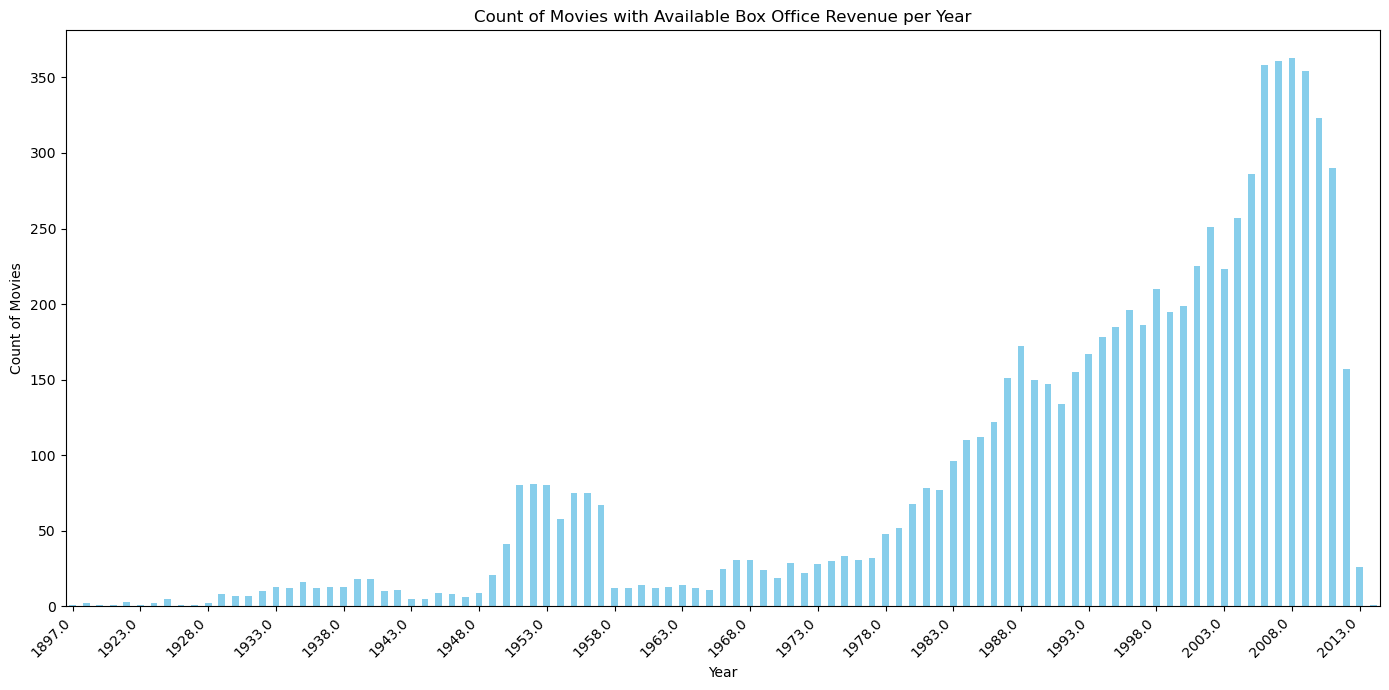

In [267]:
# Group by release year and count the movies with available revenue
revenue_counts_by_year = movies.groupby('movie_release_date').size()

# Plot the counts of movies with available box office revenue by year
plt.figure(figsize=(14, 7))
revenue_counts_by_year.plot(kind='bar', color='skyblue')

# Update x-axis for readability
plt.title('Count of Movies with Available Box Office Revenue per Year')
plt.xlabel('Year')
plt.ylabel('Count of Movies')
plt.xticks(rotation=45, ha='right')  # Rotate labels at a 45-degree angle for readability

# Optionally display fewer labels, e.g., every 5 years
plt.xticks(ticks=range(0, len(revenue_counts_by_year), 5), 
           labels=revenue_counts_by_year.index[::5])
plt.grid(False)
plt.tight_layout()
plt.show()  

Before diving into what makes movies successful, we checked how the number of movies with box office data has changed over time. In the early years, before the 1930s, there’s barely any data—it was just the start of the industry. By the mid-1900s, things picked up as Hollywood grew.

In the 2000s, movies exploded, thanks to global markets and big franchises like Harry Potter. The dip after 2013 is probably just missing data for newer films. Now that we’ve seen this growth, it’s time to figure out what actually makes a movie a hit—plot, genre, or something else?

## **4.2 Total box office revenues per year**

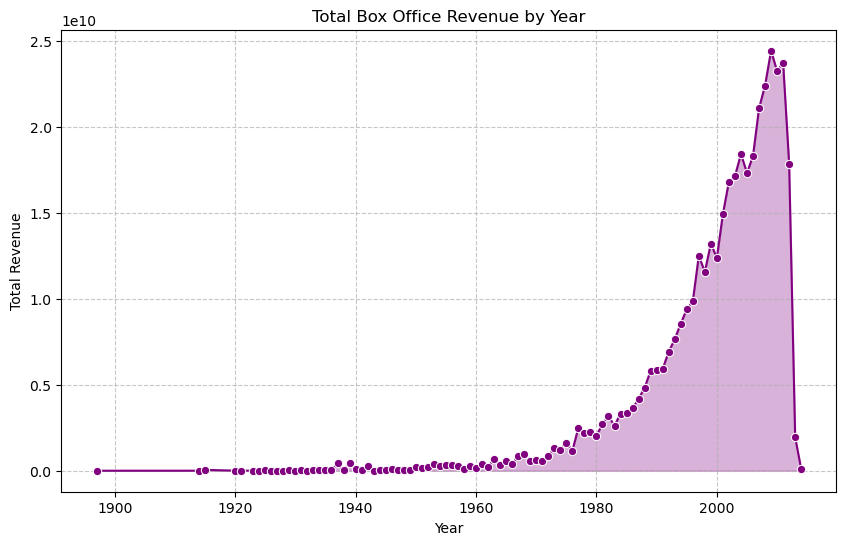

In [268]:
# Total Box Office Revenue by Year
revenue_by_year = movies.groupby('movie_release_date')['movie_box_office_revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=revenue_by_year, x='movie_release_date', y='movie_box_office_revenue', marker='o', color='purple')
plt.fill_between(revenue_by_year['movie_release_date'], revenue_by_year['movie_box_office_revenue'], color='purple', alpha=0.3)
plt.title('Total Box Office Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

After looking at how the number of movies changed, we now check how much money movies have made over the years. Revenues stayed pretty low until the 1990s, but then they shot up, peaking in the 2010s. This boom lines up with the rise of huge franchises like Harry Potter and The Avengers and the growth of global audiences.

The dip after 2019 is probably just missing data for newer movies. This trend makes us wonder—what’s really driving this massive growth? Is it the story, the genre, or something else? Let’s keep digging.

## **4.3 Which countries are producing movies ?**

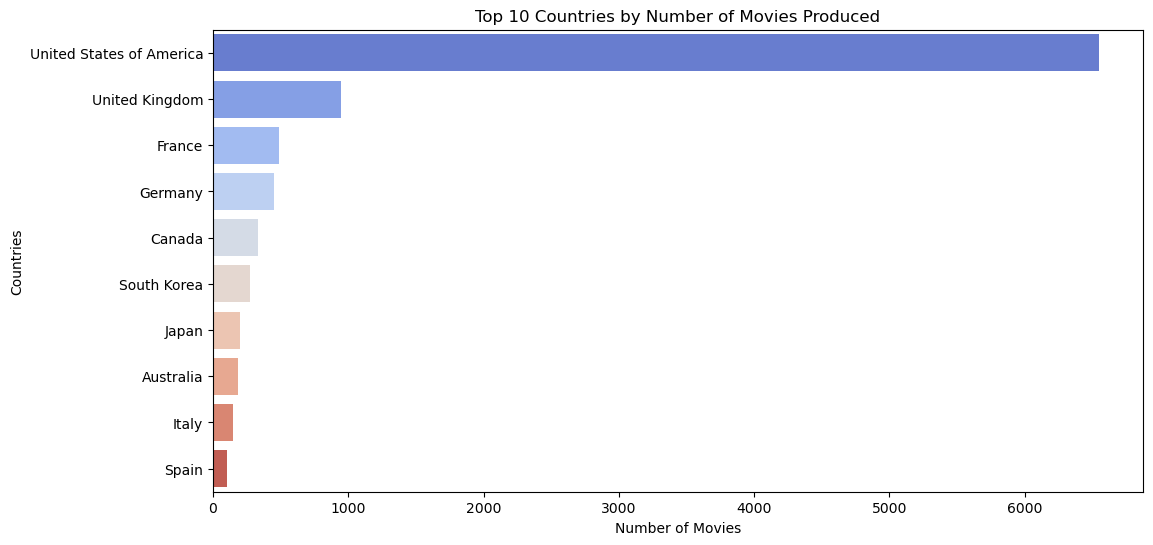

In [269]:
# Ensure that the movie_countries column is parsed as lists
movies['movie_countries'] = movies['movie_countries'].apply(ast.literal_eval)

# Top 10 Countries by Number of Movies Produced and filter out rows with empty countries
movies_countries_exploded = movies[movies['movie_countries'].map(len) > 0].explode('movie_countries')
top_countries = movies_countries_exploded['movie_countries'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries by Number of Movies Produced')
plt.xlabel('Number of Movies')
plt.ylabel('Countries')  
plt.grid(False)
plt.show()  

Next, we looked at where most movies come from, and it’s no surprise, the United States dominates by a huge margin, producing more films than the next few countries combined. The UK, France, and Germany follow, showing the influence of Europe on global cinema.

It’s interesting to see countries like South Korea and Japan on the list, highlighting the rise of Asian cinema, especially with the global success of Korean and Japanese films in recent years. This gives us a sense of how different countries contribute to the movie industry and sets the stage to explore how these contributions might relate to box office success.

## **4.4 What are the languages in movies ?**

<Figure size 1500x1000 with 0 Axes>

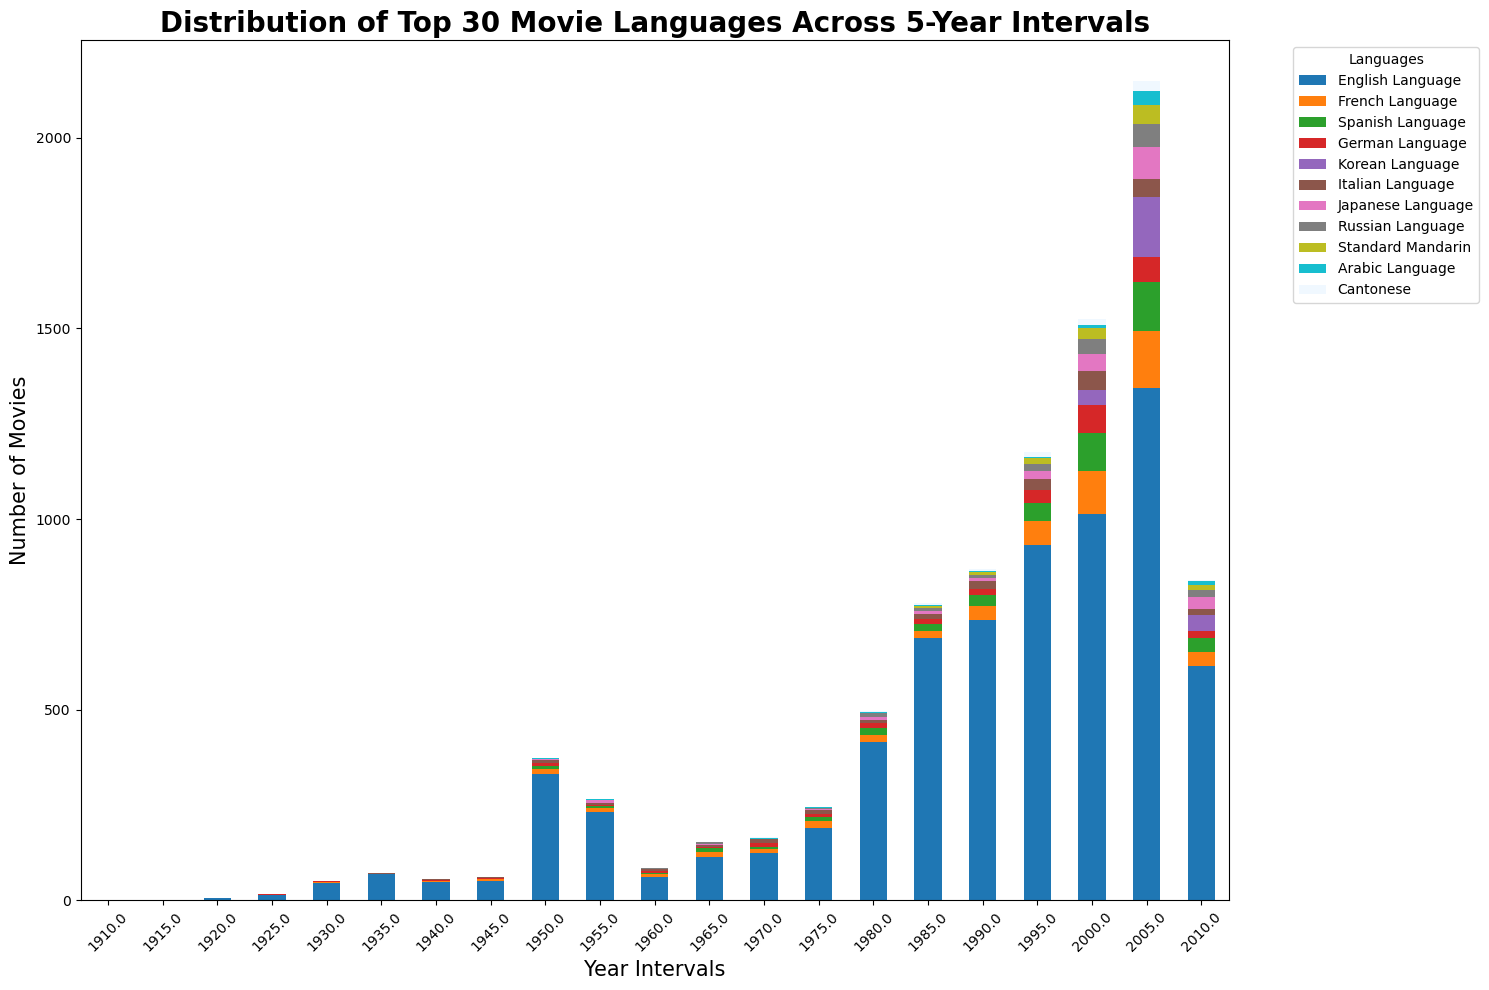

In [270]:
movies['movie_languages'] = movies['movie_languages'].apply(safe_literal_eval)

movies['year_interval'] = (movies['movie_release_date'] // 5) * 5  

movies_languages_exploded = movies.explode('movie_languages')

# Create pivot tables with the count of each genre and language per 5-year interval
language_year_pivot = movies_languages_exploded.pivot_table(index='year_interval', columns='movie_languages', aggfunc='size', fill_value=0)

language_counts = movies_languages_exploded['movie_languages'].value_counts()
valid_languages = language_counts[language_counts >= 50].index
language_year_pivot = language_year_pivot[valid_languages]  

# Define a custom colormap with 30 distinct colors
colors = list(mcolors.TABLEAU_COLORS.values()) + list(mcolors.CSS4_COLORS.values())
custom_colormap = colors[:30]

# Plot the stacked bar plot for languages
plt.figure(figsize=(15, 10))
language_year_pivot.plot(kind='bar', stacked=True, color=custom_colormap, figsize=(15, 10))

# Add titles and labels
plt.title('Distribution of Top 30 Movie Languages Across 5-Year Intervals', fontsize=20, fontweight='bold')
plt.xlabel('Year Intervals', fontsize=15)
plt.ylabel('Number of Movies', fontsize=15)
plt.legend(title='Languages', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

Movies started out mostly in English, but over time, other languages like French, Spanish, and German started showing up more. Recently, languages like Korean and Japanese have grown a lot, showing how global the movie industry has become.

This makes us wonder—does the language of a movie affect its success?

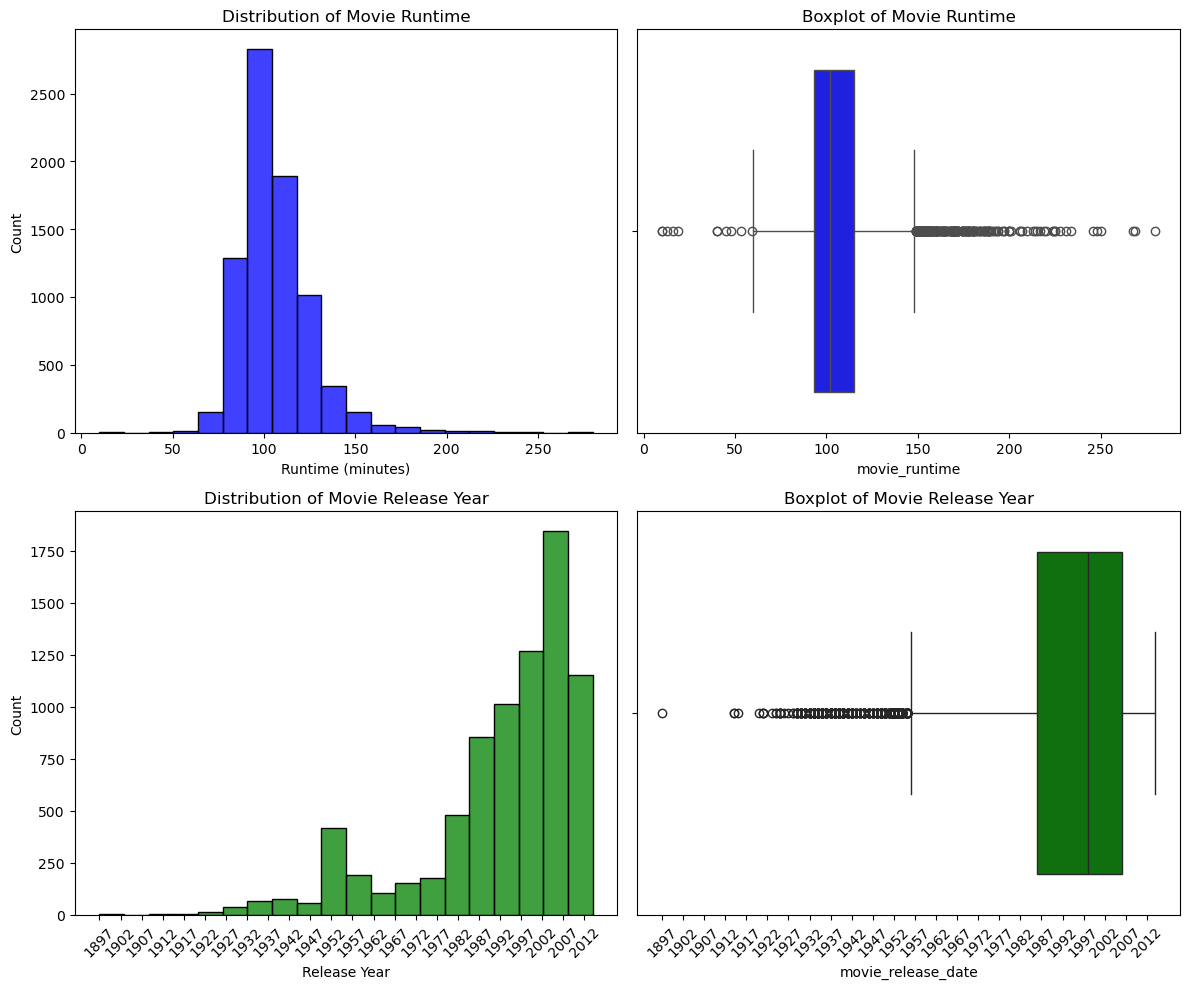

In [271]:
# Create a figure with subplots (2x2 layout)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  

# Plot distribution of movie runtime (no KDE and fewer bins)
sns.histplot(movies[movies['movie_runtime'] < 300]['movie_runtime'].dropna(), kde=False, bins=20, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribution of Movie Runtime')
axes[0, 0].set_xlabel('Runtime (minutes)')  
axes[0, 0].grid(False)  


# Boxplot for movie runtime
sns.boxplot(x=movies[movies['movie_runtime'] < 300]['movie_runtime'].dropna(), ax=axes[0, 1], color='blue')
axes[0, 1].set_title('Boxplot of Movie Runtime')  
axes[0, 1].grid(False)


# Plot distribution of release year (no KDE and fewer bins)
sns.histplot(movies['movie_release_date'].dropna(), kde=False, bins=20, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Distribution of Movie Release Year')
axes[1, 0].set_xlabel('Release Year')
axes[1, 0].set_xticks(np.arange(movies['movie_release_date'].min(), movies['movie_release_date'].max()+1, 5))
axes[1, 0].tick_params(axis='x', rotation=45)   
axes[1, 0].grid(False)


# Boxplot for movie release year
sns.boxplot(x=movies['movie_release_date'].dropna(), ax=axes[1, 1], color='green')
axes[1, 1].set_title('Boxplot of Movie Release Year')
axes[1, 1].set_xticks(np.arange(movies['movie_release_date'].min(), movies['movie_release_date'].max()+1, 5))
axes[1, 1].tick_params(axis='x', rotation=45)  
axes[1, 1].grid(False)


# Adjust layout for better appearance
plt.tight_layout()

# Show the plots
plt.show()

Most movies came out after 1980, which fits with what we saw earlier about box office growth. On average, movies are about 1 hour and 40 minutes long, though there are a few really short ones and some that go way over. Now, let's focus on how genres can be linked to commercial successes.

# **5. Analyses of how genres are related to worldwide box offices revenues and analyses of commercial successes**
 


At this stage, to keep the analysis consistent and ensure we’re working with the same set of movies for both revenue and budget data, we only include movies with budget information available from scraping. Inflation adjustments will be applied later. 

In [4]:
movies_budget = movies.dropna(subset=['budget'])  

print(len(movies_budget))    
print(f"Number of rows removed, where no budget available: {len(movies) - len(movies_budget)}")

5826
Number of rows removed, where no budget available: 2138


We're left with 5742 movies.

In [5]:
movies_budget.head(2)

wikipedia_movie_id freebase_movie_id      movie_name  movie_release_date  \
0              975900         /m/03vyhn  Ghosts of Mars              2001.0   
1              171005         /m/016ywb         Henry V              1989.0   

   movie_box_office_revenue  movie_runtime       movie_languages  \
0                14010832.0           98.0  ['English Language']   
1                10161099.0          137.0  ['English Language']   

                movie_countries  \
0  ['United States of America']   
1            ['United Kingdom']   

                                        movie_genres  title_year  \
0  ['Thriller', 'Science Fiction', 'Horror', 'Adv...      2001.0   
1  ['Costume drama', 'War film', 'Epic', 'Period ...      1989.0   

                                        plot_summary      budget  \
0  Set in the second half of the 22nd century, th...  28000000.0   
1  {{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...   9000000.0   

   opening_weekend  rating_score         producer  
0        3804452.0           4.9   John Carpenter  
1          64933.0           7.5  Kenneth Branagh

Parsing genres so that we avoid errors for the plots :

In [6]:
movies_budget['movie_genres'] = movies_budget['movie_genres'].apply(parse_genres)
# Explode the genres to have one genre per row
movies_genres_exploded = movies_budget.explode('movie_genres')

## 5.1 - Genres Distribution

What is the genres distribution ?

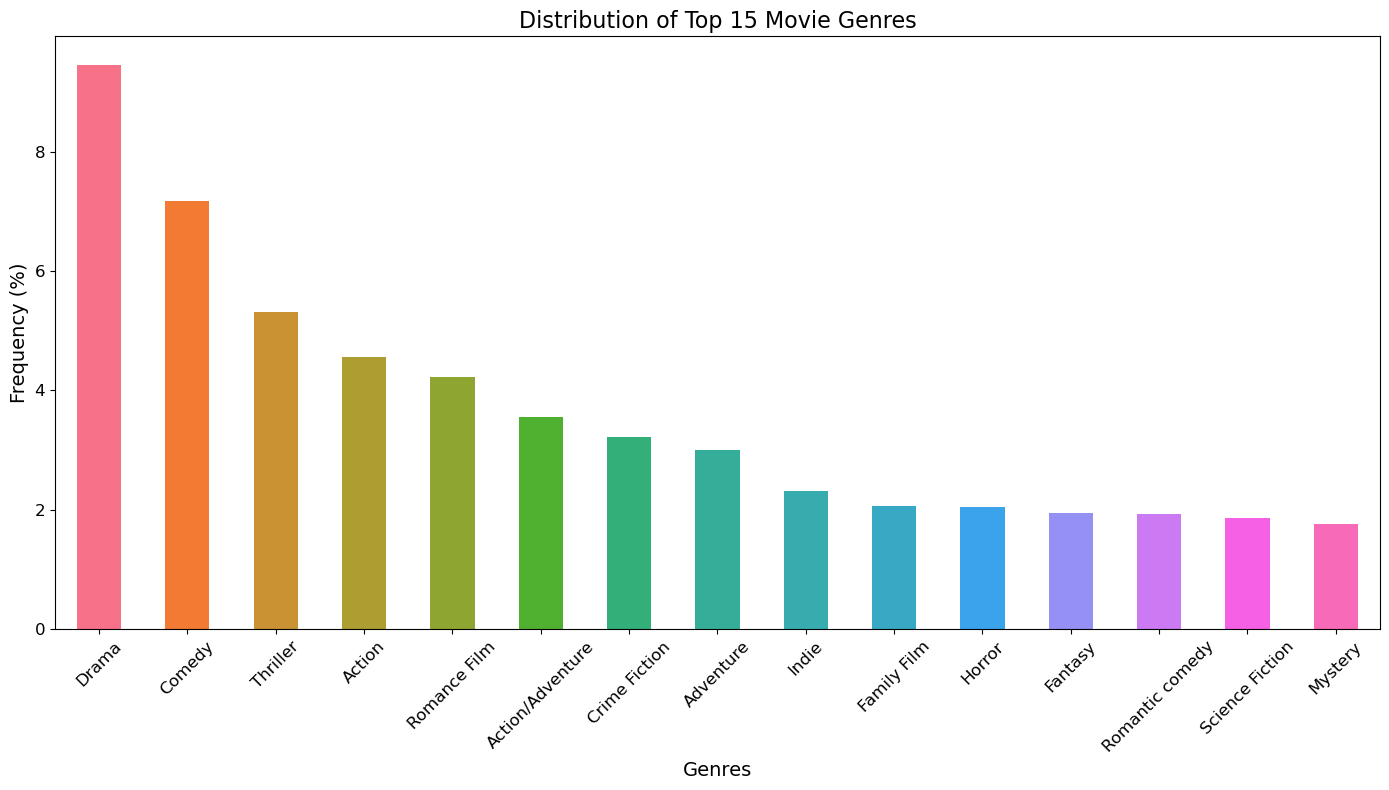

In [7]:
genre_counts = movies_genres_exploded['movie_genres'].value_counts()

# Calculate the percentage of each genre
genre_percentages = (genre_counts / genre_counts.sum()) * 100

top_genre = genre_percentages.head(15)

# Define a consistent color palette
palette = sns.color_palette("husl", 15)
color_dict = {genre: palette[i] for i, genre in enumerate(top_genre.index)}

# Plot the distribution of the top x genres
plt.figure(figsize=(14, 8))
top_genre.plot(kind='bar', color=[color_dict[genre] for genre in top_genre.index])
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Frequency (%)', fontsize=14)
plt.title(f'Distribution of Top 15 Movie Genres', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

We notice here, in terms of frequency in percentage, Drama movies are the most distributed ones, followed by comedy movies and thrillers. We display here only the 15 most distributed ones in the processed dataset. We now have a question, which genres are generating the highest revenues ? This may be an excellent question for a filmmakers, we want a movie to generate money !

## 5.2 - Which genres generated the highest revenues ?

We keep only the movies belonging to the top 15 genres.

In [ ]:
filtered_df = movies_genres_exploded[movies_genres_exploded['movie_genres'].isin(top_genre.index)]

We begin by plotting mean revenues according to genres.

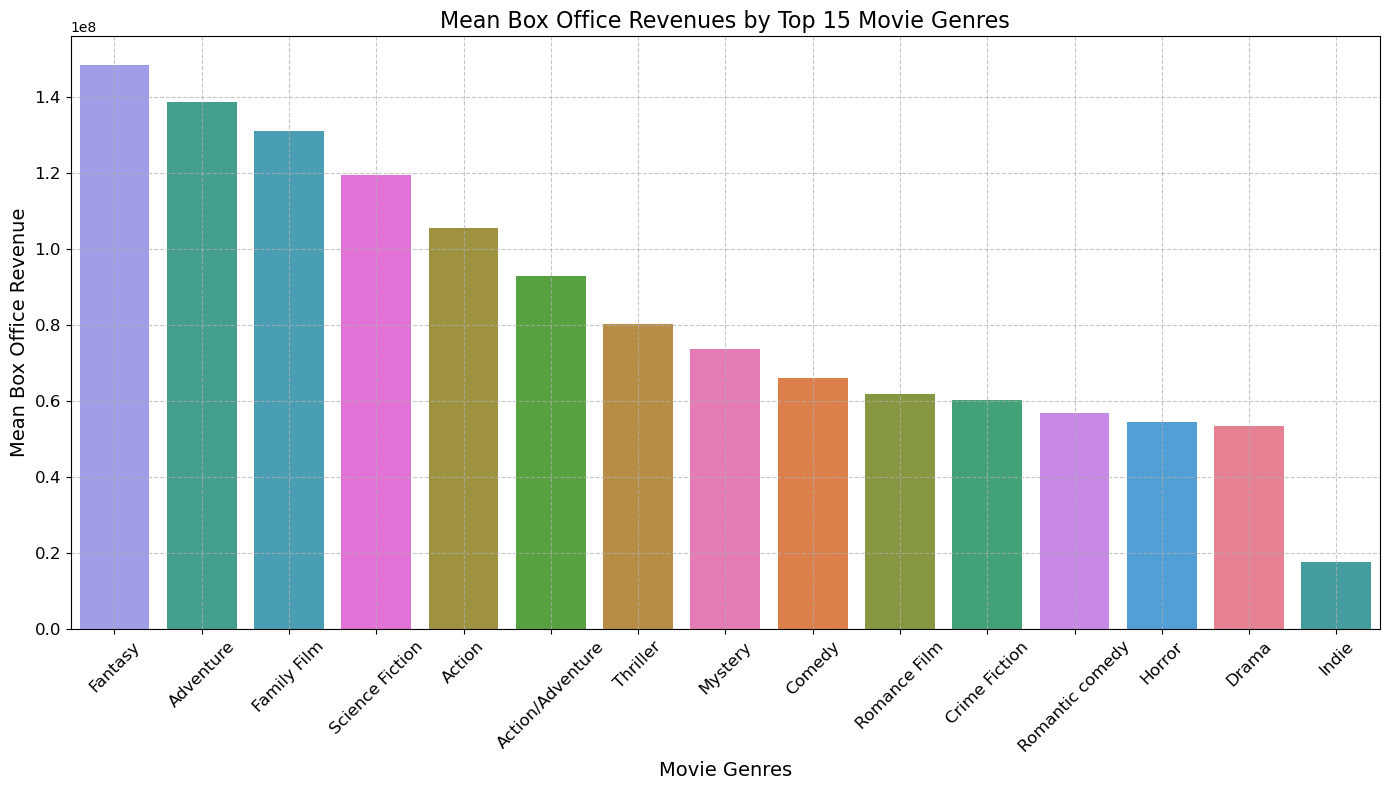

In [ ]:
# Calculate the mean revenues and sort them in descending order
mean_revenues = filtered_df.groupby('movie_genres')['movie_box_office_revenue'].mean().reset_index()
mean_revenues = mean_revenues.sort_values(by='movie_box_office_revenue', ascending=False)

# Plot the mean revenues using a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='movie_genres', y='movie_box_office_revenue', data=mean_revenues, palette=[color_dict.get(genre, '#333333') for genre in mean_revenues['movie_genres']])


plt.title('Mean Box Office Revenues by Top 15 Movie Genres', fontsize=16)
plt.xlabel('Movie Genres', fontsize=14)
plt.ylabel('Mean Box Office Revenue', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We notice here that Fantasy, Adventure and Family Film movies are the one that have the highest mean box office revenues. Drama movies are the most distributed ones, but do not generated high mean revenues !

To truly see which genres make the most money, we need to take into account inflation over the years ! 

 <font size="6"> 5.3 - Inflation over the years</font>


A function that also takes into account inflation has been coded to also show the influence of the latter on rentability of movies and to conduct further analyses.

In [324]:
ds_inflation = kagglehub.dataset_download("pavankrishnanarne/us-inflation-dataset-1947-present")
df_inflation = pd.read_csv(os.path.join(ds_inflation, "US_inflation_rates.csv"))
local_path = "data/raw/inflation_data.csv"
os.makedirs(os.path.dirname(local_path), exist_ok=True)
df_inflation.to_csv(local_path, index=False)
print(f"Dataset saved to: {local_path}")  

Dataset saved to: data/raw/inflation_data.csv


This dataset contains historical inflation rates for the United States, from January 1947 to 2023. CPI is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services.

In [325]:
df_inflation.sample(2)


date  value
518  1990-03-01  128.6
286  1970-11-01   39.6

In [326]:
df_inflation['date'] = pd.to_datetime(df_inflation['date'])
df_inflation = df_inflation.set_index('date')

- Plotted the Consumer Price Index (CPI) values over time to show how they change from one date to the next.
- Calculated and plotted a linear trend line to show the overall direction of CPI values over time.

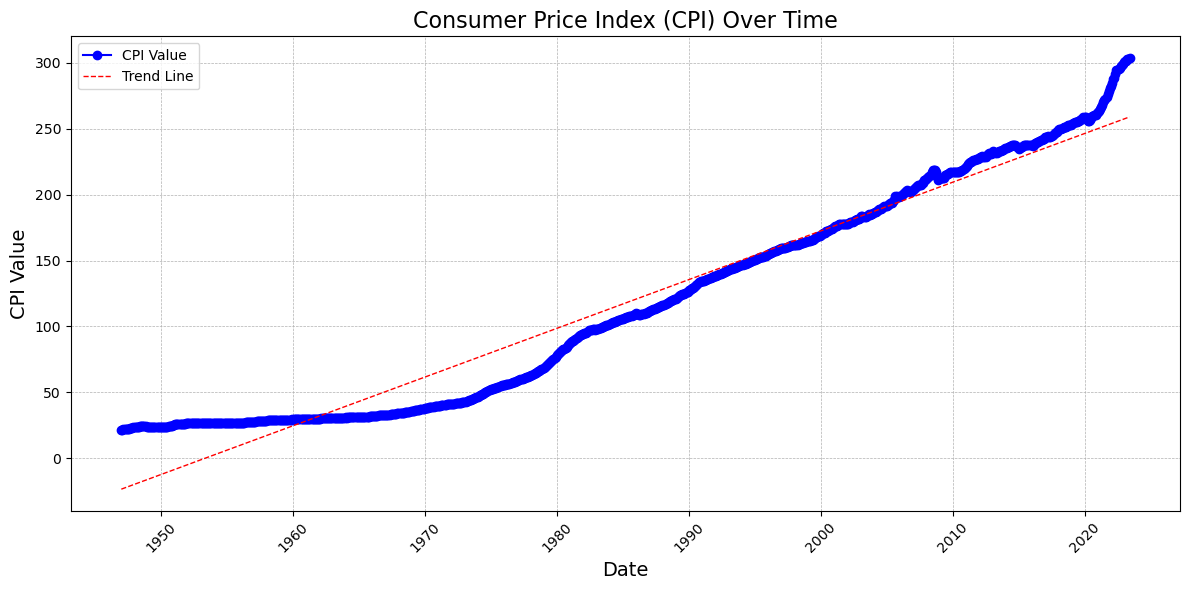

In [327]:
# Plot CPI values over time
plt.figure(figsize=(12, 6))
plt.plot(df_inflation.index, df_inflation['value'], marker='o', linestyle='-', color='b', linewidth=1.5)

plt.title("Consumer Price Index (CPI) Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("CPI Value", fontsize=14)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)

# Adding a trend line
ordinals = df_inflation.index.map(pd.Timestamp.toordinal)
z = np.polyfit(ordinals, df_inflation['value'], 1)
p = np.poly1d(z)
plt.plot(df_inflation.index, p(ordinals), "r--", linewidth=1, label='Trend Line')

plt.legend(["CPI Value", "Trend Line"], loc="upper left")
plt.tight_layout()
plt.show()

### Adjusting Movie Box Office Revenues for Inflation

We want to make movie box office revenues comparable across different release years by adjusting them for inflation. We use the Consumer Price Index (CPI) data to account for inflation and bring all revenues to a common base year. This way, we can fairly compare the earnings of movies released in different years.

### Steps

- We start with CPI data indexed by date, which represents the inflation rate over time.
- We choose a **base year** (2023) to normalize all other CPI values.

- For each year in our CPI dataset, we calculate an **adjustment factor** by dividing the CPI value of the base year by the CPI of that specific year:


$$
\text{Adjustment Factor} = \frac{\text{CPI of Base Year}}{\text{CPI of Movie Year}}
$$


- Using the adjustment factors calculated above, we adjust each movie’s box office revenue based on its release year.

In [328]:
df_inflation = df_inflation.reset_index()
df_inflation['year'] = df_inflation['date'].dt.year
df_inflation = df_inflation.groupby('year')['value'].mean()

# Choose base year (the most recent CPI value for 2023)
base_year = 2023
cpi_base = df_inflation[base_year]

# Calculate adjustment factors for each year
df_inflation = cpi_base / df_inflation

In [329]:
movies_imdb = pd.read_csv("data/processed/movies_summary_BO.csv")
movies_imdb.sample(2)

wikipedia_movie_id freebase_movie_id movie_name  movie_release_date  \
2550               34130          /m/08720   WarGames              1983.0   
5862             1129847         /m/048vhl  Daredevil              2003.0   

      movie_box_office_revenue  movie_runtime  \
2550                79567667.0          114.0   
5862               179179718.0          133.0   

                                        movie_languages  \
2550                               ['English Language']   
5862  ['Greek Language', 'Italian Language', 'Englis...   

                   movie_countries  \
2550  ['United States of America']   
5862  ['United States of America']   

                                           movie_genres  title_year  \
2550                    ['Thriller', 'Science Fiction']      1983.0   
5862  ['Thriller', 'Crime Fiction', 'Action', 'Fanta...         NaN   

                                           plot_summary      budget  \
2550  During a secret live fire exercise of a nuclea...  12000000.0   
5862  Matt Murdock  is a blind lawyer who lives in N...  78000000.0   

      opening_weekend  rating_score             producer  
2550        6227804.0           7.1          John Badham  
5862       40310419.0           5.3  Mark Steven Johnson

We want to check for missing CPI values for each year in the movie dataset.



In [330]:
# Extract unique years from the movies dataset
movie_years = movies_imdb['movie_release_date'].dropna().unique()
# Extract available years from the CPI data
cpi_years = df_inflation.index.unique()

# Find years in movies that are missing in CPI data
missing_years = set(movie_years) - set(cpi_years)

print("Smallest year in CPI data:", df_inflation.index.min())
# Display missing years
print("Years in movies data but missing in CPI data:", sorted(missing_years))

Smallest year in CPI data: 1947
Years in movies data but missing in CPI data: [1897.0, 1914.0, 1915.0, 1920.0, 1921.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0]


For the missing year, we will use the closest available year’s CPI value



In [331]:
# Fill missing years by reindexing with a full range
all_years = pd.RangeIndex(start=min(df_inflation.index.min(), min(movie_years)),
                          stop=max(df_inflation.index.max(), max(movie_years)) + 1)
# Use closest available year’s CPI value
df_inflation = df_inflation.reindex(all_years).ffill().bfill()

In [332]:
movies_imdb = movies_imdb.dropna(subset=['movie_box_office_revenue', 'movie_release_date'])

movies_imdb.loc[:, 'adjusted_revenue'] = movies_imdb.apply(
    lambda x: x['movie_box_office_revenue'] * df_inflation.get(x['movie_release_date'], 1), axis=1
)

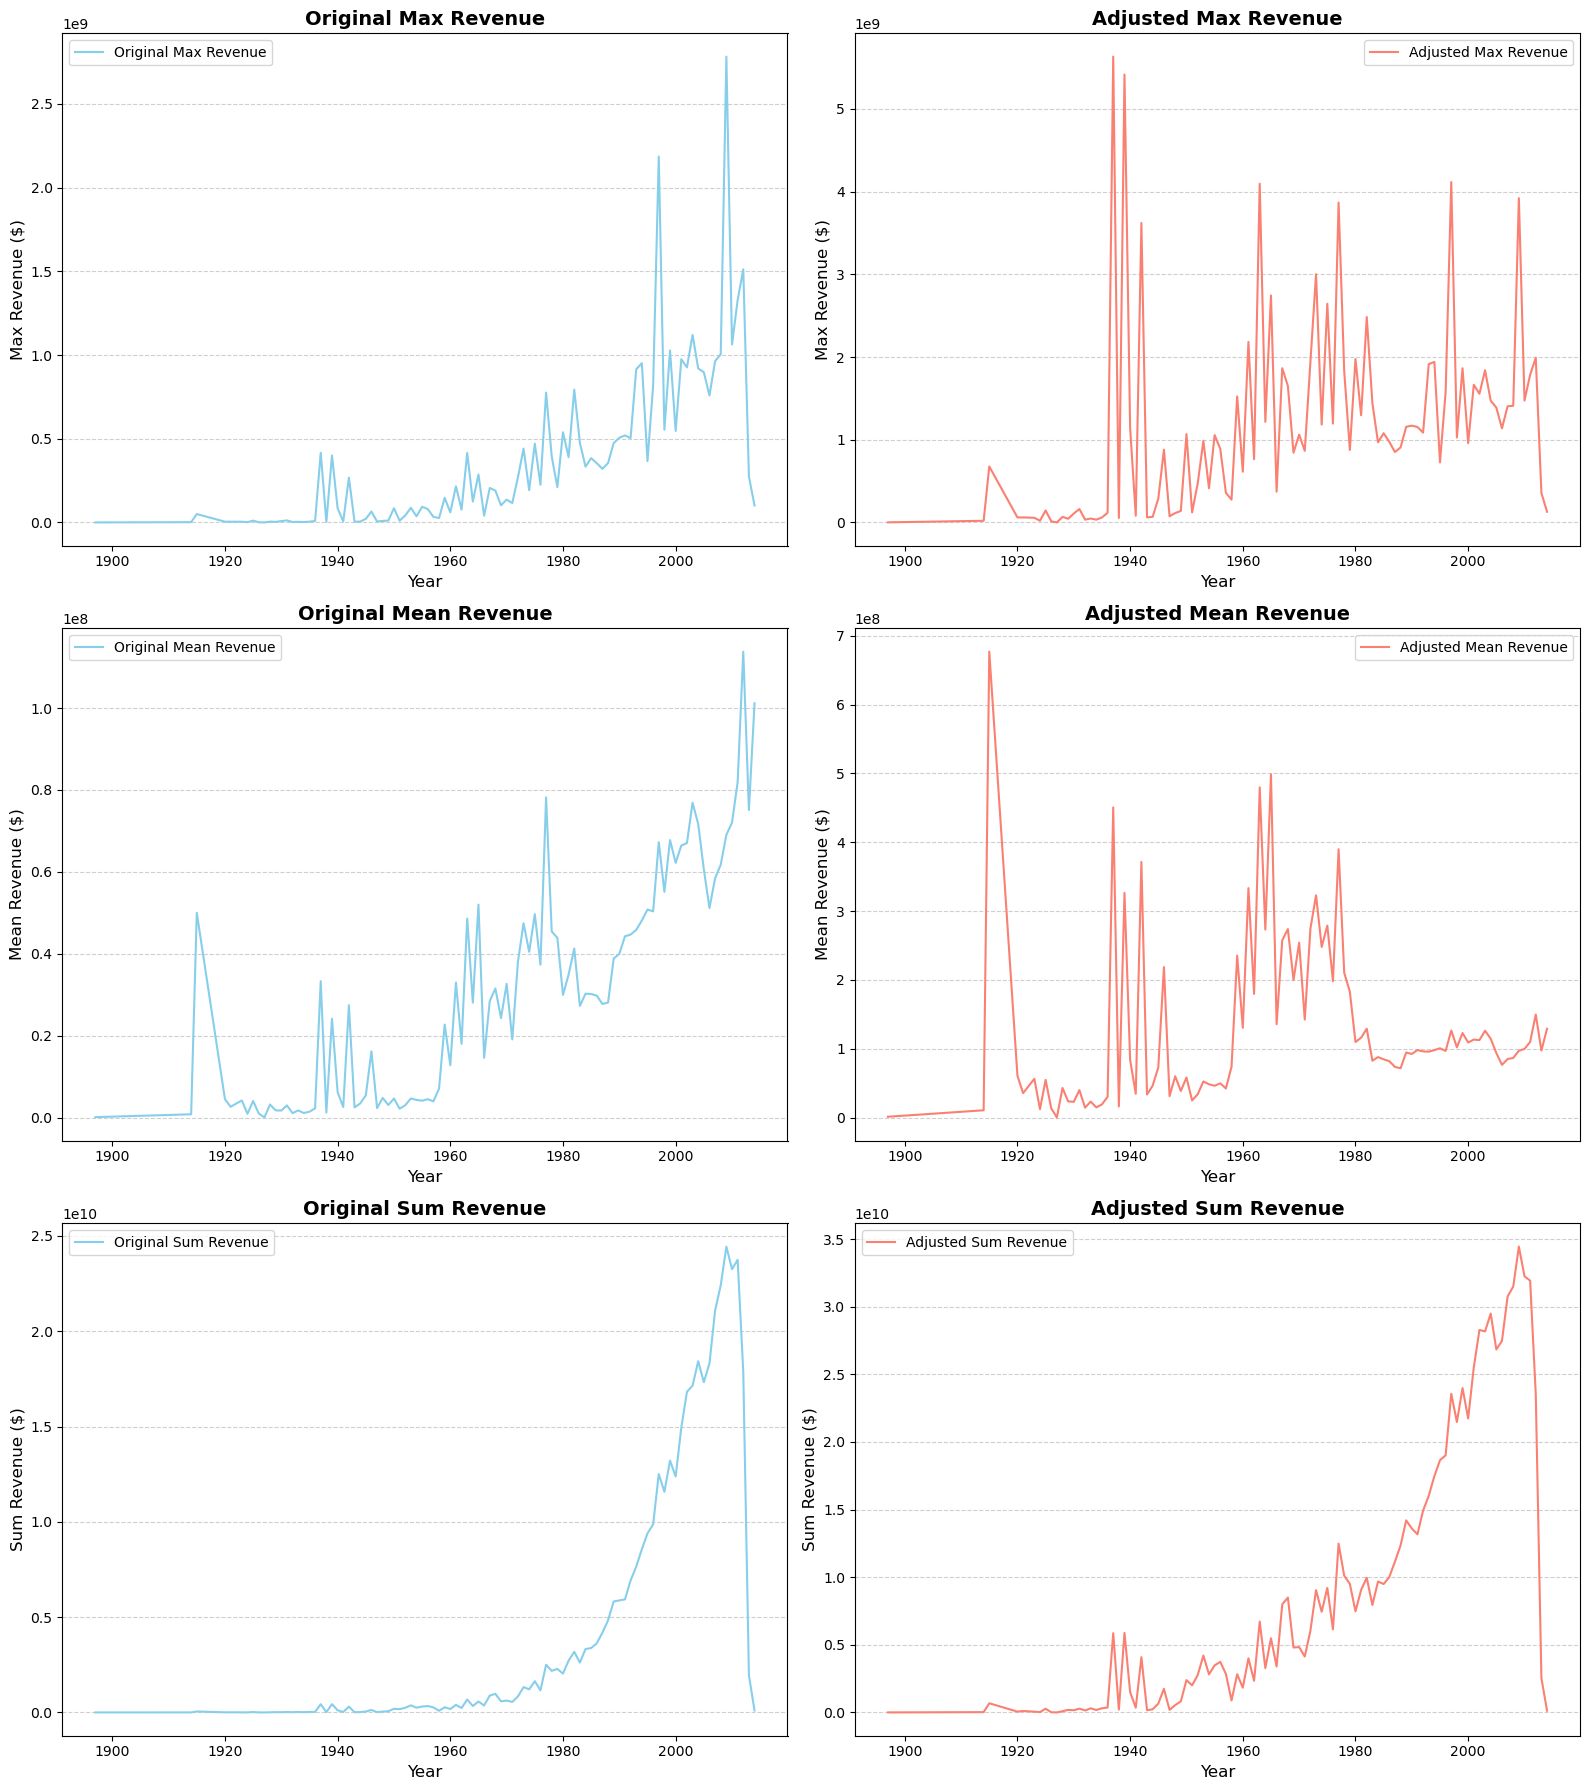

In [333]:
movies_by_year = movies_imdb.groupby('movie_release_date').agg({
    'movie_box_office_revenue': ['mean', 'sum', 'max'],
    'adjusted_revenue': ['mean', 'sum', 'max']
}).reset_index()

# Correct column names for movies_by_year
movies_by_year.columns = ['Year', 'Original Mean Revenue', 'Original Sum Revenue', 'Original Max Revenue',
                          'Adjusted Mean Revenue', 'Adjusted Sum Revenue', 'Adjusted Max Revenue']

# Create a figure with subplots (3x2 layout) for better comparison
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# Plot Original Max vs Adjusted Max Revenue
sns.lineplot(x=movies_by_year['Year'], y=movies_by_year['Original Max Revenue'], ax=axes[0, 0], color='skyblue', label='Original Max Revenue')
axes[0, 0].set_title('Original Max Revenue', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Year', fontsize=12)
axes[0, 0].set_ylabel('Max Revenue ($)', fontsize=12)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.6)

sns.lineplot(x=movies_by_year['Year'], y=movies_by_year['Adjusted Max Revenue'], ax=axes[0, 1], color='salmon', label='Adjusted Max Revenue')
axes[0, 1].set_title('Adjusted Max Revenue', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Year', fontsize=12)
axes[0, 1].set_ylabel('Max Revenue ($)', fontsize=12)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.6)

# Plot Original Mean vs Adjusted Mean Revenue
sns.lineplot(x=movies_by_year['Year'], y=movies_by_year['Original Mean Revenue'], ax=axes[1, 0], color='skyblue', label='Original Mean Revenue')
axes[1, 0].set_title('Original Mean Revenue', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Year', fontsize=12)
axes[1, 0].set_ylabel('Mean Revenue ($)', fontsize=12)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.6)

sns.lineplot(x=movies_by_year['Year'], y=movies_by_year['Adjusted Mean Revenue'], ax=axes[1, 1], color='salmon', label='Adjusted Mean Revenue')
axes[1, 1].set_title('Adjusted Mean Revenue', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Year', fontsize=12)
axes[1, 1].set_ylabel('Mean Revenue ($)', fontsize=12)
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.6)

# Plot Original Sum vs Adjusted Sum Revenue
sns.lineplot(x=movies_by_year['Year'], y=movies_by_year['Original Sum Revenue'], ax=axes[2, 0], color='skyblue', label='Original Sum Revenue')
axes[2, 0].set_title('Original Sum Revenue', fontsize=14, fontweight='bold')
axes[2, 0].set_xlabel('Year', fontsize=12)
axes[2, 0].set_ylabel('Sum Revenue ($)', fontsize=12)
axes[2, 0].grid(axis='y', linestyle='--', alpha=0.6)

sns.lineplot(x=movies_by_year['Year'], y=movies_by_year['Adjusted Sum Revenue'], ax=axes[2, 1], color='salmon', label='Adjusted Sum Revenue')
axes[2, 1].set_title('Adjusted Sum Revenue', fontsize=14, fontweight='bold')
axes[2, 1].set_xlabel('Year', fontsize=12)
axes[2, 1].set_ylabel('Sum Revenue ($)', fontsize=12)
axes[2, 1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

What really makes a movie successful—big numbers overall or a few standout hits? The total revenue from the 1990s and 2000s looks huge, but that’s mostly because so many movies were made during those years. More movies mean higher totals, but does that really show success?

To get a better picture, we look at **mean** and **max revenue**:
- **Mean Revenue** gives us the average, showing how movies performed overall each year without being overwhelmed by how many were released.
- **Max Revenue** focuses on the biggest hits—the movies that smashed records and left their mark.

If we stick with total revenue, we miss the real stars and trends. By focusing on **averages and standouts**, we can better figure out what makes a movie truly successful.

Now, let's apply the inflation on our dataset, to see differences when considering it or not. 

Apply the inflation on my the `movies_summary_BO`dataset :

In [334]:
# Load classified_summaries_inflation DataFrame
classified_summaries_inflation_BO = filtered_df.copy()

# Apply inflation adjustment
classified_summaries_inflation_BO['adjusted_revenue'] = classified_summaries_inflation_BO.apply(
    lambda x: x['movie_box_office_revenue'] * df_inflation.get(x['movie_release_date'], 1), axis=1
)
classified_summaries_inflation_BO['adjusted_budget'] = classified_summaries_inflation_BO.apply(
    lambda x: x['budget'] * df_inflation.get(x['movie_release_date'], 1) if pd.notna(x['budget']) else np.nan, axis=1
)  

classified_summaries_inflation_BO['adjusted_profit'] = classified_summaries_inflation_BO['adjusted_revenue'] - classified_summaries_inflation_BO['adjusted_budget']

In [335]:
classified_summaries_inflation_BO.head(2)

wikipedia_movie_id freebase_movie_id      movie_name  movie_release_date  \
0              975900         /m/03vyhn  Ghosts of Mars              2001.0   
0              975900         /m/03vyhn  Ghosts of Mars              2001.0   

   movie_box_office_revenue  movie_runtime     movie_languages  \
0                14010832.0           98.0  [English Language]   
0                14010832.0           98.0  [English Language]   

              movie_countries     movie_genres  title_year  \
0  [United States of America]         Thriller      2001.0   
0  [United States of America]  Science Fiction      2001.0   

                                        plot_summary      budget  \
0  Set in the second half of the 22nd century, th...  28000000.0   
0  Set in the second half of the 22nd century, th...  28000000.0   

   opening_weekend  rating_score        producer  year_interval      profit  \
0        3804452.0           4.9  John Carpenter         2000.0 -13989168.0   
0        3804452.0           4.9  John Carpenter         2000.0 -13989168.0   

   adjusted_revenue  adjusted_budget  adjusted_profit  
0      2.392683e+07     4.781667e+07    -2.388984e+07  
0      2.392683e+07     4.781667e+07    -2.388984e+07

Let's now plot distribution of box office revenues by top movie genres :

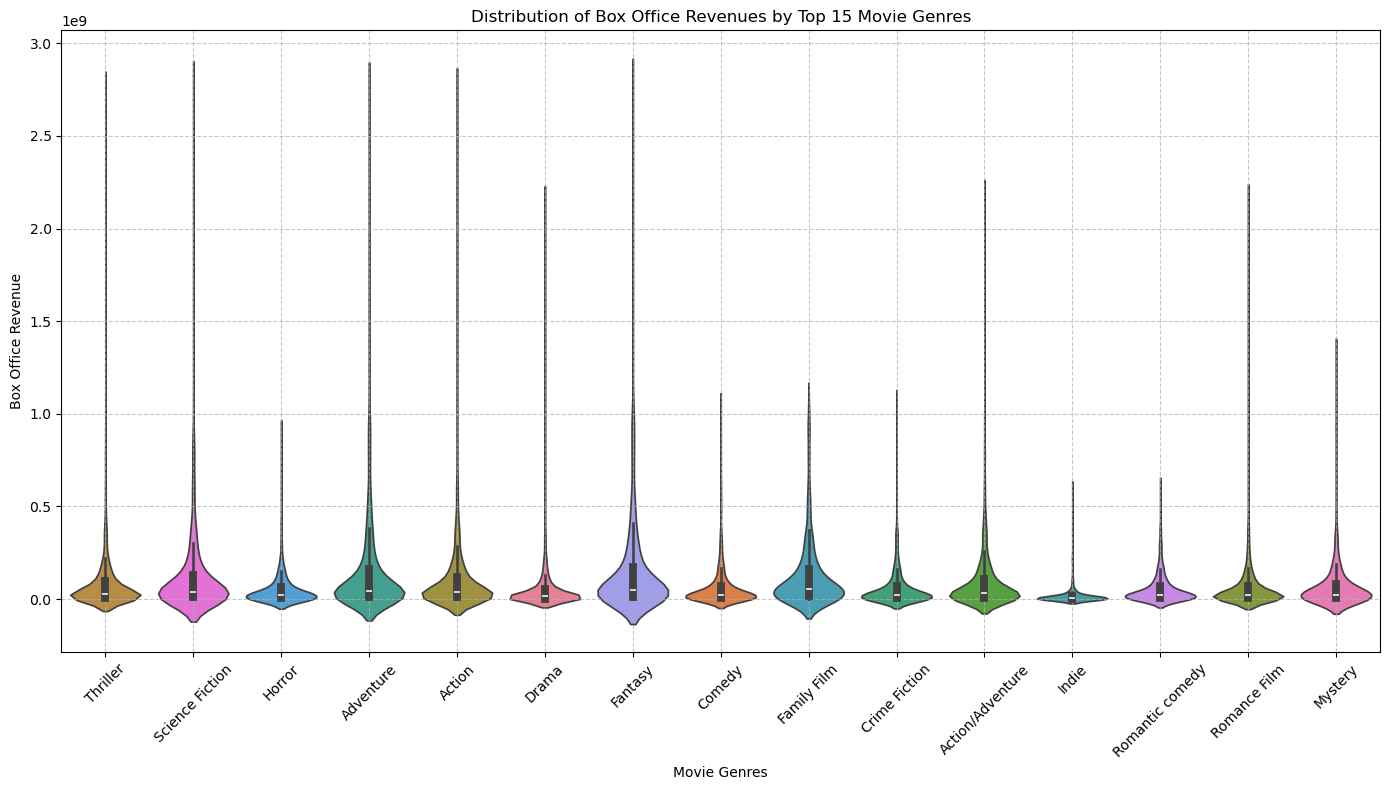

In [336]:
# Plot the distribution of revenues as a function of the genres using violin plots
plt.figure(figsize=(14, 8))
sns.violinplot(x='movie_genres', y='movie_box_office_revenue', data=filtered_df, palette=[color_dict.get(genre, '#333333') for genre in filtered_df['movie_genres'].unique()], inner='box', scale='width')

plt.title('Distribution of Box Office Revenues by Top 15 Movie Genres')
plt.xlabel('Movie Genres')
plt.ylabel('Box Office Revenue')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Let's take into account the inflation :  

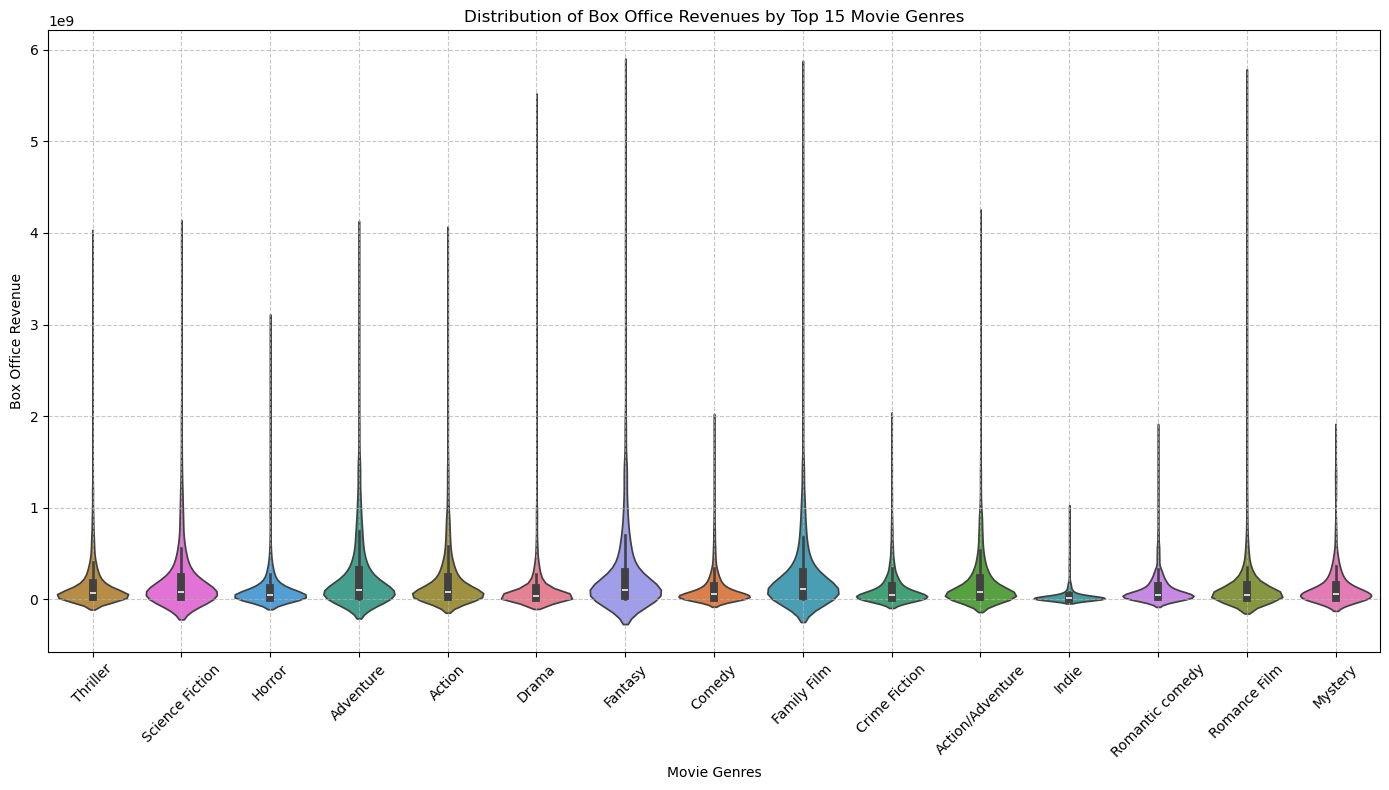

In [337]:
# Plot the distribution of revenues as a function of the genres using violin plots
plt.figure(figsize=(14, 8))
sns.violinplot(x='movie_genres', y='adjusted_revenue', data=classified_summaries_inflation_BO, palette=[color_dict.get(genre, '#333333') for genre in filtered_df['movie_genres'].unique()], inner='box', scale='width')

plt.title('Distribution of Box Office Revenues by Top 15 Movie Genres')
plt.xlabel('Movie Genres')
plt.ylabel('Box Office Revenue')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Let's compare the two visually :

In [338]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(28, 8), sharey=True)

# First violin plot
sns.violinplot(ax=axes[0], x='movie_genres', y='adjusted_revenue', data=classified_summaries_inflation_BO, 
               palette=[color_dict.get(genre, '#333333') for genre in filtered_df['movie_genres'].unique()], 
               inner='box', scale='width')
axes[0].set_title('Distribution of Box Office Revenues by Top 15 Movie Genres (Adjusted)')
axes[0].set_xlabel('Movie Genres')
axes[0].set_ylabel('Box Office Revenue')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.7)

# Second violin plot
sns.violinplot(ax=axes[1], x='movie_genres', y='movie_box_office_revenue', data=filtered_df, 
               palette=[color_dict.get(genre, '#333333') for genre in filtered_df['movie_genres'].unique()], 
               inner='box', scale='width')
axes[1].set_title('Distribution of Box Office Revenues by Top 15 Movie Genres')
axes[1].set_xlabel('Movie Genres')
axes[1].set_ylabel('Box Office Revenue')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In the inflation-adjusted view, Family Films and Dramas rise to the top, showcasing their enduring appeal and the lasting power of their stories. On the other hand, the non-adjusted view highlights the dominance of blockbuster genres like Adventure, Action, and Fantasy, driven by modern budgets and global excitement.

It’s like looking at two sides of the same coin: one celebrates the stories that last forever, and the other shows off the thrill of today’s biggest hits.

Let's check the mean, with and without inflation :

In [340]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean revenues and sort them in descending order for the first dataset
mean_revenues_1 = filtered_df.groupby('movie_genres')['movie_box_office_revenue'].mean().reset_index()
mean_revenues_1 = mean_revenues_1.sort_values(by='movie_box_office_revenue', ascending=False)

# Calculate the mean revenues and sort them in descending order for the second dataset
mean_revenues_2 = classified_summaries_inflation_BO.groupby('movie_genres')['adjusted_revenue'].mean().reset_index()
mean_revenues_2 = mean_revenues_2.sort_values(by='adjusted_revenue', ascending=False)

# Create subplots with shared y-axis
fig, axes = plt.subplots(1, 2, figsize=(28, 8), sharey=True)

# Plot the first mean revenues using a bar plot
sns.barplot(ax=axes[0], x='movie_genres', y='movie_box_office_revenue', data=mean_revenues_1, palette=[color_dict.get(genre, '#333333') for genre in mean_revenues_1['movie_genres']])
axes[0].set_title('Mean Box Office Revenues by Top 15 Movie Genres', fontsize=16)
axes[0].set_xlabel('Movie Genres', fontsize=14)
axes[0].set_ylabel('Mean Box Office Revenue', fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)

# Plot the second mean revenues using a bar plot
sns.barplot(ax=axes[1], x='movie_genres', y='adjusted_revenue', data=mean_revenues_2, palette=[color_dict.get(genre, '#333333') for genre in mean_revenues_2['movie_genres']])
axes[1].set_title('Mean Box Office Revenues by Top 15 Movie Genres (adjusted with inflation)', fontsize=16)
axes[1].set_xlabel('Movie Genres', fontsize=14)
axes[1].set_ylabel('Mean Box Office Revenue', fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

We do notice here that there are lots of outliers (notably movies like Avatar or Avengers Endgame), generating high revenues and are considering as several movie genres. So this has an effect on the mean. We need a more robust to do this analysis, something more robust than the mean : the median !

What about the median ? Let's check with and without inflation :

In [341]:
# Calculate the median revenues and sort them in descending order for the first dataset
median_revenues_1 = filtered_df.groupby('movie_genres')['movie_box_office_revenue'].median().reset_index()
median_revenues_1 = median_revenues_1.rename(columns={'movie_box_office_revenue': 'revenue'})
median_revenues_1['type'] = 'Original'

# Calculate the median revenues and sort them in descending order for the second dataset
median_revenues_2 = classified_summaries_inflation_BO.groupby('movie_genres')['adjusted_revenue'].median().reset_index()
median_revenues_2 = median_revenues_2.rename(columns={'adjusted_revenue': 'revenue'})
median_revenues_2['type'] = 'Adjusted'

# Combine the two datasets
combined_median_revenues = pd.concat([median_revenues_1, median_revenues_2])

# Plot the combined median revenues using a grouped bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='movie_genres', y='revenue', hue='type', data=combined_median_revenues, palette=['#1f77b4', '#ff7f0e'])

plt.title('Median Box Office Revenues by Top 15 Movie Genres', fontsize=16)
plt.xlabel('Movie Genres', fontsize=14)
plt.ylabel('Median Box Office Revenue', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

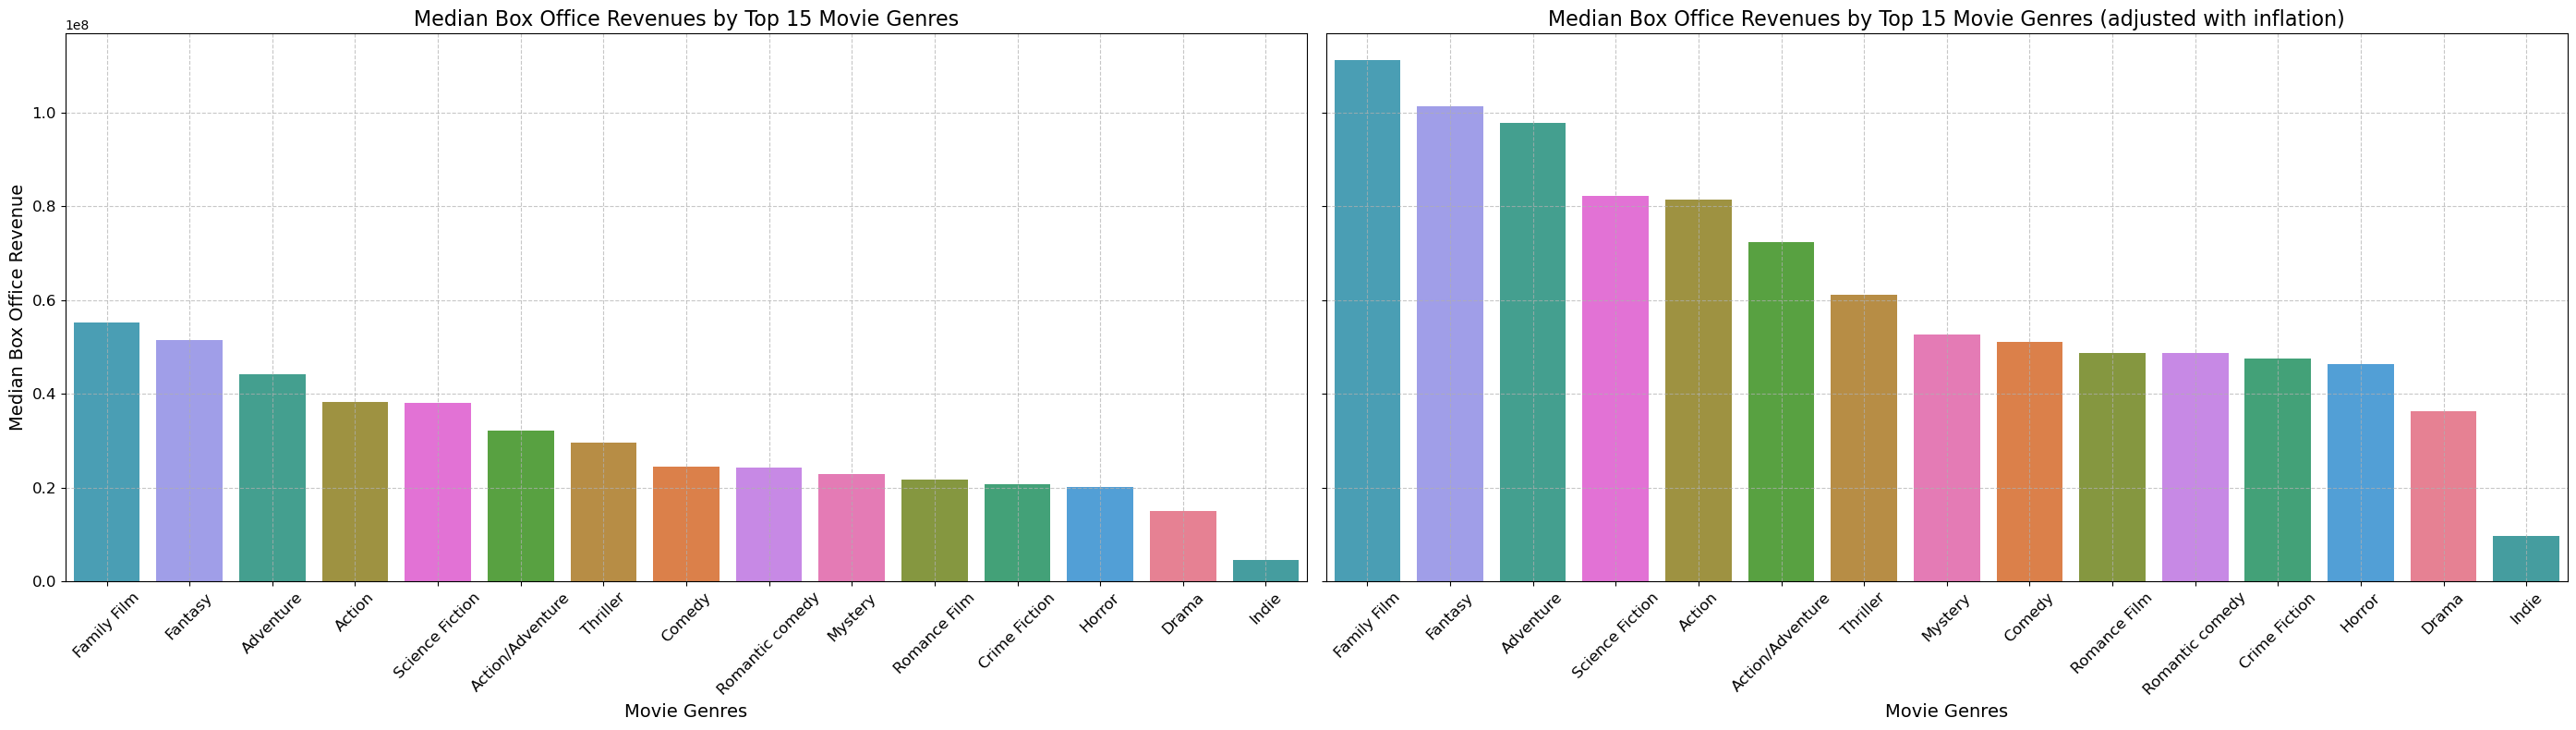

In [342]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the median revenues and sort them in descending order for the first dataset
median_revenues_1 = filtered_df.groupby('movie_genres')['movie_box_office_revenue'].median().reset_index()
median_revenues_1 = median_revenues_1.sort_values(by='movie_box_office_revenue', ascending=False)

# Calculate the median revenues and sort them in descending order for the second dataset
median_revenues_2 = classified_summaries_inflation_BO.groupby('movie_genres')['adjusted_revenue'].median().reset_index()
median_revenues_2 = median_revenues_2.sort_values(by='adjusted_revenue', ascending=False)

# Create subplots with shared y-axis
fig, axes = plt.subplots(1, 2, figsize=(28, 8), sharey=True)

# Plot the first median revenues using a bar plot
sns.barplot(ax=axes[0], x='movie_genres', y='movie_box_office_revenue', data=median_revenues_1, palette=[color_dict.get(genre, '#333333') for genre in median_revenues_1['movie_genres']])
axes[0].set_title('Median Box Office Revenues by Top 15 Movie Genres', fontsize=16)
axes[0].set_xlabel('Movie Genres', fontsize=14)
axes[0].set_ylabel('Median Box Office Revenue', fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)

# Plot the second median revenues using a bar plot
sns.barplot(ax=axes[1], x='movie_genres', y='adjusted_revenue', data=median_revenues_2, palette=[color_dict.get(genre, '#333333') for genre in median_revenues_2['movie_genres']])
axes[1].set_title('Median Box Office Revenues by Top 15 Movie Genres (adjusted with inflation)', fontsize=16)
axes[1].set_xlabel('Movie Genres', fontsize=14)
axes[1].set_ylabel('Median Box Office Revenue', fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Here, with the median, Family Film genre is the one producing the highest median revenues, followed by Fantasy and Adventure movies. The following order is similar to the mean revenues in that case. Here, the median gives much more consistent result for Mystery movies, as the latter were negative with mean profits, due to outliers.

What is important for a filmmaker is indeed the revenue, but even more the profit ! Let's analyse this.

Example of profit calculation on one movie, with ID 44218, corresponding to the movie "San Fransisco"

In [343]:
# Filter the dataset for the specific movie ID
merged_movies_scaped = movies_budget[movies_budget['wikipedia_movie_id'] == 44218]

# Calculate the profit (revenue - budget)
budget = merged_movies_scaped['budget'].values[0] 
revenue = merged_movies_scaped['movie_box_office_revenue'].values[0]
profit = revenue - budget
movie_name = merged_movies_scaped['movie_name'].values[0]  

print(f"Movie Name: {movie_name}, Budget: {budget}, Revenue: {revenue}")  
print(f"so a profit of : {profit} dollars")

Movie Name: San Francisco, Budget: 1300000.0, Revenue: 2868000.0
so a profit of : 1568000.0 dollars


Creating a new column profit :

In [344]:
filtered_df['profit'] = filtered_df['movie_box_office_revenue'] - filtered_df['budget']

Fantasy, Family Film and Adventure movies are the ones generating the highest mean profit ! Mystery movies even have a negative mean profit. Is it biased by outliers again ?

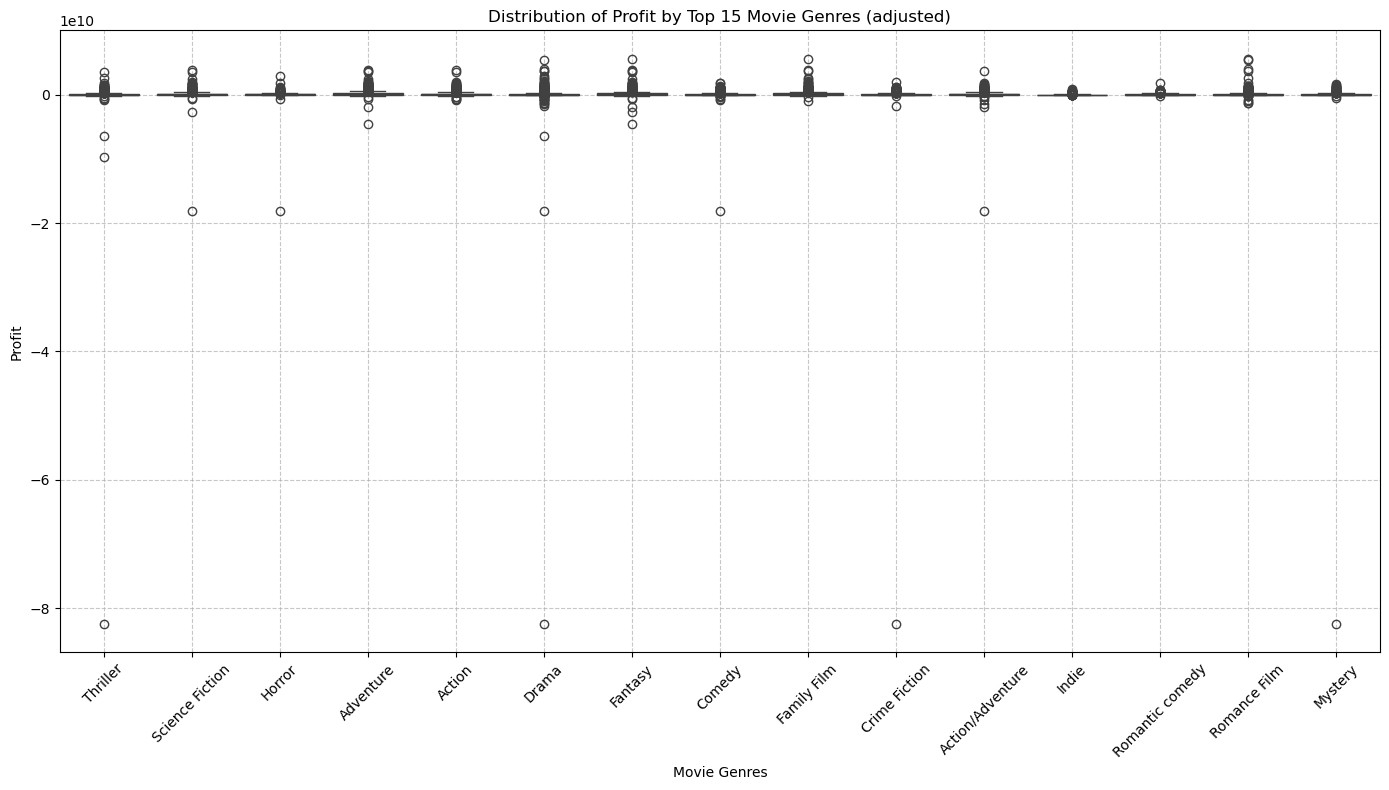

In [345]:
# Plot the distribution of revenues as a function of the genres using box plots
plt.figure(figsize=(14, 8))
sns.boxplot(x='movie_genres', y='adjusted_profit', data=classified_summaries_inflation_BO, palette=[color_dict.get(genre, '#333333') for genre in filtered_df['movie_genres'].unique()])


plt.title('Distribution of Profit by Top 15 Movie Genres (adjusted)')
plt.xlabel('Movie Genres')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Similarly to revenues, we compute mean profit according to distribution of movie genres :

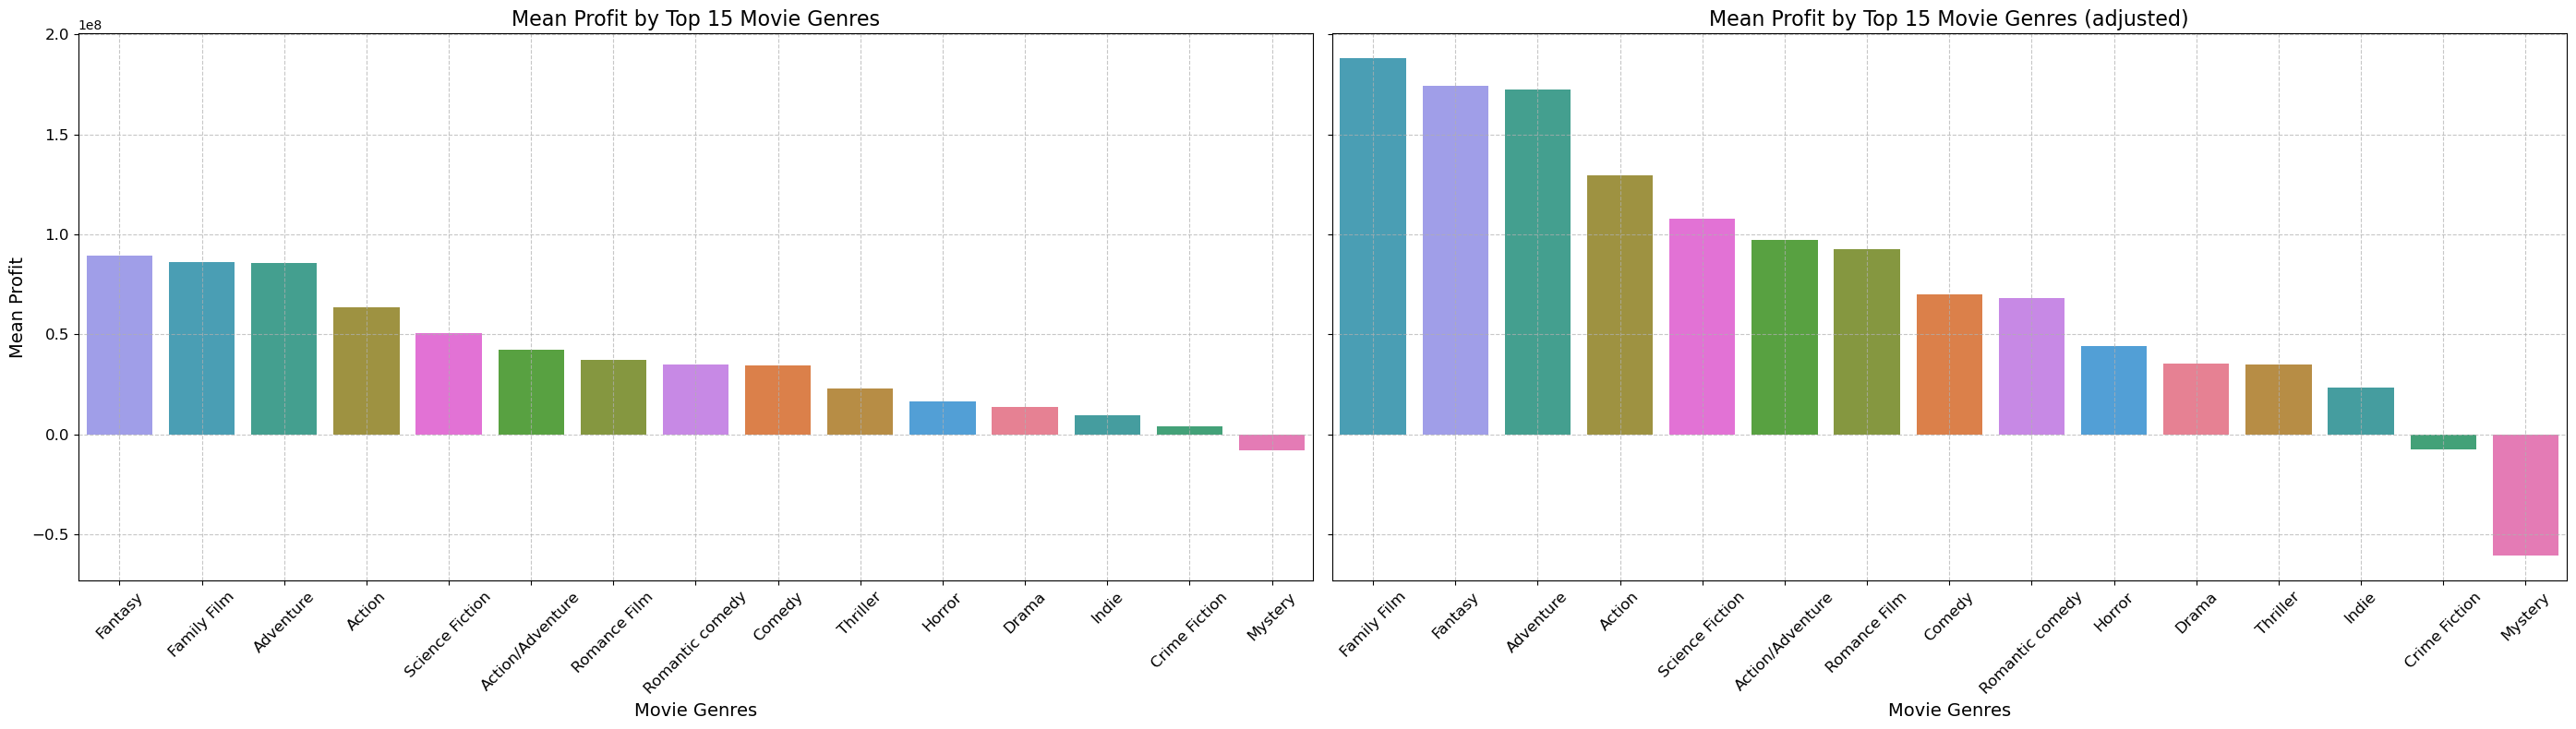

In [346]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean revenues and sort them in descending order
mean_profit = filtered_df.groupby('movie_genres')['profit'].mean().reset_index()
mean_profit = mean_profit.sort_values(by='profit', ascending=False)

# Calculate the adjusted mean revenues and sort them in descending order
adjusted_mean_profit = classified_summaries_inflation_BO.groupby('movie_genres')['adjusted_profit'].mean().reset_index()
adjusted_mean_profit = adjusted_mean_profit.sort_values(by='adjusted_profit', ascending=False)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(28, 8), sharey=True)

# Plot the mean revenues using a bar plot
sns.barplot(ax=axes[0], x='movie_genres', y='profit', data=mean_profit, palette=[color_dict.get(genre, '#333333') for genre in mean_profit['movie_genres']])
axes[0].set_title('Mean Profit by Top 15 Movie Genres', fontsize=16)
axes[0].set_xlabel('Movie Genres', fontsize=14)
axes[0].set_ylabel('Mean Profit', fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)

# Plot the adjusted mean revenues using a bar plot
sns.barplot(ax=axes[1], x='movie_genres', y='adjusted_profit', data=adjusted_mean_profit, palette=[color_dict.get(genre, '#333333') for genre in adjusted_mean_profit['movie_genres']])
axes[1].set_title('Mean Profit by Top 15 Movie Genres (adjusted)', fontsize=16)
axes[1].set_xlabel('Movie Genres', fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The median is robust to outliers, right ?

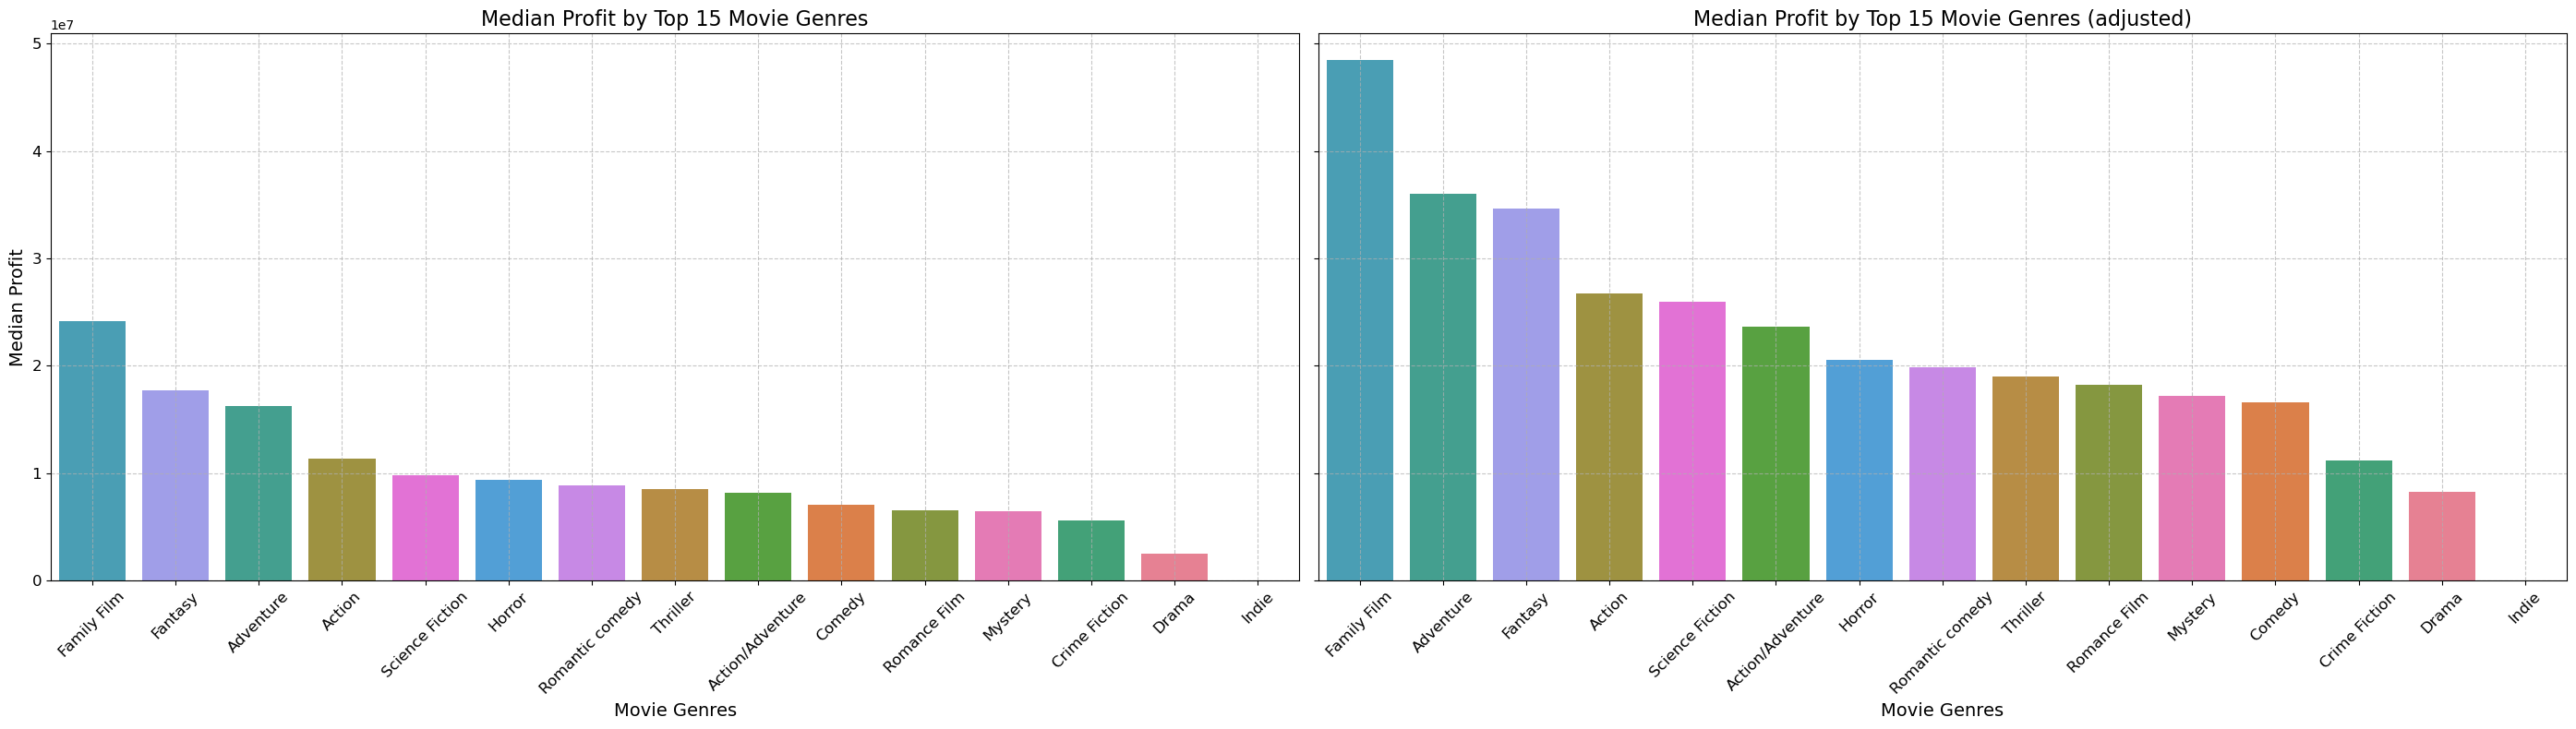

In [347]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the median profits and sort them in descending order
median_profit = filtered_df.groupby('movie_genres')['profit'].median().reset_index()
median_profit = median_profit.sort_values(by='profit', ascending=False)

# Calculate the adjusted median profits and sort them in descending order
adjusted_median_profit = classified_summaries_inflation_BO.groupby('movie_genres')['adjusted_profit'].median().reset_index()
adjusted_median_profit = adjusted_median_profit.sort_values(by='adjusted_profit', ascending=False)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(28, 8), sharey=True)

# Plot the median profits using a bar plot
sns.barplot(ax=axes[0], x='movie_genres', y='profit', data=median_profit, palette=[color_dict.get(genre, '#333333') for genre in median_profit['movie_genres']])
axes[0].set_title('Median Profit by Top 15 Movie Genres', fontsize=16)
axes[0].set_xlabel('Movie Genres', fontsize=14)
axes[0].set_ylabel('Median Profit', fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)

# Plot the adjusted median profits using a bar plot
sns.barplot(ax=axes[1], x='movie_genres', y='adjusted_profit', data=adjusted_median_profit, palette=[color_dict.get(genre, '#333333') for genre in adjusted_median_profit['movie_genres']])
axes[1].set_title('Median Profit by Top 15 Movie Genres (adjusted)', fontsize=16)
axes[1].set_xlabel('Movie Genres', fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Let's analyse evolution over time of revenues and profits, according to the 15 main genres. For the rest of the analyses, we'll only use datasets where the inflation is used to adjust the revenues, budget and profit values. It's important to compare the films on same values of revenue. A dollar forty years ago worths much nowadays.

In [348]:
classified_summaries_inflation_BO.head(2)

wikipedia_movie_id freebase_movie_id      movie_name  movie_release_date  \
0              975900         /m/03vyhn  Ghosts of Mars              2001.0   
0              975900         /m/03vyhn  Ghosts of Mars              2001.0   

   movie_box_office_revenue  movie_runtime     movie_languages  \
0                14010832.0           98.0  [English Language]   
0                14010832.0           98.0  [English Language]   

              movie_countries     movie_genres  title_year  \
0  [United States of America]         Thriller      2001.0   
0  [United States of America]  Science Fiction      2001.0   

                                        plot_summary      budget  \
0  Set in the second half of the 22nd century, th...  28000000.0   
0  Set in the second half of the 22nd century, th...  28000000.0   

   opening_weekend  rating_score        producer  year_interval      profit  \
0        3804452.0           4.9  John Carpenter         2000.0 -13989168.0   
0        3804452.0           4.9  John Carpenter         2000.0 -13989168.0   

   adjusted_revenue  adjusted_budget  adjusted_profit  
0      2.392683e+07     4.781667e+07    -2.388984e+07  
0      2.392683e+07     4.781667e+07    -2.388984e+07

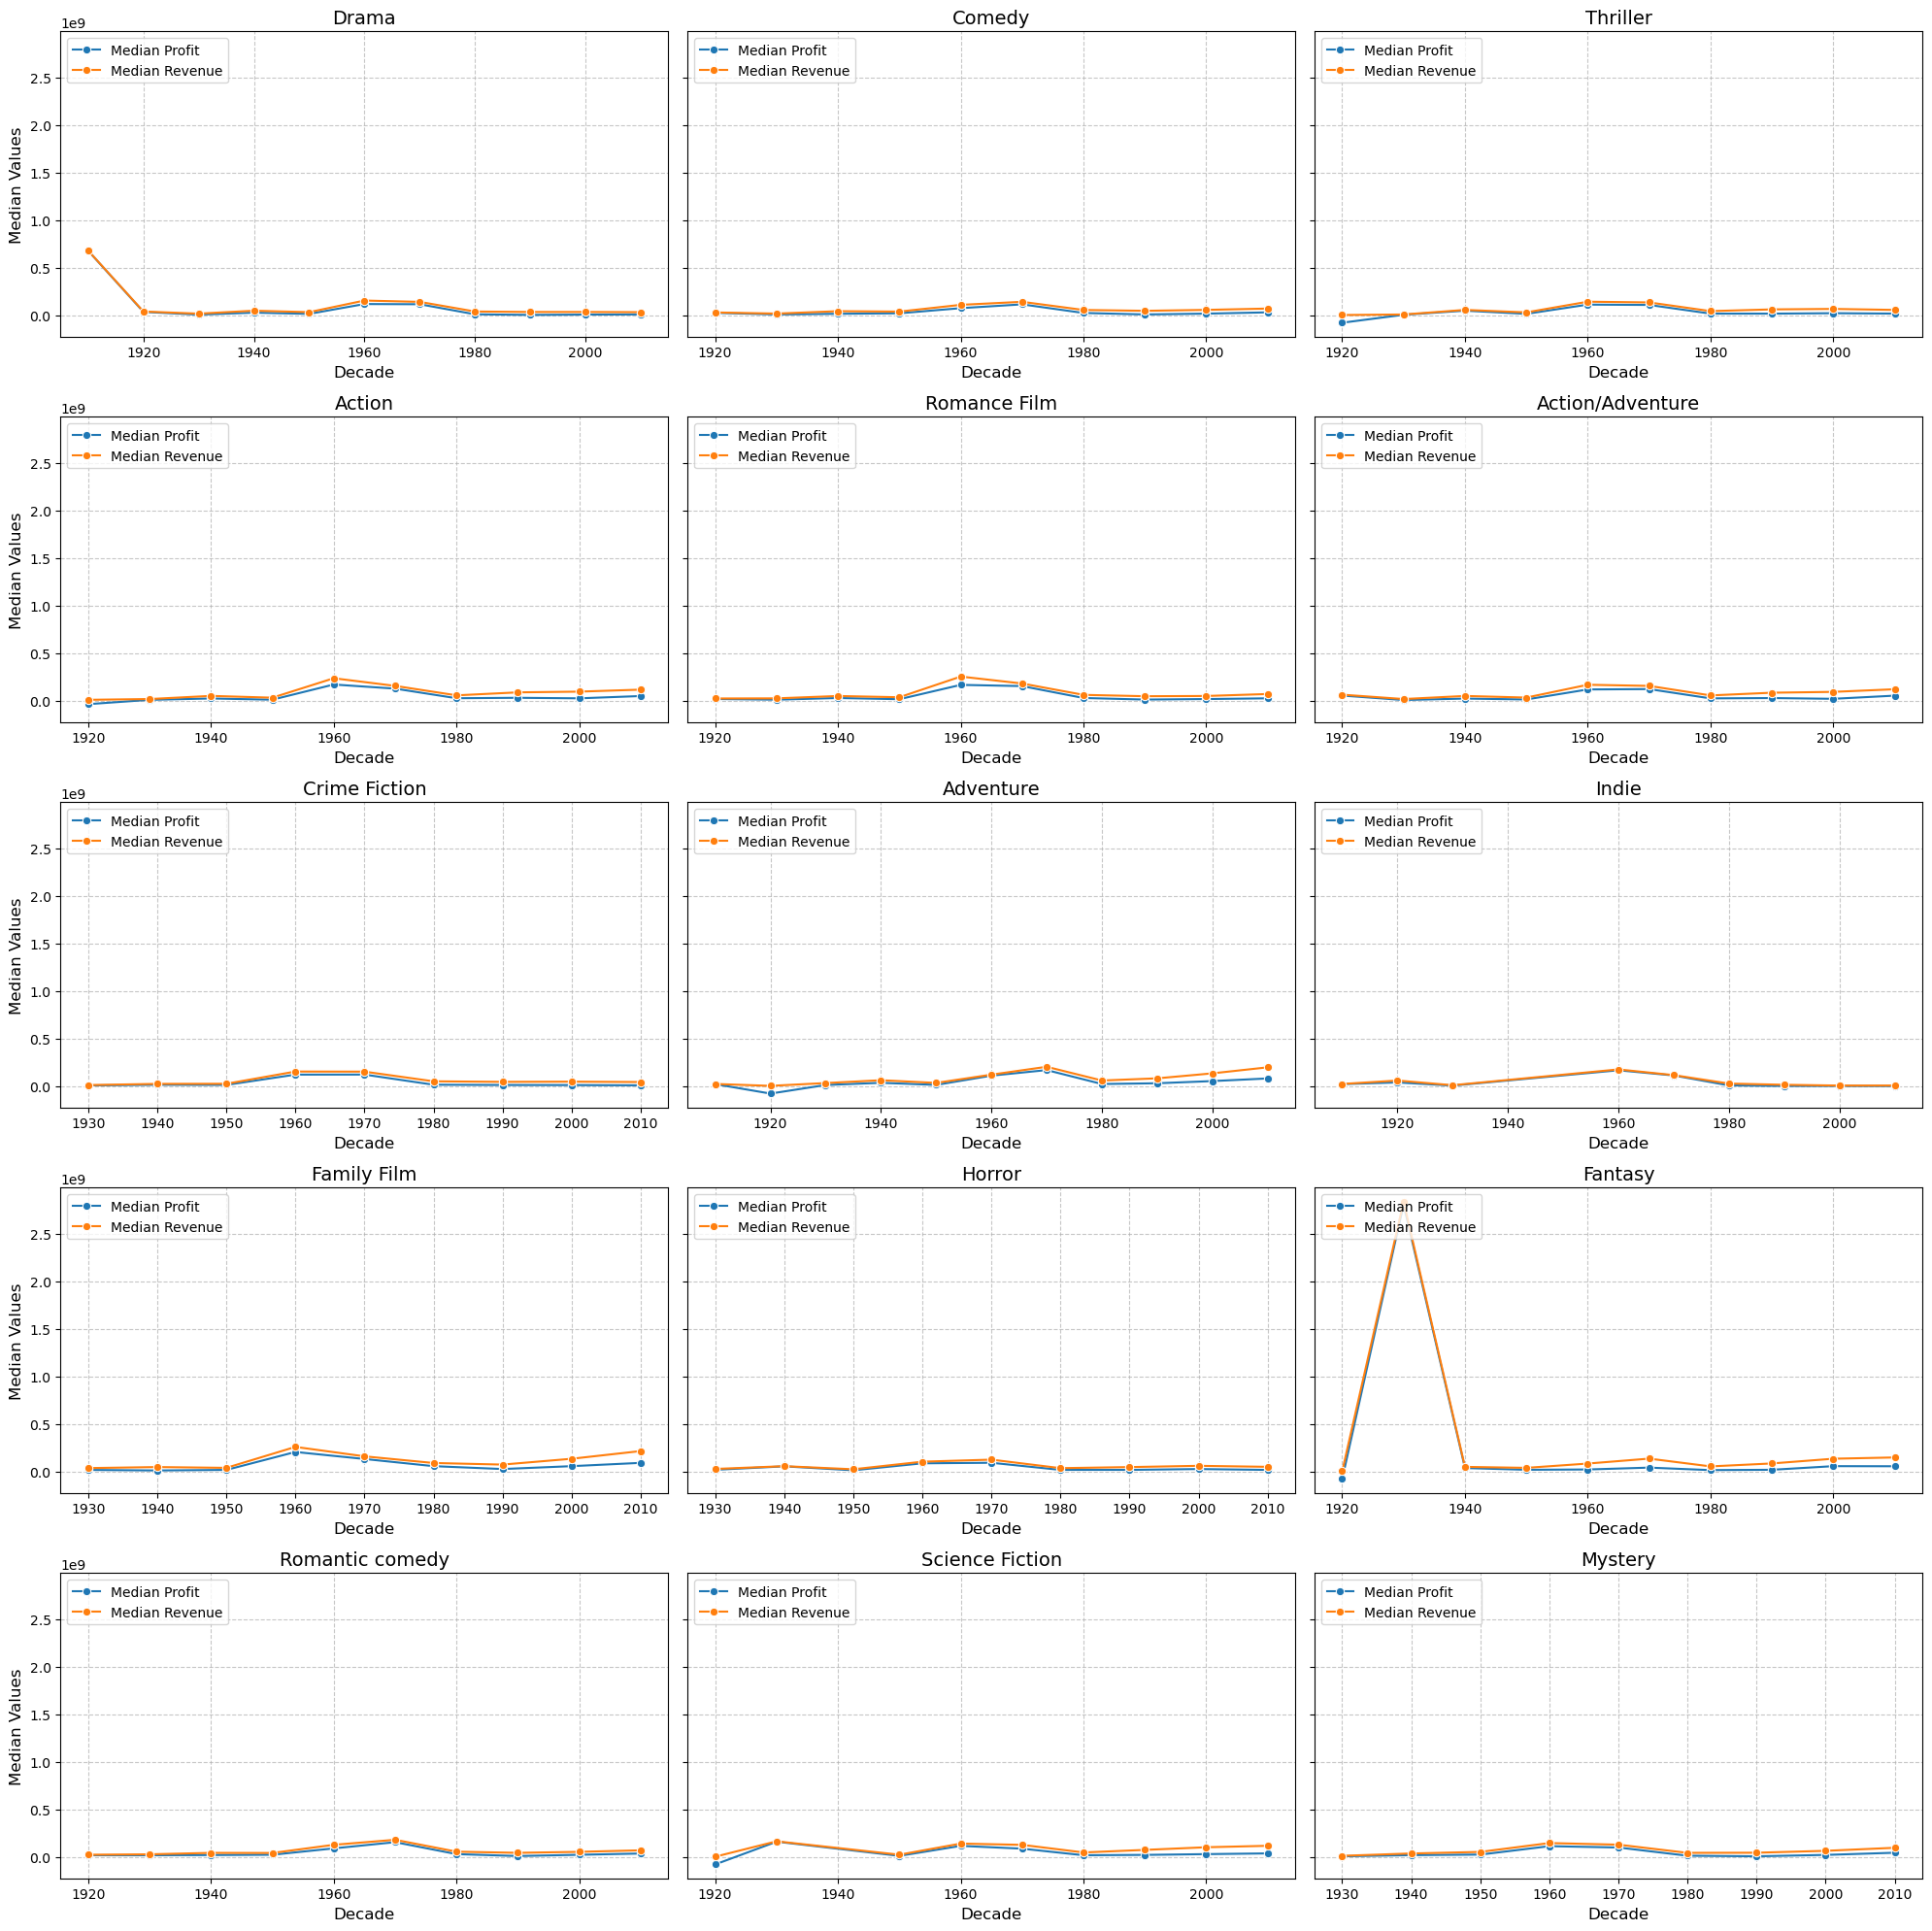

In [349]:
# Create a new column for 10-year bins
classified_summaries_inflation_BO['decade'] = (classified_summaries_inflation_BO['movie_release_date'] // 10) * 10

# Set up the subplots
fig, axes = plt.subplots(5, 3, figsize=(20, 20), sharey=True)  # Ensure separate y-scales for clarity
axes = axes.flatten()


# Plot the evolution of profitability and revenues for each genre
for i, genre in enumerate(top_genre.index):
    genre_df = classified_summaries_inflation_BO[classified_summaries_inflation_BO['movie_genres'] == genre]
    median_profit_by_decade = genre_df.groupby('decade')['adjusted_profit'].median().reset_index()
    median_revenue_by_decade = genre_df.groupby('decade')['adjusted_revenue'].median().reset_index()

    
    # Plot median profit and revenue on primary y-axis
    sns.lineplot(x='decade', y='adjusted_profit', data=median_profit_by_decade, marker='o', ax=axes[i], label='Median Profit')
    sns.lineplot(x='decade', y='adjusted_revenue', data=median_revenue_by_decade, marker='o', ax=axes[i], label='Median Revenue')
    
    
    # Configure the primary axis
    axes[i].set_title(f'{genre}', fontsize=14)
    axes[i].set_xlabel('Decade', fontsize=12)
    axes[i].set_ylabel('Median Values', fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.7)
    # Add legends for both axes
    axes[i].legend(loc='upper left', fontsize=10)
    

plt.tight_layout()
plt.show()

It's noticeable here, with some presence of outliers, that in general, movie revenues and profits are increasing over the years for almost all the 15 main genres, except indie movies that do not generate high revenues nor profits. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

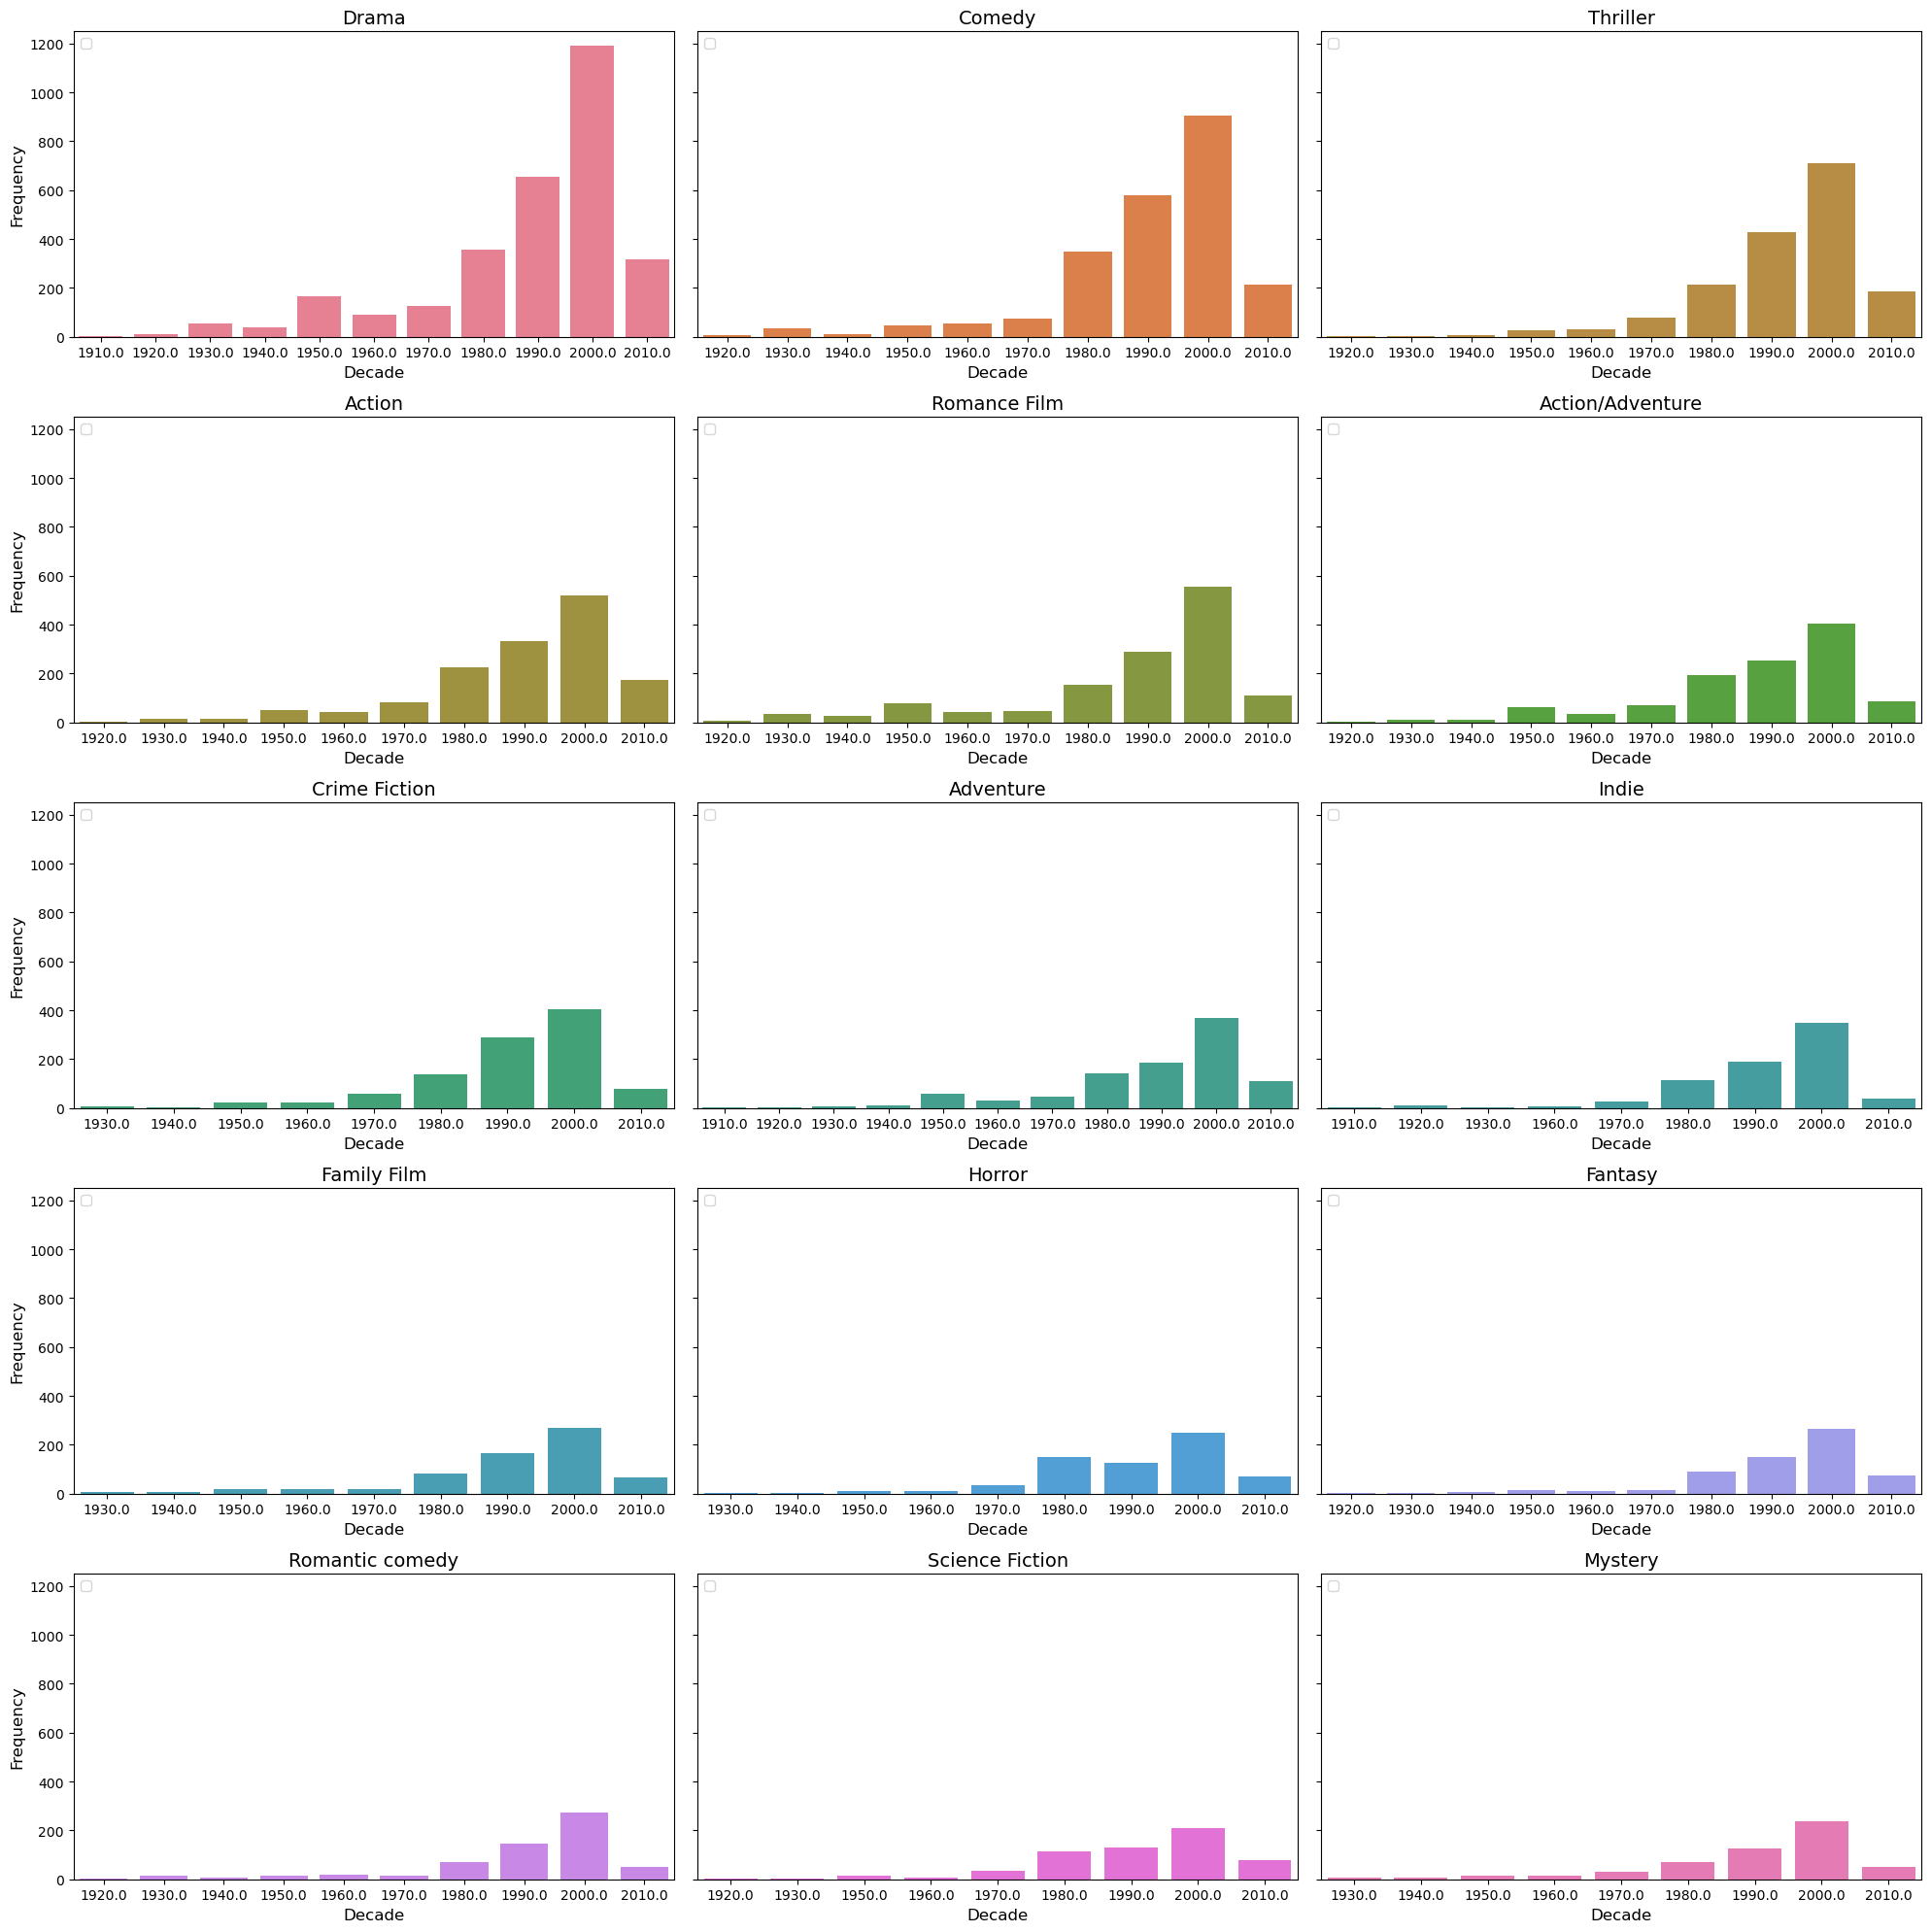

In [350]:
# Create a new column for 10-year bins
classified_summaries_inflation_BO['decade'] = (classified_summaries_inflation_BO['movie_release_date'] // 10) * 10

# Set up the subplots
fig, axes = plt.subplots(5, 3, figsize=(20, 20), sharey=True)  # Ensure separate y-scales for clarity
axes = axes.flatten()

# Plot the evolution of profitability and revenues for each genre
for i, genre in enumerate(top_genre.index):
    genre_df = classified_summaries_inflation_BO[classified_summaries_inflation_BO['movie_genres'] == genre]
    count_by_decade = genre_df.groupby('decade').size().reset_index(name='count')
    
    sns.barplot(x='decade', y='count', data=count_by_decade, ax=axes[i], color=color_dict[genre])

    # Configure the primary axis
    axes[i].set_title(f'{genre}', fontsize=14)
    axes[i].set_xlabel('Decade', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    # Add legends for both axes
    axes[i].legend(loc='upper left', fontsize=10)


plt.tight_layout()
plt.show()

As counts, it's noticeable that Drama, Comedy and Thriller are the most released movies. 

## 5.4 - Commercial successes

We define here a ratio to determine the commercial success : the profitability ratio, defined as the ratio between the profit of a movie and its budget. Without inflation here :

In [351]:
movies_budget.head(2) 

wikipedia_movie_id freebase_movie_id      movie_name  movie_release_date  \
0              975900         /m/03vyhn  Ghosts of Mars              2001.0   
1              171005         /m/016ywb         Henry V              1989.0   

   movie_box_office_revenue  movie_runtime     movie_languages  \
0                14010832.0           98.0  [English Language]   
1                10161099.0          137.0  [English Language]   

              movie_countries  \
0  [United States of America]   
1            [United Kingdom]   

                                        movie_genres  title_year  \
0  [Thriller, Science Fiction, Horror, Adventure,...      2001.0   
1  [Costume drama, War film, Epic, Period piece, ...      1989.0   

                                        plot_summary      budget  \
0  Set in the second half of the 22nd century, th...  28000000.0   
1  {{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...   9000000.0   

   opening_weekend  rating_score         producer  year_interval      profit  \
0        3804452.0           4.9   John Carpenter         2000.0 -13989168.0   
1          64933.0           7.5  Kenneth Branagh         1985.0   1161099.0   

   profitability_ratio  
0            -0.499613  
1             0.129011

In [352]:
movies_budget['profit'] = movies_budget['movie_box_office_revenue'] - movies_budget['budget']

In [353]:
# Calculate profitability ratio (profit/budget)  

movies_budget['profitability_ratio'] = movies_budget['profit'] / movies_budget['budget']

# Filter out movies with missing budget or revenue
#merged_movies_scraped_budget = movies_budget.dropna(subset=['budget', 'movie_box_office_revenue'])

Which movies are the most profitable ones ? Everybody thinks of Avatar...

In [354]:
# Descriptive statistics
# Top 10 most profitable movies by profit
top_10_profit = movies_budget.nlargest(10, 'profit')

# Top 10 most profitable movies by profitability ratio
top_10_profitability_ratio = movies_budget.nlargest(10, 'profitability_ratio')

print("\nTop 10 Movies by Profit:\n", top_10_profit[['movie_name', 'profit']])
print("\nTop 10 Movies by Profitability Ratio:\n", top_10_profitability_ratio[['movie_name', 'profitability_ratio']])


Top 10 Movies by Profit:
                                          movie_name        profit
2341                                         Avatar  2.545275e+09
2183                                        Titanic  1.985372e+09
2781                                   The Avengers  1.291758e+09
3013  Harry Potter and the Deathly Hallows – Part 2  1.203111e+09
7882  The Lord of the Rings: The Return of the King  1.025930e+09
1843                 Transformers: Dark of the Moon  9.287470e+08
4911        Star Wars Episode I: The Phantom Menace  9.120447e+08
2114                                  The Lion King  9.065838e+08
6777                                    Toy Story 3  8.631719e+08
6136                                  Jurassic Park  8.516911e+08

Top 10 Movies by Profitability Ratio:
                     movie_name  profitability_ratio
5730       Paranormal Activity         12889.386667
3725                Wide Awake          4568.126000
3077        The Last Broadcast          4443.444444

Indeed, Avatar is the moving that generated the highest profit ! But for the profitability, it's clearly not this one. 

As an example, the movie "The Last Broadcast" is interesting, it only costed 900 dollars to be produced and it generatd 4 millions of dollars as worldwide revenue. The film was made on a budget of 900 dollars, and edited on a desktop computer using Adobe Premiere 4.2. 600 dollars were allocated for production, while 240 dollars were utilized for digital video stock, and twenty hours of tape for 12 dollars each. see https://en.wikipedia.org/wiki/The_Last_Broadcast_(film).

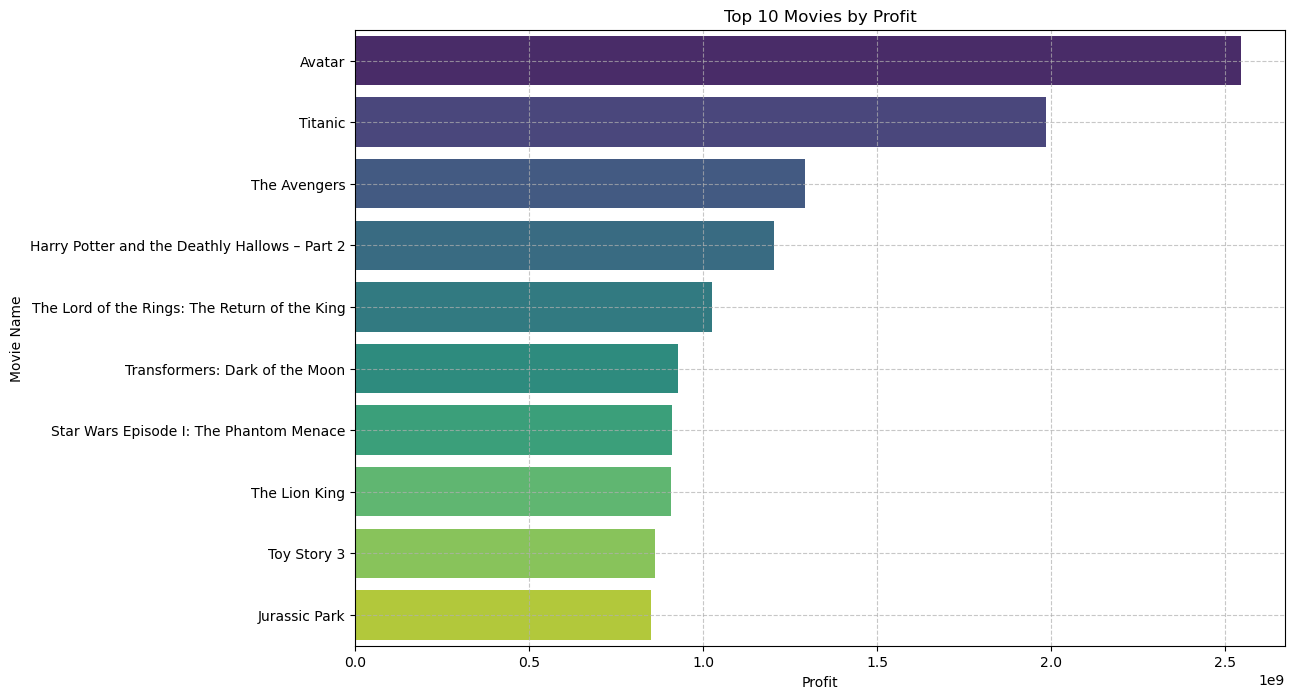

In [355]:
plt.figure(figsize=(12, 8))
sns.barplot(x='profit', y='movie_name', data=top_10_profit, palette='viridis')
plt.title('Top 10 Movies by Profit')
plt.xlabel('Profit')
plt.ylabel('Movie Name')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Let's compare profit to budget in log-log scale to avoid effects of outliers, and taking into account inflation over the years :

In [356]:
df_inflation = pd.read_csv('data/raw/inflation_data.csv')
df_inflation['date'] = pd.to_datetime(df_inflation['date'])
df_inflation = df_inflation.set_index('date')
df_inflation = df_inflation.resample('Y').mean()  # Resample to yearly data
df_inflation['year'] = df_inflation.index.year
df_inflation = df_inflation.set_index('year')['value']

# Choose base year (the most recent CPI value for 2023)
base_year = 2023
cpi_base = df_inflation[base_year]

# Calculate adjustment factors for each year
df_inflation = cpi_base / df_inflation

# Load classified_summaries_inflation DataFrame
movies_budget_inflation = movies_budget.copy()

# Apply inflation adjustment
movies_budget_inflation['adjusted_revenue'] = movies_budget_inflation.apply(
    lambda x: x['movie_box_office_revenue'] * df_inflation.get(x['movie_release_date'], 1), axis=1
)
movies_budget_inflation['adjusted_budget'] = movies_budget_inflation.apply(
    lambda x: x['budget'] * df_inflation.get(x['movie_release_date'], 1) if pd.notna(x['budget']) else np.nan, axis=1
)  

movies_budget_inflation['adjusted_profit'] = movies_budget_inflation['adjusted_revenue'] - movies_budget_inflation['adjusted_budget']

# Save the updated DataFrame
len(movies_budget_inflation)  

5826

In [357]:
movies_budget_inflation.head()  

wikipedia_movie_id freebase_movie_id              movie_name  \
0              975900         /m/03vyhn          Ghosts of Mars   
1              171005         /m/016ywb                 Henry V   
2               77856          /m/0kcn7            Mary Poppins   
3              156558         /m/014k4y                Baby Boy   
4              261237         /m/01mrrd  The Gods Must Be Crazy   

   movie_release_date  movie_box_office_revenue  movie_runtime  \
0              2001.0                14010832.0           98.0   
1              1989.0                10161099.0          137.0   
2              1964.0               102272727.0          139.0   
3              2001.0                29381649.0          123.0   
4              1980.0                34331783.0          109.0   

                          movie_languages             movie_countries  \
0                      [English Language]  [United States of America]   
1                      [English Language]            [United Kingdom]   
2                      [English Language]  [United States of America]   
3                      [English Language]  [United States of America]   
4  [Afrikaans Language, English Language]              [South Africa]   

                                        movie_genres  title_year  ...  \
0  [Thriller, Science Fiction, Horror, Adventure,...      2001.0  ...   
1  [Costume drama, War film, Epic, Period piece, ...      1989.0  ...   
2  [Children's/Family, Musical, Fantasy, Comedy, ...      1964.0  ...   
3              [Crime Fiction, Drama, Coming of age]      2001.0  ...   
4  [Adventure, Action/Adventure, Indie, World cin...         NaN  ...   

       budget  opening_weekend  rating_score          producer year_interval  \
0  28000000.0        3804452.0           4.9    John Carpenter        2000.0   
1   9000000.0          64933.0           7.5   Kenneth Branagh        1985.0   
2   6000000.0              NaN           7.8  Robert Stevenson        1960.0   
3  16000000.0        8606403.0           6.5    John Singleton        2000.0   
4   5000000.0              NaN           7.3         Jamie Uys        1980.0   

       profit  profitability_ratio  adjusted_revenue  adjusted_budget  \
0 -13989168.0            -0.499613      2.392683e+07     4.781667e+07   
1   1161099.0             0.129011      2.478678e+07     2.195442e+07   
2  96272727.0            16.045455      9.962269e+08     5.844531e+07   
3  13381649.0             0.836353      5.017617e+07     2.732381e+07   
4  29331783.0             5.866357      1.259951e+08     1.834964e+07   

   adjusted_profit  
0    -2.388984e+07  
1     2.832362e+06  
2     9.377816e+08  
3     2.285235e+07  
4     1.076455e+08  

[5 rows x 21 columns]

In [358]:
movies_budget_inflation['profitability_ratio'] = movies_budget_inflation['adjusted_profit'] / movies_budget_inflation['adjusted_budget']


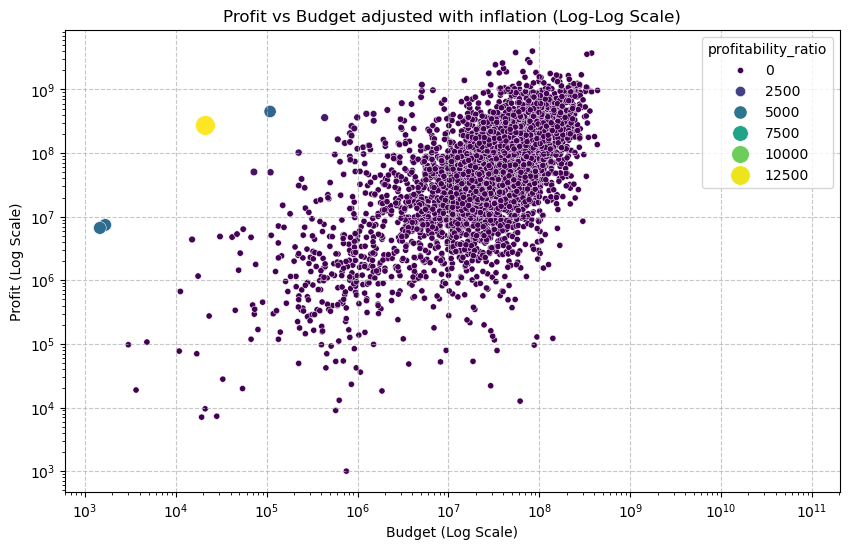

In [359]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='adjusted_budget', y='adjusted_profit', data=movies_budget_inflation, hue='profitability_ratio', palette='viridis', size='profitability_ratio', sizes=(20, 200))

# Add regression line
# Set log-log scale
plt.xscale('log')
plt.yscale('log')

plt.title('Profit vs Budget adjusted with inflation (Log-Log Scale)')
plt.xlabel('Budget (Log Scale)')
plt.ylabel('Profit (Log Scale)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

This will be adjusted for Milestone 3, where outliers due to incorrect units in budget of some movies (notably Korean, Japaneese and Chinese ones) will be taken into account.

Now that we analysed genres, we want to go further in the analysis. What about the effect of plot structure and summaries on the rentability of movies ?

# **6. Extracting a Plot Structure for the plot summaries**

The goal here is to **process movie plot summaries to identify their underlying plot structures**. By categorizing each summary according to distinct narrative patterns, we aim to gain insights into common plot structures and explore potential correlations with financial success.

To achieve this, we experimented with **two different approaches**:

1. **Clustering**: We used unsupervised clustering (KMeans) on plot summaries to explore any emergent plot structure patterns.

2. **Large Language Model (LLM) Classification**: Using a predefined set of 15 plot structure categories, we use a LLM to classify each summary. This classification approach uses zero-shot prompting to assign each summary to a category.

A method resumed in summaries.py file allows to create a CSV with all the informations needed.

In [360]:
# We load the data after the preprocessing but before the scraping
movies_summary = pd.read_csv('data/processed/movies_summary_BO.csv')

In [361]:
movies_summary.head()

wikipedia_movie_id freebase_movie_id              movie_name  \
0              975900         /m/03vyhn          Ghosts of Mars   
1              171005         /m/016ywb                 Henry V   
2               77856          /m/0kcn7            Mary Poppins   
3              156558         /m/014k4y                Baby Boy   
4              261237         /m/01mrrd  The Gods Must Be Crazy   

   movie_release_date  movie_box_office_revenue  movie_runtime  \
0              2001.0                14010832.0           98.0   
1              1989.0                10161099.0          137.0   
2              1964.0               102272727.0          139.0   
3              2001.0                29381649.0          123.0   
4              1980.0                34331783.0          109.0   

                              movie_languages               movie_countries  \
0                        ['English Language']  ['United States of America']   
1                        ['English Language']            ['United Kingdom']   
2                        ['English Language']  ['United States of America']   
3                        ['English Language']  ['United States of America']   
4  ['Afrikaans Language', 'English Language']              ['South Africa']   

                                        movie_genres  title_year  \
0  ['Thriller', 'Science Fiction', 'Horror', 'Adv...      2001.0   
1  ['Costume drama', 'War film', 'Epic', 'Period ...      1989.0   
2  ["Children's/Family", 'Musical', 'Fantasy', 'C...      1964.0   
3        ['Crime Fiction', 'Drama', 'Coming of age']      2001.0   
4  ['Adventure', 'Action/Adventure', 'Indie', 'Wo...         NaN   

                                        plot_summary      budget  \
0  Set in the second half of the 22nd century, th...  28000000.0   
1  {{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...   9000000.0   
2  The film opens with Mary Poppins  perched in a...   6000000.0   
3  A young 20-year-old named Jody  lives with his...  16000000.0   
4  The film is a collision of three separate stor...   5000000.0   

   opening_weekend  rating_score          producer  
0        3804452.0           4.9    John Carpenter  
1          64933.0           7.5   Kenneth Branagh  
2              NaN           7.8  Robert Stevenson  
3        8606403.0           6.5    John Singleton  
4              NaN           7.3         Jamie Uys

## **6.1 Clustering**

### Vectorization of the summaries

First, we transform the plot summaries into a numerical format for clustering by applying **TF-IDF (Term Frequency-Inverse Document Frequency) vectorization**. TF-IDF highlights important words in each summary by reducing the weight of common terms and increasing the importance of unique terms.

In [362]:
# Text Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_summary['plot_summary'])

combined_matrix = tfidf_matrix.toarray()

### Clustering using KMeans

Now, we use **KMeans clustering** to group the plot summaries based on their TF-IDF representations. This step aims to identify distinct plot structure patterns by clustering similar summaries together.

The clustering labels are added to the dataset, allowing us to analyze plot structure patterns within each identified cluster.

To determine the optimal number of clusters, we plotted the **silhouette score** for cluster values ranging from 5 to 20. Typically, an ideal number of clusters shows a **peak in the silhouette score**.

However, in our plot, the silhouette score continually increases as the number of clusters increases.

Given these results, we will proceed with **15 clusters**. This number provides a balance between interpretability and granularity, allowing us to capture a range of plot structures without creating an excessive number of small, indistinct clusters.

In [604]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for i in range(5, 20):
    kmeans = KMeans(n_clusters=i, random_state=0)
    labels = kmeans.fit_predict(combined_matrix)
    score = silhouette_score(combined_matrix, labels)
    silhouette_scores.append(score)

We can now visualize the results :

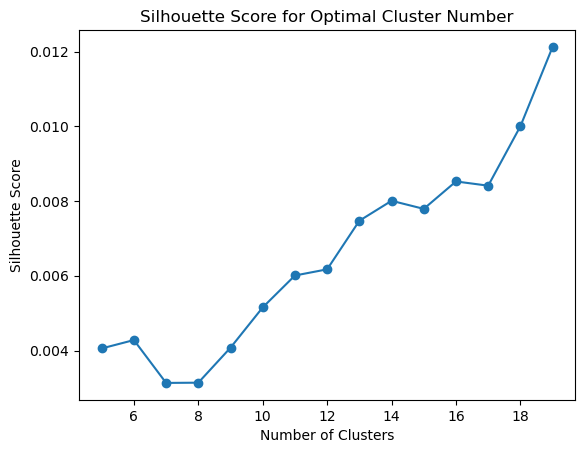

In [605]:
plt.plot(range(5, 20), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal Cluster Number")
plt.show()

In [606]:
# Clustering with KMeans
n_clusters = 15
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
movies_summary['plot_structure_cluster'] = kmeans.fit_predict(combined_matrix)

In [607]:
movies_summary['plot_structure_cluster'].value_counts()

plot_structure_cluster
6     2619
3     1159
14    1039
2      890
4      791
11     433
5      343
8      115
1      103
0       82
7       81
12      81
9       79
10      78
13      71
Name: count, dtype: int64

In [608]:
X_reduced_tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=0).fit_transform(combined_matrix)
X_reduced_pca = PCA(n_components=2).fit(combined_matrix).transform(combined_matrix)

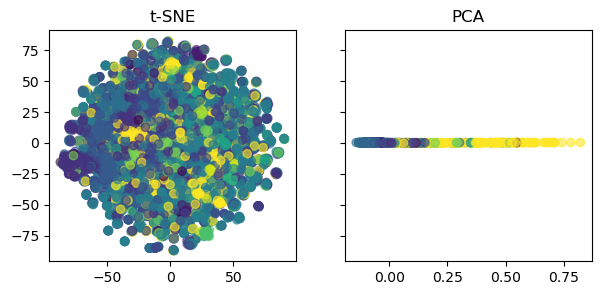

In [609]:
fig, axs = plt.subplots(1, 2, figsize=(7,3), sharey=True)

# Cluster the data in 3 groups
labels = movies_summary['plot_structure_cluster']

# Plot the data reduced in 2d space with t-SNE
axs[0].scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=labels, alpha=0.6)
axs[0].set_title("t-SNE")

# Plot the data reduced in 2d space with PCA
axs[1].scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=labels, alpha=0.6)
axs[1].set_title("PCA")

plt.show()

The **distribution of plot summaries across clusters** shows that the clustering algorithm has created some clusters with a significantly higher number of summaries than others. The top three clusters (2, 10, and 7) collectively hold a large portion of the summaries, indicating that certain plot structures may be more common. We have to dive more in the clusters.

**Top Terms per Cluster**

To gain a better understanding of each cluster's underlying plot structure, we examine the **top terms** associated with each cluster. By averaging the **TF-IDF values** of terms within each cluster, we identify the 10 most representative words for each group. This allows us to interpret the clusters.

In [610]:
# Cluster Interpretation
# Get the top terms per cluster by averaging the TF-IDF values of the terms in each cluster
terms = tfidf_vectorizer.get_feature_names_out()
cluster_centers = kmeans.cluster_centers_
top_terms_per_cluster = []

for i in range(n_clusters):
    top_terms_idx = cluster_centers[i].argsort()[-10:]  # Top 10 terms per cluster
    top_terms_per_cluster.append([terms[idx] for idx in top_terms_idx])

# Display top terms per cluster for interpretation
for i, terms in enumerate(top_terms_per_cluster):
    print(f"Cluster {i+1} top terms: {', '.join(terms)}")

Cluster 1 top terms: town, wins, speed, father, car, win, money, horse, kid, race
Cluster 2 top terms: finds, victor, mother, anna, car, jack, father, house, jim, ben
Cluster 3 top terms: new, jin, anna, man, woman, love, life, story, young, film
Cluster 4 top terms: case, fbi, killed, kill, car, man, gang, murder, frank, police
Cluster 5 top terms: queen, village, general, battle, camp, men, soldiers, army, war, king
Cluster 6 top terms: mission, aliens, space, captain, planet, bond, alien, earth, crew, ship
Cluster 7 top terms: tells, love, home, father, house, david, michael, new, max, charlie
Cluster 8 top terms: emma, jessie, girl, home, mother, house, father, alex, maggie, adam
Cluster 9 top terms: mark, later, tells, night, father, house, apartment, john, paul, sarah
Cluster 10 top terms: police, new, money, alex, wife, elizabeth, beth, kate, alice, nick
Cluster 11 top terms: ira, man, billie, money, husband, wife, lloyd, film, ron, harry
Cluster 12 top terms: football, players,

### Interpretation of Cluster Themes

Here’s an interpretation of each cluster based on the top terms:

- **Cluster 1**: Plots focused on competitive themes.
- **Cluster 2**: Crime or thriller themes, involving murder, gangs, and police confrontations.
- **Cluster 3**: Domestic and family-centered stories.
- **Cluster 4**: Sci-fi or adventure narratives set in space or otherworldly environments.
- **Cluster 5**: War or historical battle narratives, with themes of patriotism, loyalty, and military conflict.
- **Cluster 6**: Family dynamics involving financial or personal struggles, often with a focus on character growth.
- **Cluster 7**: Stories focused on love, personal growth, and the journey of family relationships.
- **Cluster 8**: Character-driven drama with themes of love, relationships, and family life.
- **Cluster 9**: Domestic dramas with family relationships at the center, often involving parents, spouses, and home life.
- **Cluster 10**: School or sports settings, focusing on themes of teamwork, mentorship, and competition.
- **Cluster 11**: Plots involving curses or superstitions, with an emphasis on individual struggles with fate or financial issues.
- **Cluster 12**: Family and relationship-centered stories, possibly featuring complex dynamics within close-knit communities.
- **Cluster 13**: Family-focused narratives often with themes of life challenges, father-son relationships, or personal introspection.
- **Cluster 14**: Stories about family dynamics and personal relationships, with a recurring theme of domestic settings.
- **Cluster 15**: Family-centered dramas, often highlighting parent-child dynamics and personal development.


Each cluster reveals distinct themes and settings. While this analysis helps to identify common elements within each group, **we are not fully satisfied with this approach** as it appears to capture **genre and themes more than specific plot structures**.

Since our goal is to identify different types of plot structures, clustering based solely on keywords may lack the depth needed to capture narrative progression and plot dynamics. Consequently, we explore alternative methods, such as leveraging large language models or deeper natural language processing techniques, to classify plot structures more accurately.

## **6.2 Large Language Model (LLM) Classification**

In this section, we employ LLMs to classify plot summaries into specific plot structure categories.

Given that 75% of the summaries exceed 729 words, they often surpass typical model token limits (1024 tokens). To address this, we first summarize long plot summaries using `facebook/bart-large-cnn`, reducing their length.

Once the summaries are manageable in size, we classify each summary using a zero-shot classification pipeline (`facebook/bart-large-mnli`). This approach allows us to categorize the plot structures without additional training, leveraging the model’s pre-trained capabilities for reliable categorization.

In [611]:
# print stats about len of summaries
print(movies_summary['plot_summary'].apply(lambda x: len(x.split())).describe())

count    7964.000000
mean      510.805249
std       349.738636
min        17.000000
25%       202.000000
50%       501.000000
75%       728.250000
max      3546.000000
Name: plot_summary, dtype: float64


## 6.2.1 Summarization

To generate the summarized version of the plot summaries, we run the script ```src/NLP/summaries.py```. 
We are using a pre-trained transformer model (`facebook/bart-large-cnn`). Here's an overview of what this script achieves:

1. **Text Preprocessing**:
   - Cleans and normalizes plot summaries by removing unnecessary characters and whitespace.
   - Splits long texts into manageable chunks at sentence boundaries to fit the model's input token limit (1024 tokens).

2. **Summarization**:
   - Processes each chunk of text through the model to generate intermediate summaries.
   - Combines these intermediate summaries and processes the result to create a final, concise summary for each plot.
   - When the summary is short enough, we keep it as it is whithout using the LLM.

3. **Batch Processing**:
   - Summarizes plot summaries in batches.

4. **Output**:
   - A final CSV file is created with the movies dataframe completed with our new feature ```summarized```.

##### Implementation details of the summarization pipeline

1. **Text Length Optimization**:
   - For texts under 600 words, the original text is preserved
   - This threshold was chosen to maintain detail in already concise summaries while optimizing processing time
   - Longer texts undergo the full summarization pipeline

2. **Chunking Mechanism**:
   - Long texts are split into manageable chunks at sentence boundaries
   - Maximum chunk length is set to 1024 tokens
   - Preserves semantic coherence by maintaining sentence integrity
   - Prevents information loss that could occur with arbitrary truncation

3. **Two-Stage Summarization**:
   - First stage: Each chunk is summarized independently
   - Second stage: Chunk summaries are combined and summarized again
   - Parameters are tuned differently for each stage:
     - Chunk summaries: 30-150 tokens
     - Final summary: 50-200 tokens

5. **Model Configuration**:
   - Uses facebook/bart-large-cnn model
   - Beam search with 4 beams for better quality (suggested by GPT4o & huggingface)
   - Length penalty of 1.5 to encourage informative summaries (suggested by GPT4o & huggingface)
   - No-repeat ngram size of 2 to prevent repetition (suggested by GPT4o & huggingface)

Note: we divided the summaries into chunks of 1024 tokens to fit the model's input token limit. Having bigger chunks would have crashed the GPU due to memory issues with Izar cluster.

## 6.2.2 Zero-shot Classification


After having our summarized plot summaries, we create our pipeline for classification, and classify our summarized plot summaries into plot structure categories.

To classify our plot structure we use the script ```src/NLP/classify.py```.

We use the pre-trained transformer model (`facebook/bart-large-mnli`) for zero-shot classification of movie plot summaries, since the model fits perfectly our task. Here's an overview of the script's functionality:

1. **Model Initialization**:
   - Loads the `facebook/bart-large-mnli` model for zero-shot classification.

2. **Predefined Categories**:
   - Defines a comprehensive list of candidate labels that represent various plot structures (examples: "Hero’s Journey and Transformation," "Crime and Underworld Exploration").

3. **Text Classification**:
   - Processes each plot summary using the zero-shot classification pipeline.
   - The model predicts the most likely category for each summary from the predefined list of labels.

4. **Output**:
   - Saves the final dataframe to ````data/processed/movies_with_classifications.csv````.

To create the list of plot structure categories, we synthesized from several narrative frameworks:

•⁠  ⁠*The Seven Basic Plots* by Christopher Booker:([campfirewriting.com](https://www.campfirewriting.com/learn/narrative-structure))

•⁠  ⁠*The Hero's Journey* by Joseph Campbell: ([campfirewriting.com](https://www.campfirewriting.com/learn/narrative-structure))

•⁠  ⁠*Freytag's Pyramid*: ([blog.reedsy.com](https://blog.reedsy.com/guide/story-structure/))

Additionally, since we use zero-shot classification, we adapted the categories to be distinct and descriptive enough for the model to differentiate between them.

Here are the 15 candidate categories :

1. **Hero’s Journey and Transformation**: The protagonist undergoes personal growth, starting as an ordinary individual who faces challenges, gains allies, overcomes obstacles, and returns transformed.
2. **Quest for Vengeance or Justice**: A revenge-driven plot where the protagonist seeks retribution or justice for a past wrong or injustice.
3. **Coming of Age and Self-Discovery**: The protagonist matures or gains self-awareness, often overcoming personal or societal obstacles.
4. **Survival or Escape**: The story revolves around characters trying to survive dangerous situations or escape captivity.
5. **Rise and Fall of a Protagonist**: The protagonist experiences a rise to power or success, followed by a tragic or inevitable downfall.
6. **Love and Relationship Dynamics**: Focuses on romantic or family relationships, often dealing with misunderstandings, unions, reconciliations, or unfulfilled love.
7. **Comedy of Errors or Misadventure**: Characters experience humorous, unintended consequences or misadventures while pursuing a goal.
8. **Crime and Underworld Exploration**: The story explores criminal activities or the underworld, often involving heists, gang conflicts, or undercover missions.
9. **Power Struggle and Betrayal**: Focuses on conflicts for power or leadership, with betrayal as a central theme, often involving shifting alliances.
10. **Mystery and Conspiracy Unveiling**: The protagonist uncovers a hidden conspiracy, solves puzzles, or discovers hidden truths.
11. **Tragedy and Inevitability**: A character-driven plot where the protagonist faces an inevitable negative outcome, often due to a flaw or external betrayal.
12. **Conflict with Supernatural or Unknown Forces**: The protagonist encounters supernatural entities, unknown forces, or sci-fi elements that pose existential challenges.
13. **Comedy in Domestic Life**: Focuses on the humor and challenges of family life, with everyday misunderstandings and domestic issues driving the plot.
14. **Social Rebellion or Fight Against Oppression**: The protagonist challenges societal norms or oppressive systems, leading to personal or collective change.
15. **Fantasy or Science Fiction Quest**: Centers on a journey or quest in a fantastical or sci-fi setting, involving world-building, encounters with non-human entities, and mythical or technological challenges.


##### Implementation details of the zero-shot classification pipeline

The classification process is implemented in `src/classify.py` with several key components designed for efficient and accurate plot structure categorization:

1. **Model Architecture**:
   - Uses facebook/bart-large-mnli model
   - Chosen for zero-shot classification capabilities
   - Pre-trained on diverse text understanding tasks
   - Optimized for multi-class classification without additional training

2. **Label Engineering**:
   - Narrative descriptions for each category
   - Categories designed to capture plot elements
   - We tried to minimize overlap between categories

3. **Processing Pipeline**:
   - Batch processing for efficiency
   - Checkpoint system every 5 batches with GPU handling to not lose our progression

4. **Output Structure**:
   - Preserves original movie metadata
   - Adds plot_structure classification for 15 and 20 categories


## 6.2.3 Try classification with different categories


Finally we tried the same zero-shot classification with different candidate categories. The goal is to capture a broader range of narrative structures

Here are the alternative categories :
1. **Relentless Pursuit**: The protagonist is continuously pursued by a formidable opponent or authority, ending in a final showdown or escape.
2. **Memory Recovery**: The protagonist suffers from memory loss and gradually uncovers their past identity and purpose, often leading to a significant revelation or reunion.
3. **Inheritance of Duty**: A character inherits an extraordinary responsibility, skill, or artifact, which they must protect or learn to wield, typically involving rigorous challenges.
4. **Ordinary to Extraordinary Journey**: An unsuspecting character is drawn into an epic journey, evolving through obstacles to fulfill a unique role they initially resisted or doubted.
5. **Countdown Crisis**: Characters face a strict deadline, solving complex problems or overcoming obstacles before time runs out to avert disaster.
6. **High-Stakes Rescue**: The plot centers on rescuing a person or group from peril, often requiring the protagonist to confront significant physical or moral dilemmas.
7. **Breakout Plot**: The protagonist begins in captivity and must plan and execute an escape, often by navigating complex social or environmental challenges.
8. **Amnesiac Reunion**: Following separation and loss of memory, characters are reunited after a series of incidental encounters gradually restore memories.
9. **Redemption Arc**: A flawed or once-villainous character seeks redemption, confronting their past through sacrifice or atonement.
10. **Hidden Power Awakening**: A character discovers hidden abilities and must undergo training, typically to prepare for a unique challenge or mission.
11. **Unlikely Alliance**: Disparate characters join forces to achieve a shared goal, learning to overcome differences and trust each other to succeed.
12. **Revolutionary Uprising**: The protagonist and allies challenge an oppressive authority, with the story leading to a climactic confrontation or overthrow.
13. **Guardian Mission**: The protagonist is tasked with safeguarding a vulnerable individual, group, or object, navigating multiple threats to fulfill their protective role.
14. **Duel for Justice**: The storyline builds toward a climactic one-on-one duel, often against a personal nemesis, to settle a longstanding score or defend a cause.
15. **Treasure Hunt**: Characters compete to uncover a coveted object or location, leading to rivalries, alliances, and betrayals along the way.
16. **Mistaken Identity Spiral**: A character is misidentified or assumed to be someone else, resulting in escalating misunderstandings they must unravel.
17. **Rise to Downfall**: The protagonist rises to prominence but faces a dramatic fall, often due to personal flaws or betrayal, leading to a period of reckoning.
18. **Parallel Journeys**: Two main characters embark on distinct but intersecting journeys, with their paths influencing each other toward a shared conclusion.
19. **Mission to Save a Community**: The protagonist works to save or uplift their community from a specific threat, often gaining respect or unity along the way.
20. **Discovery Expedition**: A journey or exploration driven by curiosity or necessity, uncovering significant discoveries or secrets that impact the characters or world.
21. **Comedy of Errors or Misadventure**: Characters experience humorous, unintended consequences or misadventures while pursuing a goal.
22. **Fantasy or Science Fiction Quest**: Journey in a fantastical or sci-fi setting.
23. **Survival or Escape**: The story revolves around characters trying to survive dangerous situations or escape captivity.

# 6.3 Classification and movie revenues and profit based on plot structures


Using here the results from the zero-shot classification :

In [297]:
classified_summaries = pd.read_csv('data/processed/movies_with_classifications.csv')

Let's do the merging so that we have all the informations in one dataset for analysis :

In [298]:
classified_summaries.head(2)

wikipedia_movie_id freebase_movie_id      movie_name  movie_release_date  \
0              975900         /m/03vyhn  Ghosts of Mars              2001.0   
1              171005         /m/016ywb         Henry V              1989.0   

   movie_box_office_revenue  movie_runtime       movie_languages  \
0                14010832.0           98.0  ['English Language']   
1                10161099.0          137.0  ['English Language']   

                movie_countries  \
0  ['United States of America']   
1            ['United Kingdom']   

                                        movie_genres  title_year  \
0  ['Thriller', 'Science Fiction', 'Horror', 'Adv...      2001.0   
1  ['Costume drama', 'War film', 'Epic', 'Period ...      1989.0   

                                        plot_summary      budget  \
0  Set in the second half of the 22nd century, th...  28000000.0   
1  {{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...   9000000.0   

   opening_weekend  rating_score         producer  \
0        3804452.0           4.9   John Carpenter   
1          64933.0           7.5  Kenneth Branagh   

                                          summarized  \
0  Set in the second half of the 22nd century, th...   
1  {{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...   

                                      plot_structure  \
0  Conflict with Supernatural or Unknown Forces: ...   
1  Rise and Fall of a Protagonist: The protagonis...   

                                   plot_structure_20  
0  Comedy of Errors or Misadventure: Characters e...  
1  Unlikely Alliance: Disparate characters join f...

In [299]:
len(classified_summaries)

7961

There is one plot structure considering 15 categories, and an other one considering 23 categories.

In [ ]:
common_columns =['wikipedia_movie_id','freebase_movie_id', 'movie_name', 'movie_release_date', 'movie_box_office_revenue', 'plot_summary', 'opening_weekend', 'rating_score', 'producer', 'title_year', 'budget']
# Merge the dataframes on common columns
movies_plot = movies_budget_inflation.merge(
    classified_summaries,
    on=common_columns,
    how='inner'
)

# Drop all columns ending with 'y'
movies_plot.drop(columns=[col for col in movies_plot.columns if col.endswith('_y')], inplace=True)
movies_plot.rename(columns={col: col.replace('_x', '') for col in movies_plot.columns if col.endswith('_x')}, inplace=True)
movies_plot.columns

In [637]:
len(movies_plot)

5825

For analysis and plot, we split the two columns containing the plot structure (15 categories and 23 categories) so that it can be plotted more easily :

In [638]:
# Update the 'plot_structure' column to only take elements before the first ":"
movies_plot['plot_structure'] = movies_plot['plot_structure'].str.split(':').str[0]
movies_plot['plot_structure_20'] = movies_plot['plot_structure_20'].str.split(':').str[0]


# Verify the changes
print(movies_plot[['plot_structure', 'plot_structure_20']].head())

# Save the updated dataset back to a CSV file if needed
movies_plot.to_csv('data/processed/movies_budget_inflation_final.csv', index=False)

                                 plot_structure  \
0  Conflict with Supernatural or Unknown Forces   
1                Rise and Fall of a Protagonist   
2             Hero’s Journey and Transformation   
3              Coming of Age and Self-Discovery   
4             Hero’s Journey and Transformation   

                  plot_structure_20  
0  Comedy of Errors or Misadventure  
1                 Unlikely Alliance  
2  Comedy of Errors or Misadventure  
3  Comedy of Errors or Misadventure  
4                 Parallel Journeys  


In [639]:
movies_plot_inflation = movies_plot.copy()

Let's see the distribution of these plot structures :

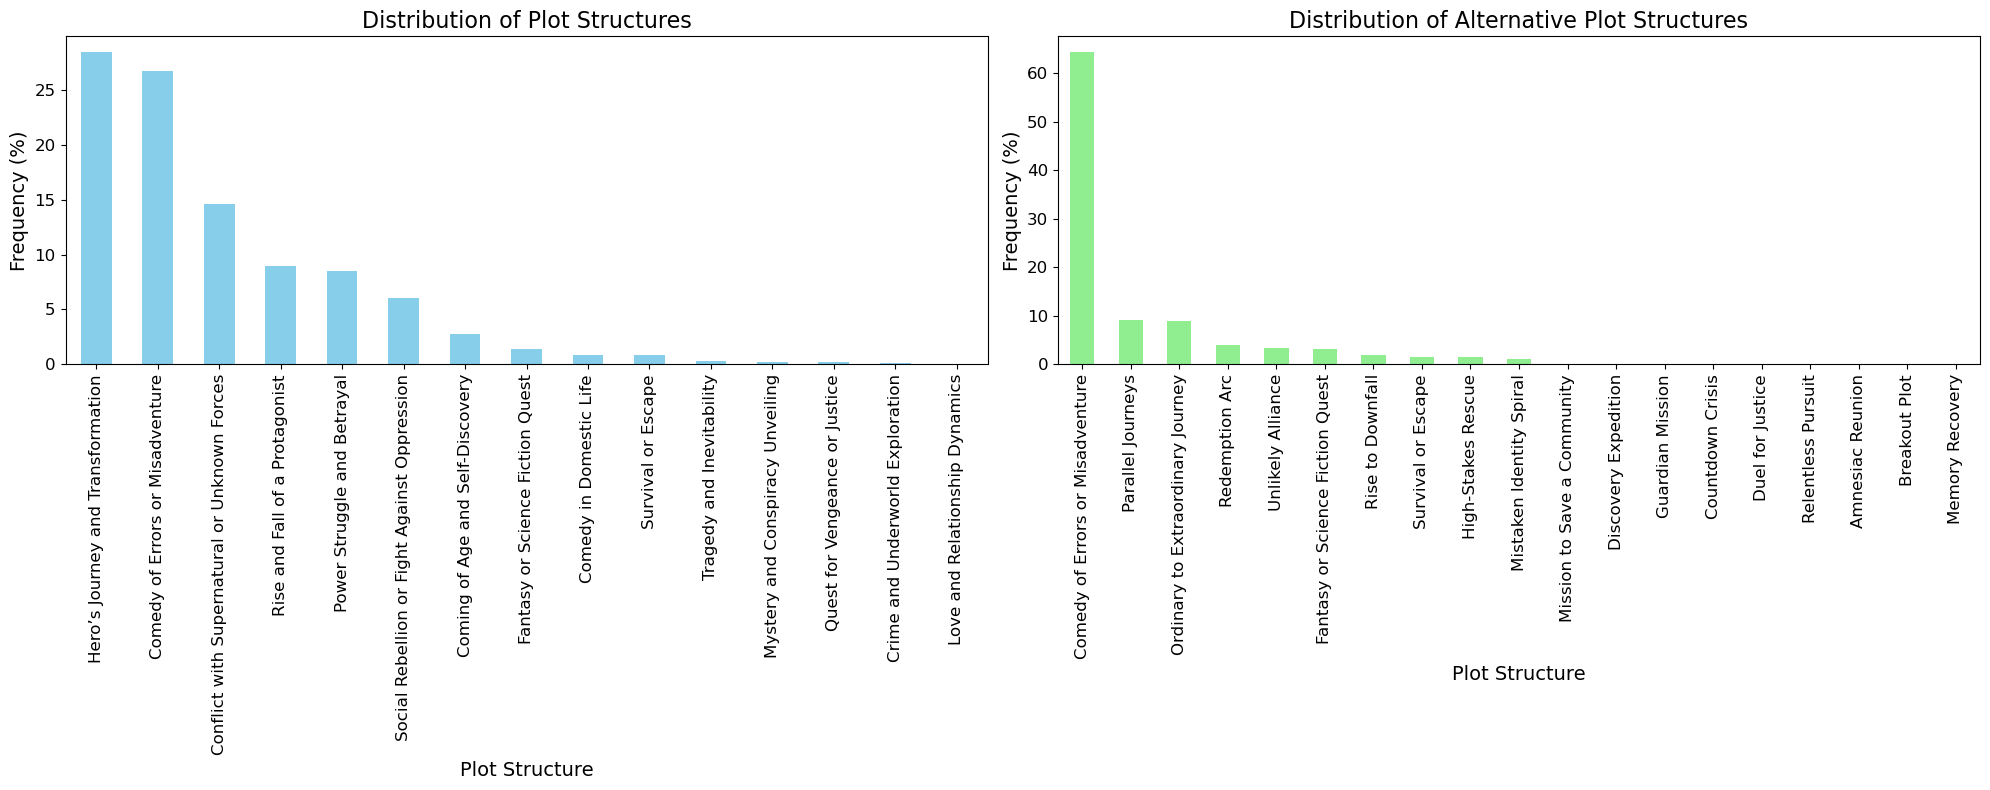

In [640]:
# Assuming movies_plot is your dataframe
plot_counts = movies_plot['plot_structure'].value_counts()
plot_counts_20 = movies_plot['plot_structure_20'].value_counts()

# Calculate the percentage of each genre
plot_counts_per = (plot_counts / plot_counts.sum()) * 100
plot_counts_20_per = (plot_counts_20 / plot_counts_20.sum()) * 100

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot the first distribution
plot_counts_per.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_xlabel('Plot Structure', fontsize=14)
axes[0].set_ylabel('Frequency (%)', fontsize=14)
axes[0].set_title('Distribution of Plot Structures', fontsize=16)
axes[0].tick_params(axis='x', rotation=90, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot the second distribution
plot_counts_20_per.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_xlabel('Plot Structure', fontsize=14)
axes[1].set_ylabel('Frequency (%)', fontsize=14)
axes[1].set_title('Distribution of Alternative Plot Structures', fontsize=16)
axes[1].tick_params(axis='x', rotation=90, labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

The model with 15 plot structures seems to work better. With 23 categories, the plot structure "Comedy of Erroes or Misadventure" contains almost all the movies. For the following analyses, we're focusing on 15 plot structures, where distribution is better, first for revenues :

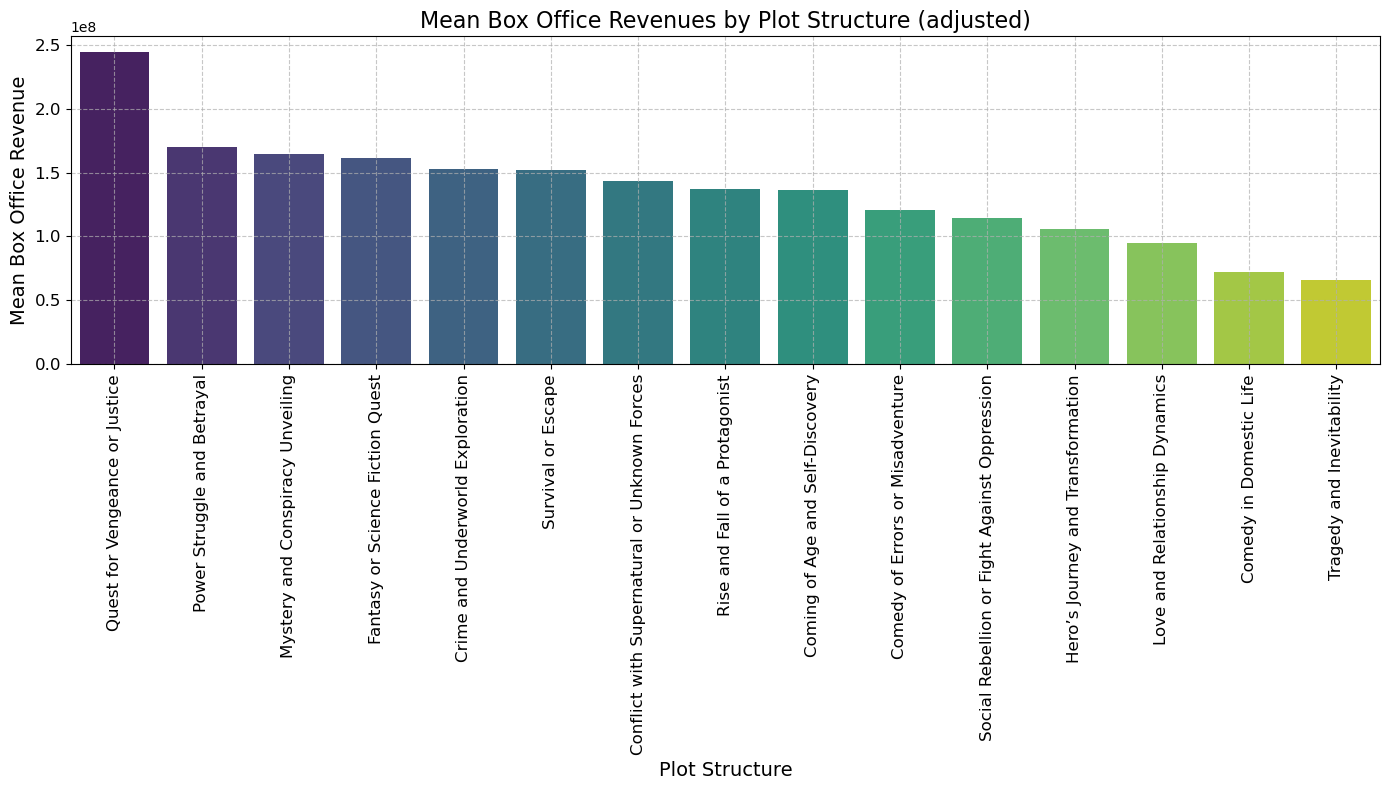

In [641]:
# Calculate the mean revenues and sort them in descending order
mean_revenues_plot = movies_plot_inflation.groupby('plot_structure')['adjusted_revenue'].mean().reset_index()
mean_revenues_plot = mean_revenues_plot.sort_values(by='adjusted_revenue', ascending=False)

# Plot the mean revenues using a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='plot_structure', y='adjusted_revenue', data=mean_revenues_plot, palette='viridis')


plt.title('Mean Box Office Revenues by Plot Structure (adjusted)', fontsize=16)
plt.xlabel('Plot Structure', fontsize=14)
plt.ylabel('Mean Box Office Revenue', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Similarly to what is done in part 5 of the notebook, analysis are made here. The plot structure "Quest for Vengeance or Justice" has the highest mean box office revenues. Are there outliers ?

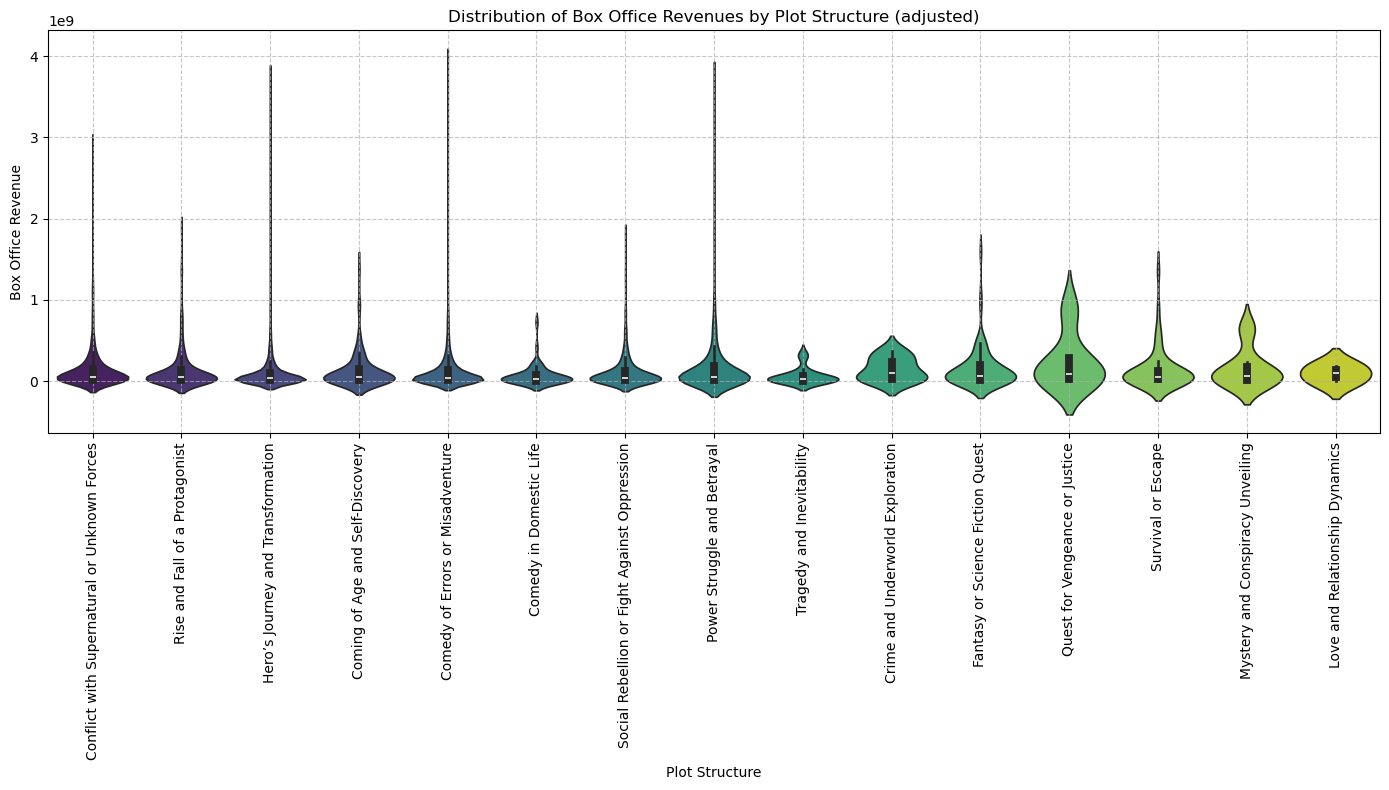

In [642]:
# Plot the distribution of revenues as a function of the genres using violin plots
plt.figure(figsize=(14, 8))
sns.violinplot(x='plot_structure', y='adjusted_revenue', data=movies_plot_inflation, palette='viridis', inner='box', scale='width')

plt.title('Distribution of Box Office Revenues by Plot Structure (adjusted)')
plt.xlabel('Plot Structure')
plt.ylabel('Box Office Revenue')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

There a some outliers for some plot structures such as "Hero's Journey and Transformation" and "Comedy of Errors of Misadventure", but for "Quest for Vengeance or Justice", there are not much outliers ! What does the median says about this ?

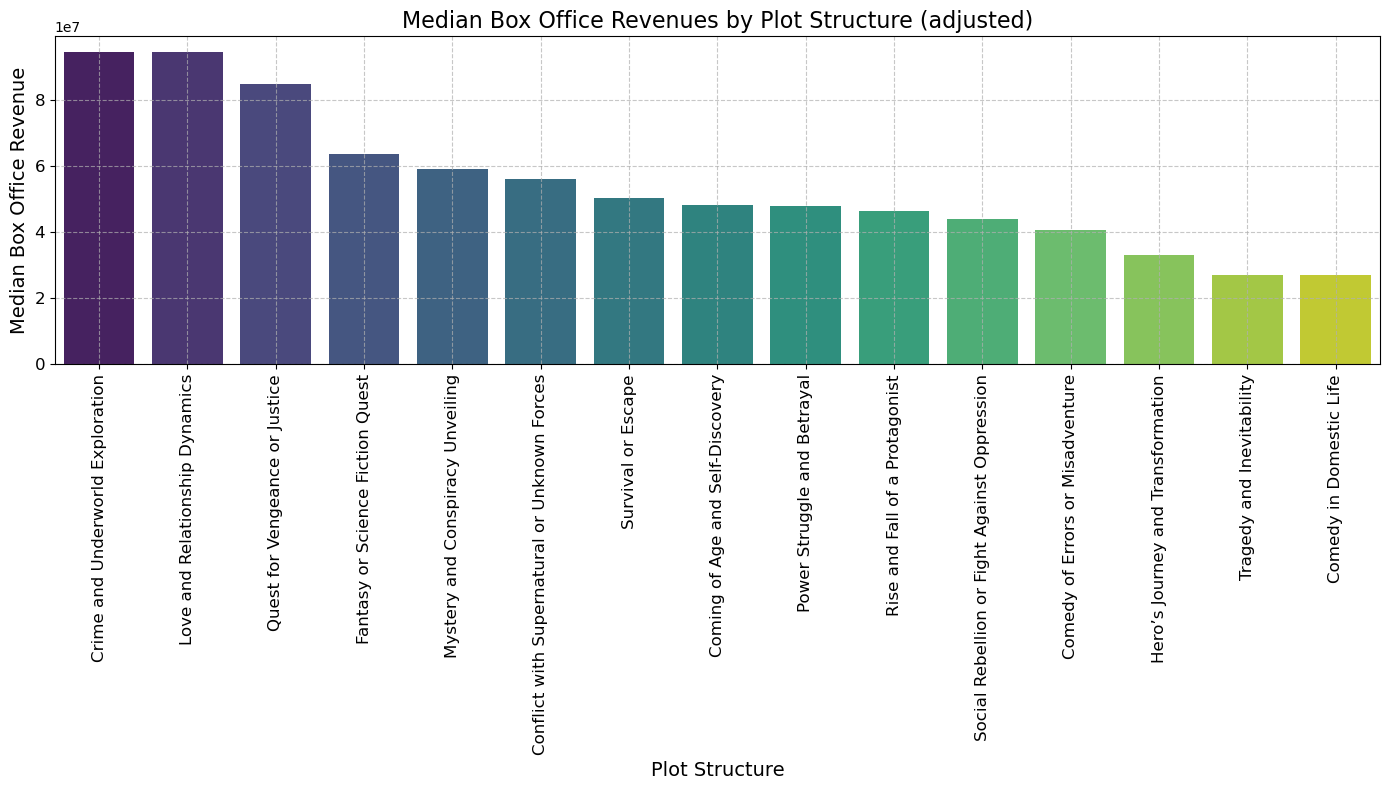

In [643]:
# Calculate the median revenues and sort them in descending order
median_revenues_plot = movies_plot_inflation.groupby('plot_structure')['adjusted_revenue'].median().reset_index()
median_revenues_plot = median_revenues_plot.sort_values(by='adjusted_revenue', ascending=False)

# Plot the median revenues using a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='plot_structure', y='adjusted_revenue', data=median_revenues_plot, palette='viridis')

plt.title('Median Box Office Revenues by Plot Structure (adjusted)', fontsize=16)
plt.xlabel('Plot Structure', fontsize=14)
plt.ylabel('Median Box Office Revenue', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Similar trend to the mean are observed here. What about profits ?

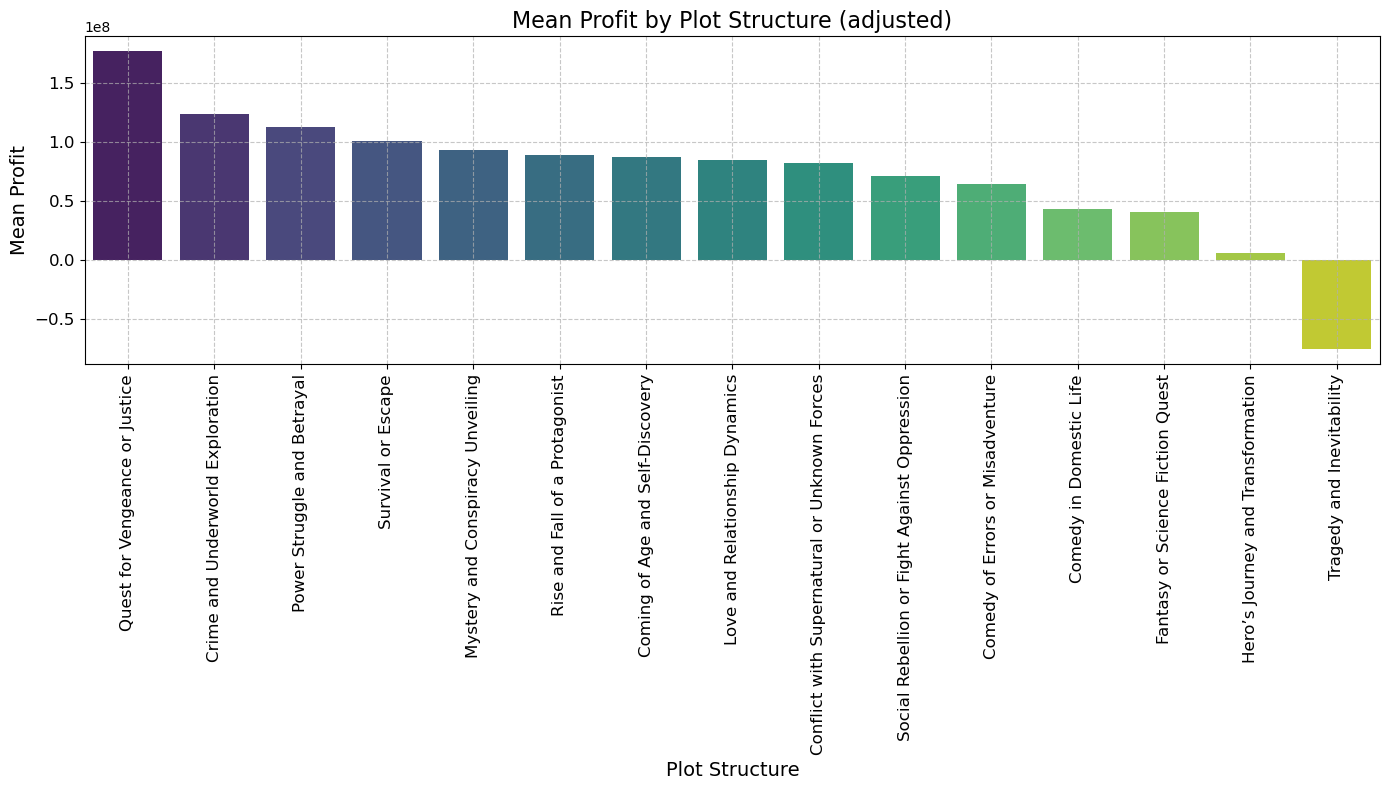

In [644]:
# Calculate the mean revenues and sort them in descending order
mean_profit_plot = movies_plot_inflation.groupby('plot_structure')['adjusted_profit'].mean().reset_index()
mean_profit_plot = mean_profit_plot.sort_values(by='adjusted_profit', ascending=False)

# Plot the mean revenues using a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='plot_structure', y='adjusted_profit', data=mean_profit_plot, palette='viridis')


plt.title('Mean Profit by Plot Structure (adjusted)', fontsize=16)
plt.xlabel('Plot Structure', fontsize=14)
plt.ylabel('Mean Profit', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Again, "Quest for Vengeance or Justice" is the plot structure giving the highest profits, but why "Tragedy and Inevitability" has so low mean profit ? Let's check the outliers.

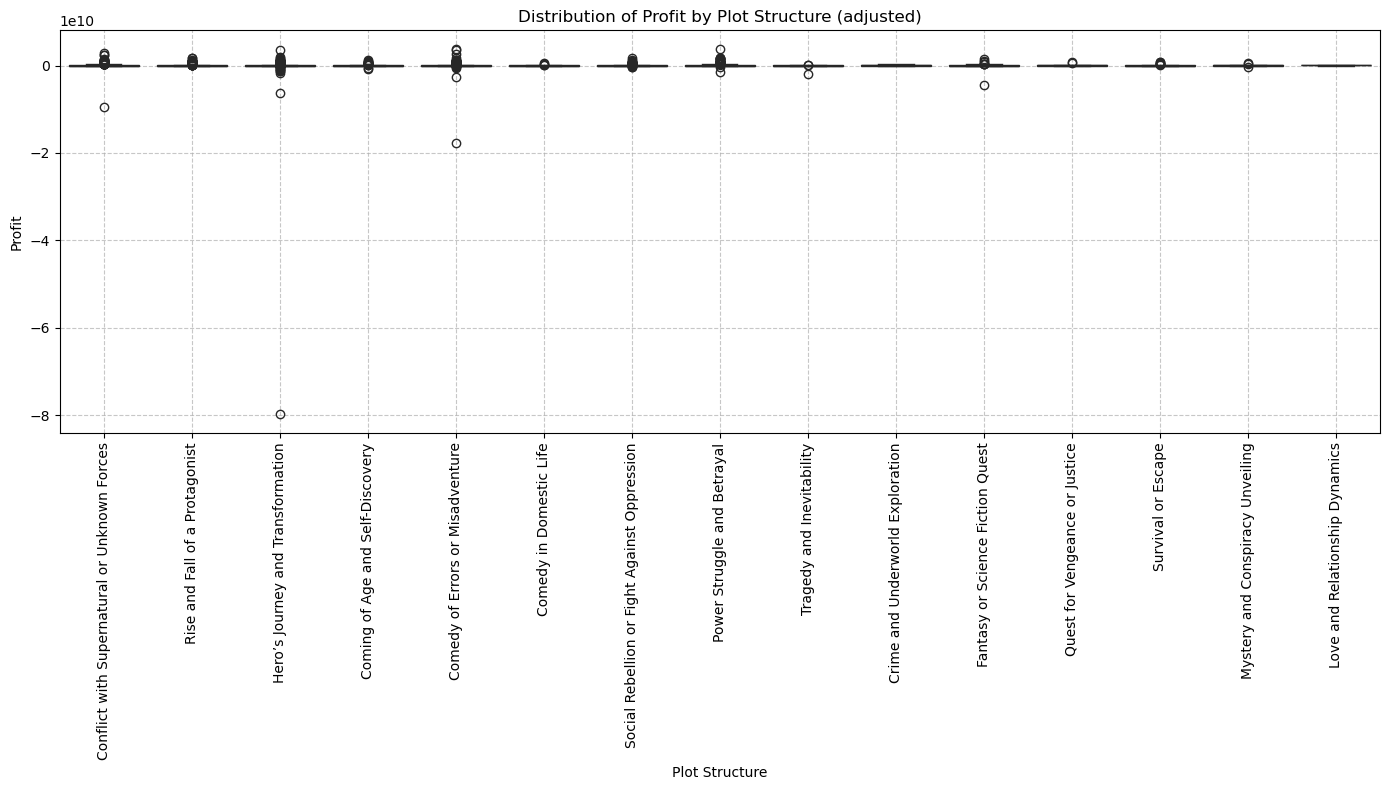

In [645]:
# Plot the distribution of revenues as a function of the genres using box plots
plt.figure(figsize=(14, 8))
sns.boxplot(x='plot_structure', y='adjusted_profit', data=movies_plot_inflation, palette='viridis')


plt.title('Distribution of Profit by Plot Structure (adjusted)')
plt.xlabel('Plot Structure')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Some outliers are indeed observed here, again, we use the median as it is much more robust to the mean for outliers :

We do notice some outliers, fortunately, as we saw for genres in previous section, we do have the median !

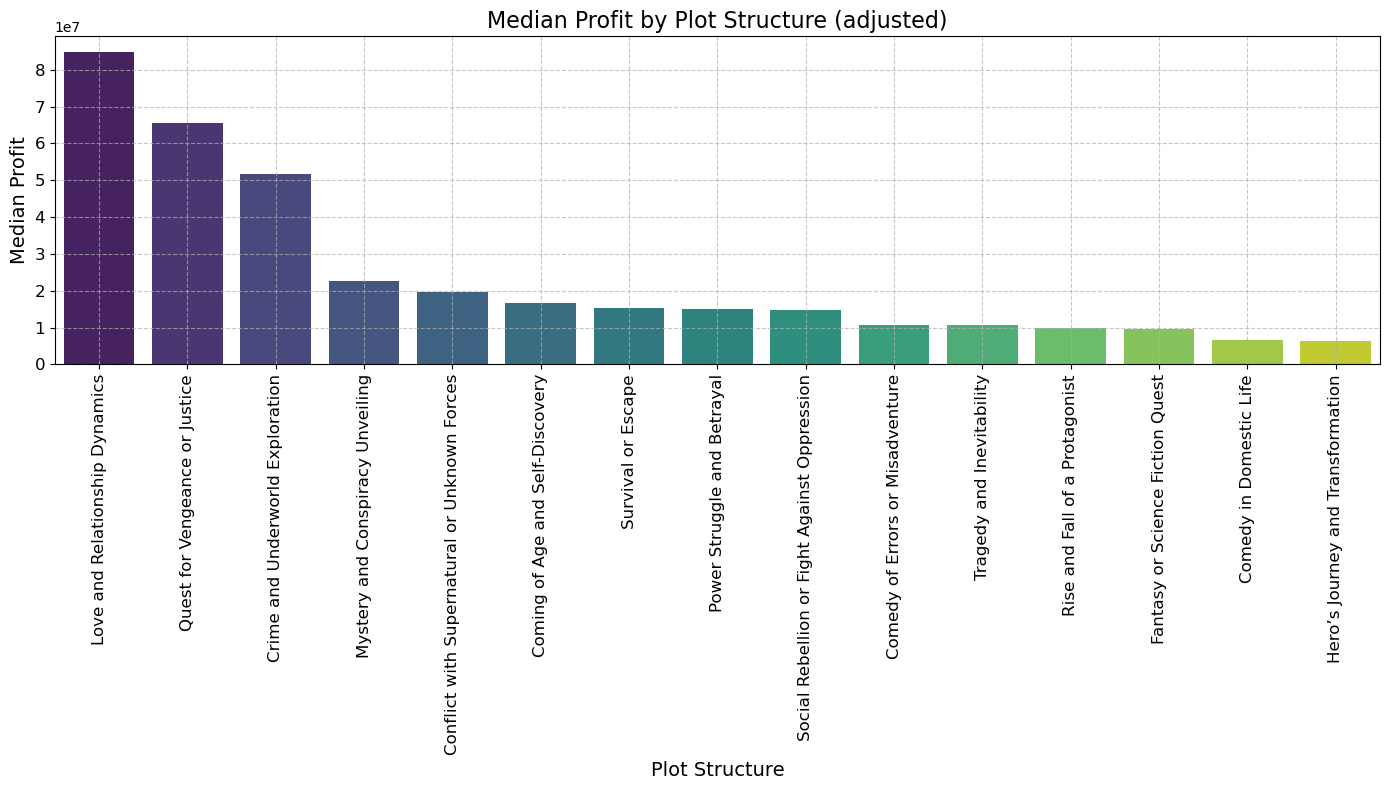

In [646]:
# Calculate the median revenues and sort them in descending order
median_profit_plot = movies_plot_inflation.groupby('plot_structure')['adjusted_profit'].median().reset_index()
median_profit_plot = median_profit_plot.sort_values(by='adjusted_profit', ascending=False)

# Plot the median revenues using a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='plot_structure', y='adjusted_profit', data=median_profit_plot, palette='viridis')

plt.title('Median Profit by Plot Structure (adjusted)', fontsize=16)
plt.xlabel('Plot Structure', fontsize=14)
plt.ylabel('Median Profit', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

It's interesting to see here that with the median, "Tragedy and Inevitability" do have positive profits now !

## Relation between genres and plot structure

Let's check for relation between genres and plot structure.

In [647]:
#df = movies_plot.copy()  
df = movies_plot_inflation.copy()
df['movie_genres'] = df['movie_genres'].apply(parse_genres)
# Explode the genres to have one genre per row
df_exploded = df.explode('movie_genres')

df_2 = df_exploded[df_exploded['movie_genres'].isin(top_genre.index)]

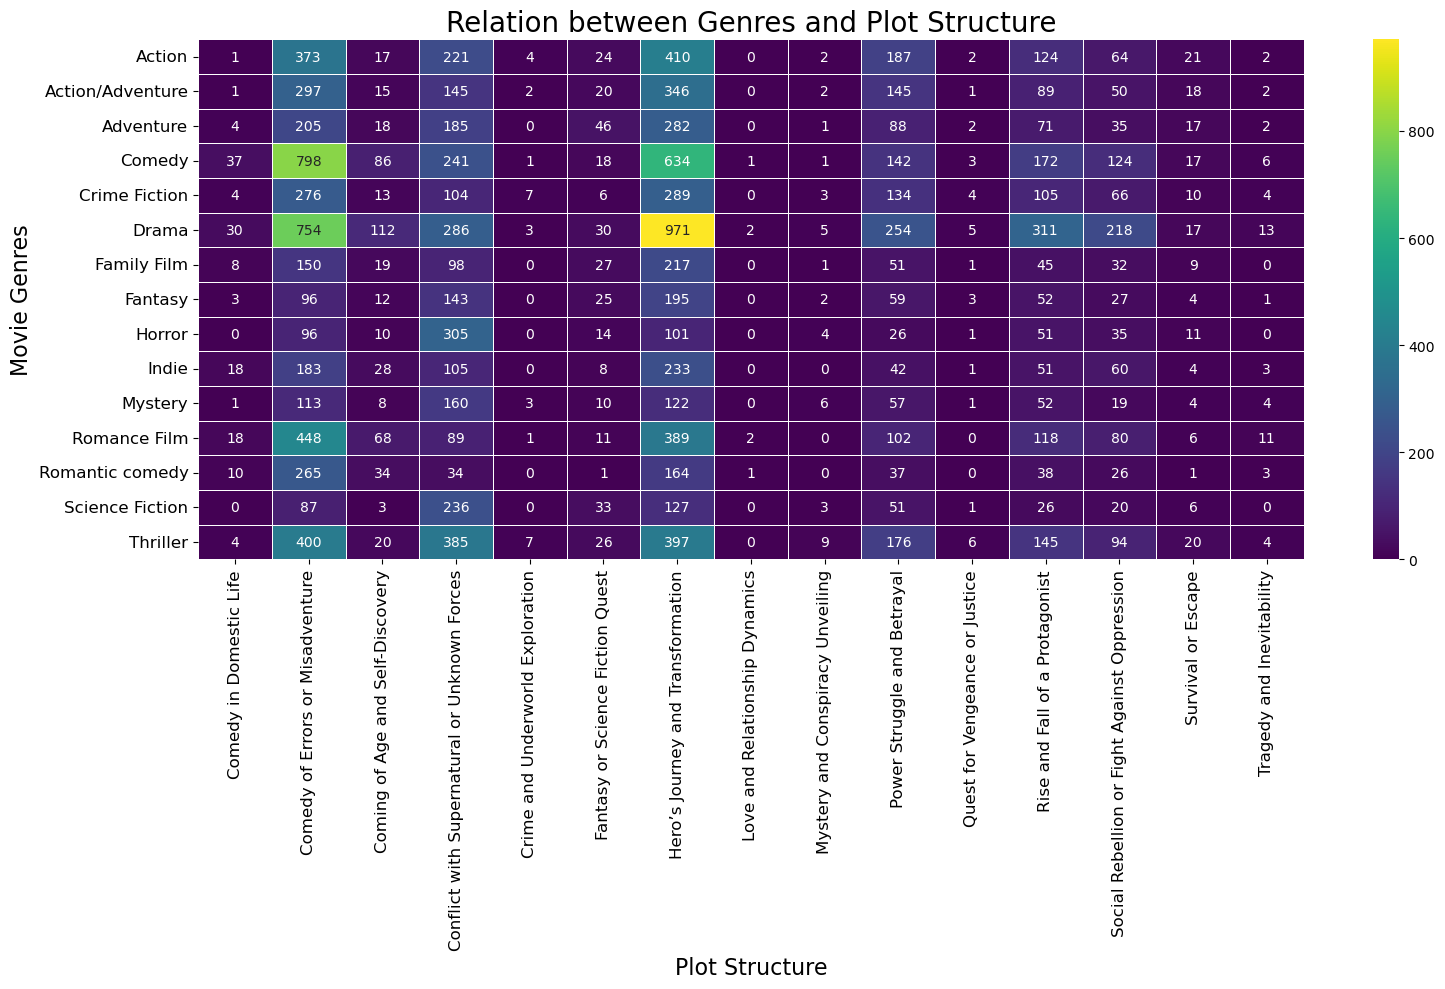

In [648]:
# Create a pivot table to count the occurrences of each genre-plot structure combination
pivot_table = df_2.pivot_table(index='movie_genres', columns='plot_structure', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='viridis', linewidths=.5)

plt.title('Relation between Genres and Plot Structure', fontsize=20)
plt.xlabel('Plot Structure', fontsize=16)
plt.ylabel('Movie Genres', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

The plot structures "Conflict with Supernatural or Unknown Forces", "Comedy of Errors or Misadventure" and "Hero's Journey and "Transformation" are the most represented ones. Drama Comedy and Action are the most represented genres, as here, 887 Drama movies are categorized in "Hero's Journey and Transformation" 

The choices of plot structures will be defined more precisely for Milestone 3, in order to take also in account revenues and profits. 

 <font size="6">7. Characters</font>


It has been decided that this analysis is not relevant for our study, as characters or actors do not give lots of useful informations directly usable for the plot structure.  

 <font size="6">8. Linear Regression to predict if a movie will be profitable</font>


To conclude, now that we have all the data, we want to know if we can predict that a movie will be profitable based on its plot structure. Two predictions are done, one using only base features and an other by adding also the plot structure that we classified, to check if it enhances the probability of having a profitable movie !   

### Adding the plot structure clustering

In [649]:
movies_plot['plot_structure_cluster'] = reg.add_plot_structure_cluster(movies_plot['plot_summary'])

## 8.1 - Fitting linear regressions

### Using only the movie genres

In [650]:
# Features = [movie_release_date, budget, rating_score, movie_genres, movie_countries]
X_train, X_test, y_train, y_test = reg.preprocess4linreg(movies_plot, y_column='profit', x_columns_to_drop=['wikipedia_movie_id', 'freebase_movie_id', 'movie_name', 'movie_box_office_revenue', 'movie_languages', 'title_year', 'plot_summary', 'opening_weekend', 'year_interval', 'summarized', 'plot_structure', 'plot_structure_20', 'producer', 'plot_structure_cluster', 'adjusted_revenue', 'adjusted_profit', 'adjusted_budget', 'profit', 'profitability_ratio'])

# Fit the model
model = sm.OLS(y_train, X_train)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     286.8
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:33:42   Log-Likelihood:                -92514.
No. Observations:                4660   AIC:                         1.857e+05
Df Residuals:                    4304   BIC:                         1.880e+05
Df Model:                         355                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

### Using only the predicted plot structures

In [651]:
# Features = [movie_release_date, budget, rating_score, producer, movie_genres, movie_countries]
X_train_plot, X_test_plot, y_train_plot, y_test_plot = reg.preprocess4linreg(movies_plot, 'profit', ['wikipedia_movie_id', 'freebase_movie_id', 'movie_name', 'movie_box_office_revenue', 'movie_languages', 'title_year', 'plot_summary', 'opening_weekend', 'year_interval', 'summarized', 'plot_structure_20', 'producer', 'movie_genres', 'plot_structure_cluster', 'adjusted_revenue', 'adjusted_profit','adjusted_budget','profit', 'profitability_ratio'])

# Fit the model
model = sm.OLS(y_train_plot, X_train_plot)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     837.3
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:33:43   Log-Likelihood:                -93193.
No. Observations:                4660   AIC:                         1.866e+05
Df Residuals:                    4564   BIC:                         1.872e+05
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

Faut préciser ici que plot structure c pas asssez puissant et donner des raisons

### Using the predicted plot structures and movie genres

In [652]:
# Features = [movie_release_date, budget, rating_score, producer, movie_genres, movie_countries]
X_train_plot, X_test_plot, y_train_plot, y_test_plot = reg.preprocess4linreg(movies_plot, 'profit', ['wikipedia_movie_id', 'freebase_movie_id', 'movie_name', 'movie_box_office_revenue', 'movie_languages', 'title_year', 'plot_summary', 'opening_weekend', 'year_interval', 'summarized', 'plot_structure_20', 'producer', 'plot_structure_cluster', 'adjusted_revenue', 'adjusted_profit', 'adjusted_budget', 'profit', 'profitability_ratio'])

# Fit the model
model = sm.OLS(y_train_plot, X_train_plot)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     277.3
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:33:45   Log-Likelihood:                -92495.
No. Observations:                4660   AIC:                         1.857e+05
Df Residuals:                    4290   BIC:                         1.881e+05
Df Model:                         369                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

Dire que quand on ajoute les genres aussi il y a une mini amélioration mais peut-être pas significative (à cause des p-values)

### Adding as a feature the plot structure clusters

In [653]:
# Features = [movie_release_date, budget, rating_score, producer, movie_genres, movie_countries]
X_train_plot, X_test_plot, y_train_plot, y_test_plot = reg.preprocess4linreg(movies_plot, 'profit', ['wikipedia_movie_id', 'freebase_movie_id', 'movie_name', 'movie_box_office_revenue', 'movie_languages', 'title_year', 'plot_summary', 'opening_weekend', 'year_interval', 'summarized', 'plot_structure_20', 'producer', 'adjusted_revenue', 'adjusted_profit', 'adjusted_budget', 'profit', 'profitability_ratio'])

# Fit the model
model = sm.OLS(y_train_plot, X_train_plot)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     272.0
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:33:47   Log-Likelihood:                -92448.
No. Observations:                4660   AIC:                         1.857e+05
Df Residuals:                    4276   BIC:                         1.881e+05
Df Model:                         383                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

Dire qu'en rajoutant le résultat du clustering, on a une plus grosse amélioration mais c'est toujours pas assez.

Il faut avoir une discussion en mode il y a du potentiel à partir des plots structures (justifier avec la p-value <0.05) mais que techniquement on a pas réussi à extraire de bons plot structures. Faire bcp de blabla.

In [654]:
y_pred = results.predict(X_test_plot)
r2 = metrics.r2_score(y_test_plot, y_pred)
r2

0.12665469338781565

Conclure aussi que le R^2 sur le predict est nul et que du coup c'est pas concluant (il reste le même sur tout les models). 

Par contre faire la transition pour dire que les budget sont très relevant.

## 8.2 Budget : an important factor to predict the profit

In [655]:
X_train_plot, X_test_plot, y_train_plot, y_test_plot = reg.preprocess4linreg(movies_plot, 'profit', ['wikipedia_movie_id', 'freebase_movie_id', 'movie_name', 'movie_box_office_revenue', 'movie_languages', 'title_year', 'plot_summary', 'opening_weekend', 'year_interval', 'summarized', 'plot_structure_20', 'producer', 'adjusted_revenue', 'adjusted_profit', 'adjusted_budget', 'profit', 'profitability_ratio'])
X_train_plot, X_test_plot = reg.enhance_features(X_train_plot, X_test_plot)
# Fit the model
model = sm.OLS(y_train_plot, X_train_plot)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     288.3
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:33:49   Log-Likelihood:                -92280.
No. Observations:                4660   AIC:                         1.853e+05
Df Residuals:                    4270   BIC:                         1.879e+05
Df Model:                         389                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [656]:
y_pred = results.predict(X_test_plot)
r2 = metrics.r2_score(y_test_plot, y_pred)
r2

0.19941750128701308

Dire que effectivement en faisant feature augmentation sur le budget, on arrive à de legerement meilleures prédictions.

Blabla sur le fait que budget high influence on profit

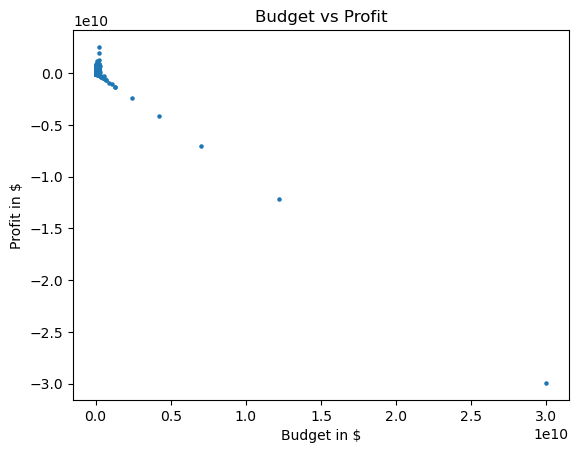

In [657]:
# plot budget vs profit
plt.scatter(movies_plot['budget'], movies_plot['profit'],s=5)
plt.xlabel('Budget in $')
plt.ylabel('Profit in $')
# make the markers smaller
plt.title('Budget vs Profit')
plt.show()


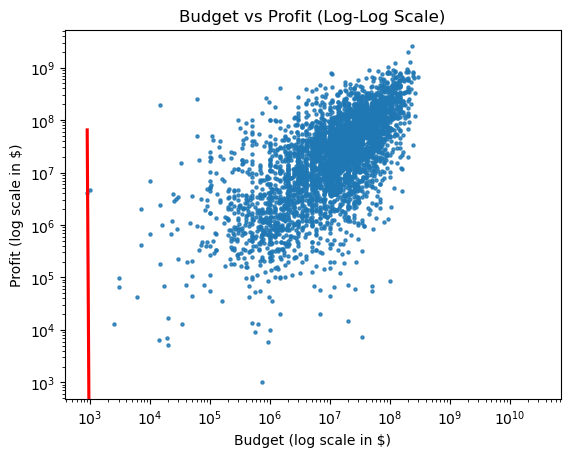

In [658]:
# plot budget vs profit in log-log scale
sns.regplot(x=movies_plot['budget'], y=movies_plot['profit'], scatter_kws={'s': 5}, line_kws={'color': 'red'})
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Budget (log scale in $)')
plt.ylabel('Profit (log scale in $)')
plt.title('Budget vs Profit (Log-Log Scale)')
plt.show()

In [659]:
# Compute Pearson and Spearman correlations
pearson_corr = movies_plot['budget'].corr(movies_plot['profit'], method='pearson')
spearman_corr = movies_plot['budget'].corr(movies_plot['profit'], method='spearman')

print(f"Pearson Correlation: {pearson_corr:.3f}")
print(f"Spearman Correlation: {spearman_corr:.3f}")

Pearson Correlation: -0.958
Spearman Correlation: 0.171


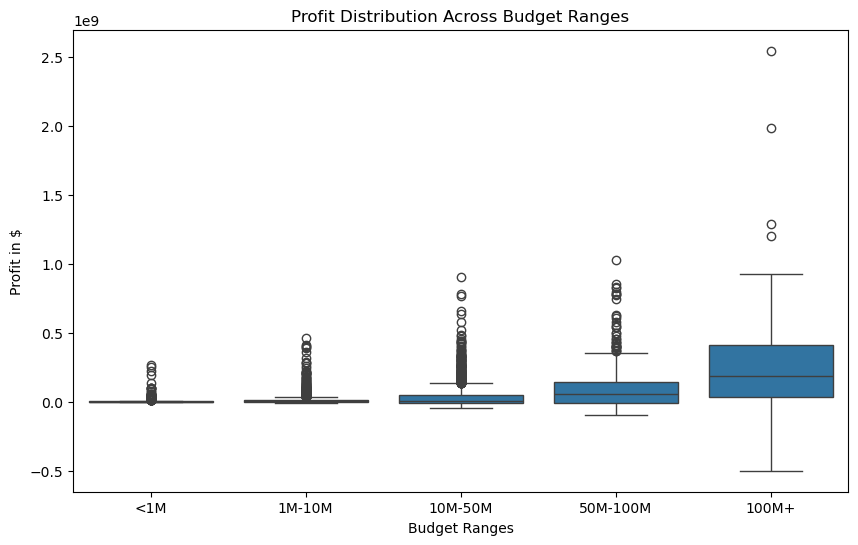

In [660]:
# Create budget bins
bins = [0, 1e6, 1e7, 5e7, 1e8, 5e8]
labels = ['<1M', '1M-10M', '10M-50M', '50M-100M', '100M+']
movies_plot['budget_bins'] = pd.cut(movies_plot['budget'], bins=bins, labels=labels)

# Box plot of profit across budget bins
plt.figure(figsize=(10, 6))
sns.boxplot(x='budget_bins', y='profit', data=movies_plot)
plt.xlabel('Budget Ranges')
plt.ylabel('Profit in $')
plt.title('Profit Distribution Across Budget Ranges')
plt.show()

In [661]:
from scipy.stats import f_oneway

# Create budget bins for ANOVA
budget_groups = [movies_plot[movies_plot['budget_bins'] == label]['profit'] for label in labels]

# Perform ANOVA
anova_result = f_oneway(*budget_groups)
print(f"ANOVA Test: F-statistic={anova_result.statistic:.2f}, p-value={anova_result.pvalue:.2e}")

if anova_result.pvalue < 0.05:
    print("Significant differences exist between budget bins.")
else:
    print("No significant differences between budget bins.")

ANOVA Test: F-statistic=333.68, p-value=7.16e-259
Significant differences exist between budget bins.


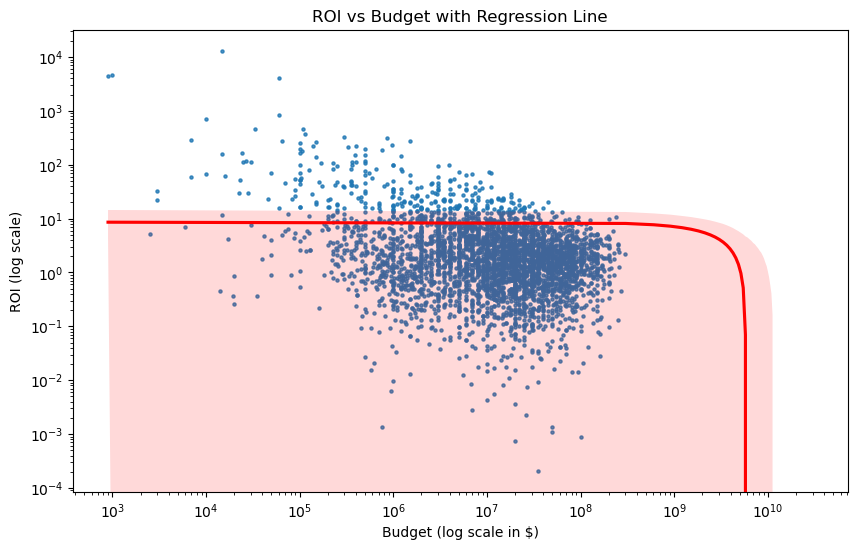

In [662]:
# plot budget vs profit in log-log scale
movies_plot['profitability_ratio'] = movies_plot['profit'] / movies_plot['budget']
plt.figure(figsize=(10, 6))
sns.regplot(x=movies_plot['budget'], y=movies_plot['profitability_ratio'], scatter_kws={'s': 5}, line_kws={'color': 'red'})
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Budget (log scale in $)')
plt.ylabel('ROI (log scale)')
plt.title('ROI vs Budget with Regression Line')
plt.show()

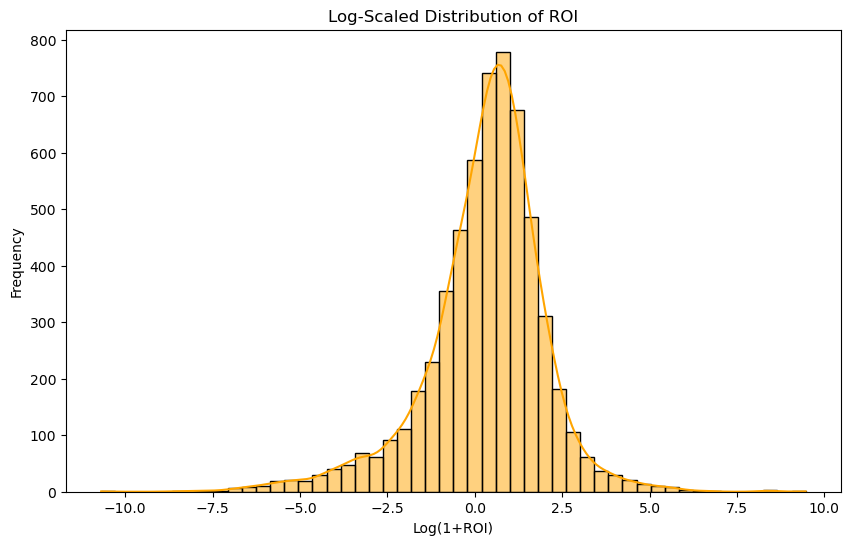

In [663]:
# Log-scale ROI histogram (to handle outliers)
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(movies_plot['profitability_ratio']), bins=50, kde=True, color='orange')
plt.xlabel('Log(1+ROI)')
plt.ylabel('Frequency')
plt.title('Log-Scaled Distribution of ROI')
plt.show()

ROI Summary by Budget Range:
  budget_bins       mean    median         std
0         <1M  74.270693  2.411538  657.706534
1      1M-10M   3.282643  0.637137   10.664334
2     10M-50M   1.459992  0.382078    3.799108
3    50M-100M   1.272383  0.800855    2.016595
4       100M+   1.665176  1.224829    1.985508


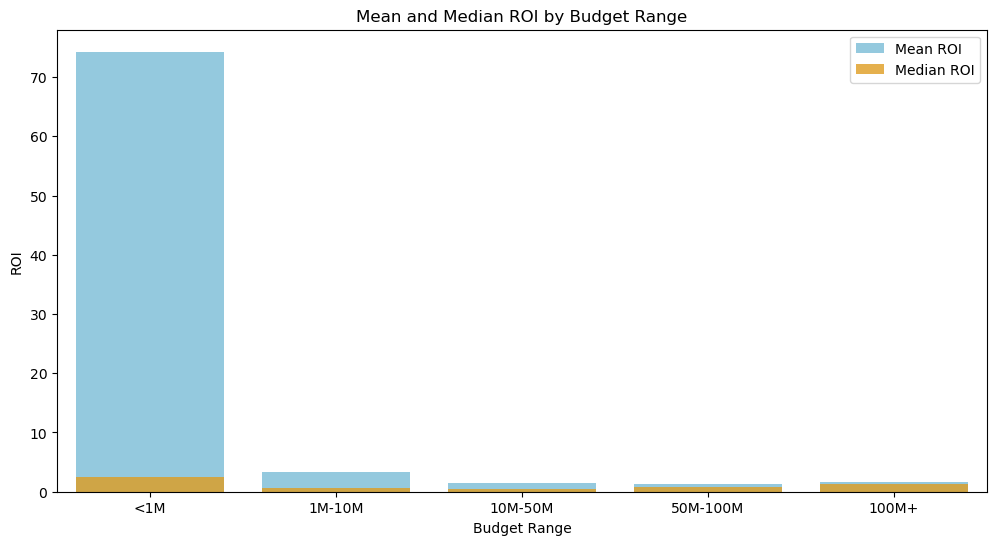

In [664]:
# Group ROI by budget bins and calculate mean and median
roi_by_budget_bin = movies_plot.groupby('budget_bins')['profitability_ratio'].agg(['mean', 'median', 'std']).reset_index()
print("ROI Summary by Budget Range:")
print(roi_by_budget_bin)

# Bar plot of ROI mean and median by budget range
plt.figure(figsize=(12, 6))
sns.barplot(data=roi_by_budget_bin, x='budget_bins', y='mean', color='skyblue', label='Mean ROI')
sns.barplot(data=roi_by_budget_bin, x='budget_bins', y='median', color='orange', label='Median ROI', alpha=0.8)
plt.xlabel('Budget Range')
plt.ylabel('ROI')
plt.title('Mean and Median ROI by Budget Range')
plt.legend()
plt.show()

In [665]:
from scipy.stats import f_oneway, kruskal

# Prepare ROI groups for ANOVA
roi_groups = [movies_plot[movies_plot['budget_bins'] == label]['profitability_ratio'] for label in labels]

# Perform ANOVA
anova_roi_result = f_oneway(*roi_groups)
print(f"ANOVA Test for ROI: F-statistic={anova_roi_result.statistic:.2f}, p-value={anova_roi_result.pvalue:.2e}")

if anova_roi_result.pvalue < 0.05:
    print("Significant differences in ROI exist between budget ranges (ANOVA).")
else:
    print("No significant differences in ROI across budget ranges (ANOVA).")

# Perform Kruskal-Wallis test (non-parametric)
kruskal_result = kruskal(*roi_groups)
print(f"Kruskal-Wallis Test for ROI: H-statistic={kruskal_result.statistic:.2f}, p-value={kruskal_result.pvalue:.2e}")

if kruskal_result.pvalue < 0.05:
    print("Significant differences in ROI exist between budget ranges (Kruskal-Wallis).")
else:
    print("No significant differences in ROI across budget ranges (Kruskal-Wallis).")

ANOVA Test for ROI: F-statistic=15.95, p-value=5.39e-13
Significant differences in ROI exist between budget ranges (ANOVA).
Kruskal-Wallis Test for ROI: H-statistic=212.55, p-value=7.52e-45
Significant differences in ROI exist between budget ranges (Kruskal-Wallis).
